(Akashi Ryo et al. 2024) Results generated from this notebook.
If you have any question in this notebook, please contact akasikadeer(at)gmail.com .

#please use anaconda to set the environment.

conda create --name py3912 python=3.9.12
conda activate py3912

conda install matplotlib=3.6.2
conda install jupyter=1.0.0 
conda install tqdm=4.64.1
conda install pandas=1.5.2


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


#saved as pickle
import pickle
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

#load from pickle
def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data

parameter set

In [ ]:
t = 0               #time　(hour)
a = 0.4             #Competition coefficient between mammals
n1 = 0              #Initial deer population density
n2 = 1000           #Native population density
K1 = 1500           #Carrying capacity of invasive mammals
K2 = 1000           #Carrying capacity of Native mammals
r1, r2 = 0.2, 0.1   #Intrinstic growth rate　invasive>native　[number/hour]
b1, b2 = 1, 1       #defecation ratio

c1 , c2 = 0.8, 0.8   #Natural weathering ratio
f2 = 1000            #Native mammal feces
x, y = 600, 600      #population density of dungbeetles x: generalist, y:specialist
e1, e2 = 0.1, 0.1    #Transition ratio feces to generalist dung beetles
e_y = 0.2           #Transition efficiency of specialist y
k = 1.0             #convergent efficiency feces to carrying capacity

h = 0.4             #Competition coefficient between dung beetles

g11 = g22 = 1       #attackratio of generalist dung beetles
g12 = g21 = 1       #attackratio of generalist dung beetles
g_y = 1             #attackratio of sepcialist dung beetles             
T11 = T12 = T21 =T22 = 1    #Handling time of generalist
T_y = 1                     #Handling time of specialist


tau = 0             #time-delay strength 


tEnd1 = 25000     #Before invasion simulation year
dt = 0.001

n1 = 10     #Invasive mammal deintisty
f1 = 1  
tEnd2 = 25000    #total simulation year

FigS2

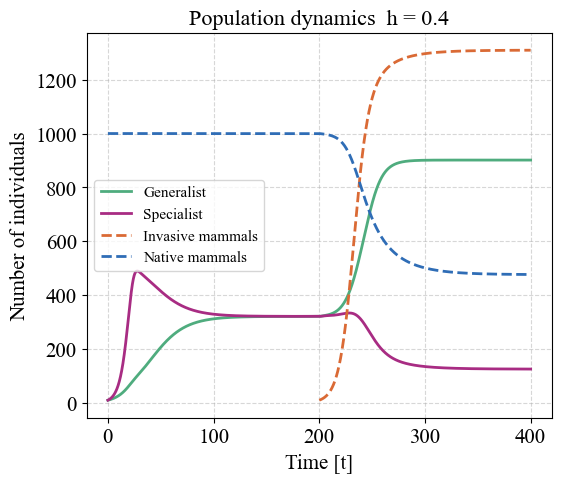

In [33]:


import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("ChangingK1.pdf")
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

import pickle
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data
    
def append_list_b():
    #definitions of append parameters to the list
    t_oi.append(t)
    n2_l.append(n2)
    f2_l.append(f2)
    x_l.append(x)
    y_l.append(y)

def append_list_a():

    append_list_b()
    tinvasion.append(t)
    n1_l.append(n1)
    f1_l.append(f1)


# result save list
h_l =[]
x_fl, y_fl= [], []
y_diff_l, y_diff_normalize_l = [], []

t = 0               
a = 0.4             
n1 = 0              
n2 = 1000           

r1, r2 = 0.2, 0.1   
b1, b2 = 1, 1   
c1 , c2 = 0.8, 0.8   
f2 = 1000            
h= 0.4

e1, e2 = 0.1, 0.1
e_y = 0.2
k = 1.0

K1 = 1500
K2 = 1000

g11 = g22 = 1
g12 = g21 = 1
g_y = 1
T11 = T12 = T21 =T22 = 1
T_y = 1

#Initial number of dung beetles
x = y = 10 #initial population size of dung beetle

t_oi, n2_l, f2_l, x_l, y_l = [t], [n2], [f2], [x],[y]
last_x, last_y, last_total = [], [], []

dt = 0.005
tEnd1 = 200             #Years before invasion
TEND1 = int(tEnd1/dt)

#Simulation before invasion
for i in range(TEND1):
    t += dt
    n1 = 0

    G2 = (g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]) 
    F2 = (g22*f2_l[i]) / (1+ g22*T22*f2_l[i])

    n2 += (r2*n2_l[i] * (1- (n2_l[i])/K2))*dt  
    f1 = 0
    f2 += (b2*n2_l[i] - c2*f2_l[i]- F2*x_l[i] - G2*y_l[i])*dt

    x += (F2*e2*x_l[i] * (1- (F2*x_l[i] + h*G2*y_l[i]) / (k*f2_l[i])))*dt
    y += (G2*e_y*y_l[i] * (1- (G2*y_l[i] + h*F2*x_l[i]) / (k*f2_l[i])))*dt

    append_list_b()

last_x.append(x)
last_y.append(y)
last_total.append(x+y)

n1 = 10             #Invasive mammal density
n1_negative = 10    #n1 when tau negative
f1 = 1
tau = 0            
TAU = int(tau/dt)

#Set simulation years
tEnd2 = tEnd1 + 200         #total simulation time
TEND2 = int(tEnd2/dt)
tinvasion, n1_l, f1_l = [t],[n1], [f1]

#Simulation after mammal invasion
for i in range(TEND1, TEND2):
    
    #when t - tau negative
    if (i < TEND1 + TAU):
        j = i - TEND1   #iteration number
        t = t + dt

        n1 = n1 + (r1*n1_l[j] * (1- (n1_negative + a*n2_l[i])/K1 ))*dt
        n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

        G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

        F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
        F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

        f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
        f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt


        x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
        y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

        append_list_a()

    
    elif (i >= TEND1 + TAU):
        t = t + dt
        j = i - TEND1

        n1 = n1 + (r1*n1_l[j] * (1- (n1_l[j - TAU] + a*n2_l[i])/K1 ))*dt
        
        n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt

        G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

        F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
        F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

        f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
        f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

        
        x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
        y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

        append_list_a()

#saved results as list
h_l.append(h)
x_fl.append(x)
y_fl.append(y)

last_x.append(x)
last_y.append(y)
last_total.append(x+y)

y_diff_l.append(last_y[0]-last_y[1])
y_diff_normalize_l.append((last_y[0]-last_y[1])/ last_y[0])


#Figure of population dynamics
plt.figure(figsize=(6,5))
plt.plot(t_oi, x_l, '#4fac7e', t_oi, y_l,'#a82c83', linewidth=2)
plt.plot(tinvasion, n1_l, '#da6a35', t_oi, n2_l, '#2f6db6',linestyle="--", linewidth=2)
plt.grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
plt.legend(["Generalist", "Specialist", "Invasive mammals", "Native mammals"], loc ="center left" ,fontsize="11")
plt.title("Population dynamics  h = {}".format(h), fontsize="16")
plt.xlabel("Time [t]")
plt.ylabel("Number of individuals")

plt.savefig("output/" + "simple_result.pdf", bbox_inches="tight")
plt.show()


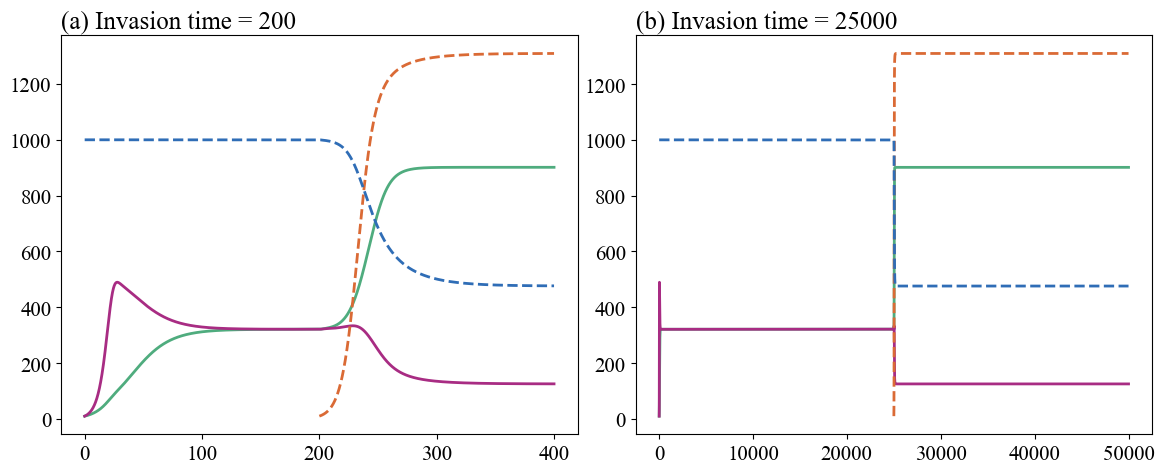

In [9]:


import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("ChangingK1.pdf")
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

import pickle
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data
    
def append_list_b():
    #definitions of append parameters to the list
    t_oi.append(t)
    n2_l.append(n2)
    f2_l.append(f2)
    x_l.append(x)
    y_l.append(y)

def append_list_a():

    append_list_b()
    tinvasion.append(t)
    n1_l.append(n1)
    f1_l.append(f1)


fig, axes = plt.subplots(1, 2, tight_layout=True, figsize=(12, 5))
ax1, ax2= axes[0], axes[1]
ax_l= [ax1, ax2]


simu_iter = 0
    


for simutime in [200, 25000]:

    # result save list
    h_l =[]
    x_fl, y_fl= [], []
    y_diff_l, y_diff_normalize_l = [], []

    t = 0               
    a = 0.4             
    n1 = 0              
    n2 = 1000           

    r1, r2 = 0.2, 0.1   
    b1, b2 = 1, 1   
    c1 , c2 = 0.8, 0.8   
    f2 = 1000            
    h= 0.4

    e1, e2 = 0.1, 0.1
    e_y = 0.2
    k = 1.0

    K1 = 1500
    K2 = 1000

    g11 = g22 = 1
    g12 = g21 = 1
    g_y = 1
    T11 = T12 = T21 =T22 = 1
    T_y = 1

    #Initial number of dung beetles
    x = y = 10 #initial population size of dung beetle

    t_oi, n2_l, f2_l, x_l, y_l = [t], [n2], [f2], [x],[y]
    last_x, last_y, last_total = [], [], []

    dt = 0.005
    tEnd1 = simutime             #Years before invasion
    TEND1 = int(tEnd1/dt)

    #Simulation before invasion
    for i in range(TEND1):
        t += dt
        n1 = 0

        G2 = (g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]) 
        F2 = (g22*f2_l[i]) / (1+ g22*T22*f2_l[i])

        n2 += (r2*n2_l[i] * (1- (n2_l[i])/K2))*dt  
        f1 = 0
        f2 += (b2*n2_l[i] - c2*f2_l[i]- F2*x_l[i] - G2*y_l[i])*dt

        x += (F2*e2*x_l[i] * (1- (F2*x_l[i] + h*G2*y_l[i]) / (k*f2_l[i])))*dt
        y += (G2*e_y*y_l[i] * (1- (G2*y_l[i] + h*F2*x_l[i]) / (k*f2_l[i])))*dt

        append_list_b()

    last_x.append(x)
    last_y.append(y)
    last_total.append(x+y)

    n1 = 10             #Invasive mammal density
    n1_negative = 10    #n1 when tau negative
    f1 = 1
    tau = 0            
    TAU = int(tau/dt)

    #Set simulation years
    tEnd2 = tEnd1 + simutime         #total simulation time
    TEND2 = int(tEnd2/dt)
    tinvasion, n1_l, f1_l = [t],[n1], [f1]

    #Simulation after mammal invasion
    for i in range(TEND1, TEND2):
        
        #when t - tau negative
        if (i < TEND1 + TAU):
            j = i - TEND1   #iteration number
            t = t + dt

            n1 = n1 + (r1*n1_l[j] * (1- (n1_negative + a*n2_l[i])/K1 ))*dt
            n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

            G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

            F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
            F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

            f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
            f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt


            x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
            y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

            append_list_a()

        
        elif (i >= TEND1 + TAU):
            t = t + dt
            j = i - TEND1

            n1 = n1 + (r1*n1_l[j] * (1- (n1_l[j - TAU] + a*n2_l[i])/K1 ))*dt
            
            n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt

            G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

            F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
            F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

            f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
            f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

            
            x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
            y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

            append_list_a()

    #saved results as list
    h_l.append(h)
    x_fl.append(x)
    y_fl.append(y)

    last_x.append(x)
    last_y.append(y)
    last_total.append(x+y)

    y_diff_l.append(last_y[0]-last_y[1])
    y_diff_normalize_l.append((last_y[0]-last_y[1])/ last_y[0])


    plt.tight_layout()

    title_l = ["(a) Invasion time = 200", "(b) Invasion time = 25000"]

    ax_l[simu_iter].set_title(title_l[simu_iter], loc="left")
    ax_l[simu_iter].plot()
    ax_l[simu_iter].plot(t_oi, x_l, '#4fac7e', t_oi, y_l,'#a82c83', linewidth=2)
    ax_l[simu_iter].plot(tinvasion, n1_l, '#da6a35', t_oi, n2_l, '#2f6db6',linestyle="--", linewidth=2)
    simu_iter += 1

plt.savefig("output/" + "simple_result.pdf", bbox_inches="tight")

plt.show()

FigS3 Preferencce C When specialist increased

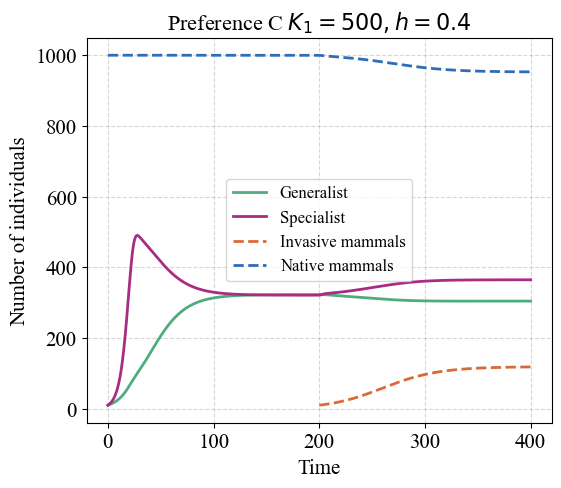

In [4]:

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("ChangingK1.pdf")
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

import pickle
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data
    
def append_list_b():
    #definitions of append parameters to the list
    t_oi.append(t)
    n2_l.append(n2)
    f2_l.append(f2)
    x_l.append(x)
    y_l.append(y)

def append_list_a():

    append_list_b()
    tinvasion.append(t)
    n1_l.append(n1)
    f1_l.append(f1)



y_diff_ll, y_diff_normalize_ll = [], []
h_ll = []

h_l =[]
x_fl, y_fl= [], []

y_diff_l, y_diff_normalize_l = [], []

t = 0               
a = 0.4             
n1 = 0              
n2 = 1000           

r1, r2 = 0.2, 0.1   
b1, b2 = 1, 1   
c1 , c2 = 0.8, 0.8   
f2 = 1000            
h= 0.4

e1, e2 = 0.1, 0.1
e_y = 0.2
k = 1.0

K1 = 500
K2 = 1000

g11 = 3
g12 = g21 = 0.9
g22 = 0.3
g_y = 1
T11 = T12 = T21 =T22 = 1
T_y = 1

#Initial number of dung beetles
x = y = 10 #initial population size of dung beetle

t_oi, n2_l, f2_l, x_l, y_l = [t], [n2], [f2], [x],[y]
last_x, last_y, last_total = [], [], []

dt = 0.005
tEnd1 = 200     #Before invasion simulation year
TEND1 = int(tEnd1/dt)

#Simulation Before invasion 
for i in range(TEND1):
    t += dt
    n1 = 0

    G2 = (g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]) 
    F2 = (g22*f2_l[i]) / (1+ g22*T22*f2_l[i])

    n2 += (r2*n2_l[i] * (1- (n2_l[i])/K2))*dt  
    f1 = 0
    f2 += (b2*n2_l[i] - c2*f2_l[i]- F2*x_l[i] - G2*y_l[i])*dt

    x += (F2*e2*x_l[i] * (1- (F2*x_l[i] + h*G2*y_l[i]) / (k*f2_l[i])))*dt
    y += (G2*e_y*y_l[i] * (1- (G2*y_l[i] + h*F2*x_l[i]) / (k*f2_l[i])))*dt

    append_list_b()

last_x.append(x)
last_y.append(y)
last_total.append(x+y)

n1 = 10             #Invasive mammal deintisty
n1_negative = 10    #Invasive mammal deintisty effect population size when t-tau is negative
f1 = 1
tau = 0            #Time-delay parameter
TAU = int(tau/dt)

#After invasion simulation year
tEnd2 = tEnd1 + 200         #total simulation year
TEND2 = int(tEnd2/dt)
tinvasion, n1_l, f1_l = [t],[n1], [f1]

#Simulation after mammal invasion
for i in range(TEND1, TEND2):
    
    #when t - tau negative
    if (i < TEND1 + TAU):
        j = i - TEND1   #iteration number
        t = t + dt

        n1 = n1 + (r1*n1_l[j] * (1- (n1_negative + a*n2_l[i])/K1 ))*dt
        n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

        G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

        F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
        F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

        f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
        f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt


        x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
        y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

        append_list_a()

    
    elif (i >= TEND1 + TAU):
        t = t + dt
        j = i - TEND1
        

        n1 = n1 + (r1*n1_l[j] * (1- (n1_l[j - TAU] + a*n2_l[i])/K1 ))*dt
        
        n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt

        G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

        F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
        F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

        f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
        f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

        
        x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
        y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

        append_list_a()

h_l.append(h)
x_fl.append(x)
y_fl.append(y)

last_x.append(x)
last_y.append(y)
last_total.append(x+y)

y_diff_l.append(last_y[0]-last_y[1])
y_diff_normalize_l.append((last_y[0]-last_y[1])/ last_y[0])


#Figure of population dynamics
plt.figure(figsize=(6,5))
plt.plot(t_oi, x_l, '#4fac7e', t_oi, y_l,'#a82c83', linewidth=2)
plt.plot(tinvasion, n1_l, '#da6a35', t_oi, n2_l, '#2f6db6',linestyle="--", linewidth=2)
plt.grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
plt.legend(["Generalist", "Specialist", "Invasive mammals", "Native mammals"], fontsize="12")
plt.title(f"Preference C $K_1 = 500, h={h}$", fontsize="16")
plt.xlabel("Time")
plt.ylabel("Number of individuals")

plt.savefig("output/" + "situ3_increase.pdf", bbox_inches="tight")
plt.show()


Fig S7 calculation

0
1
2
3


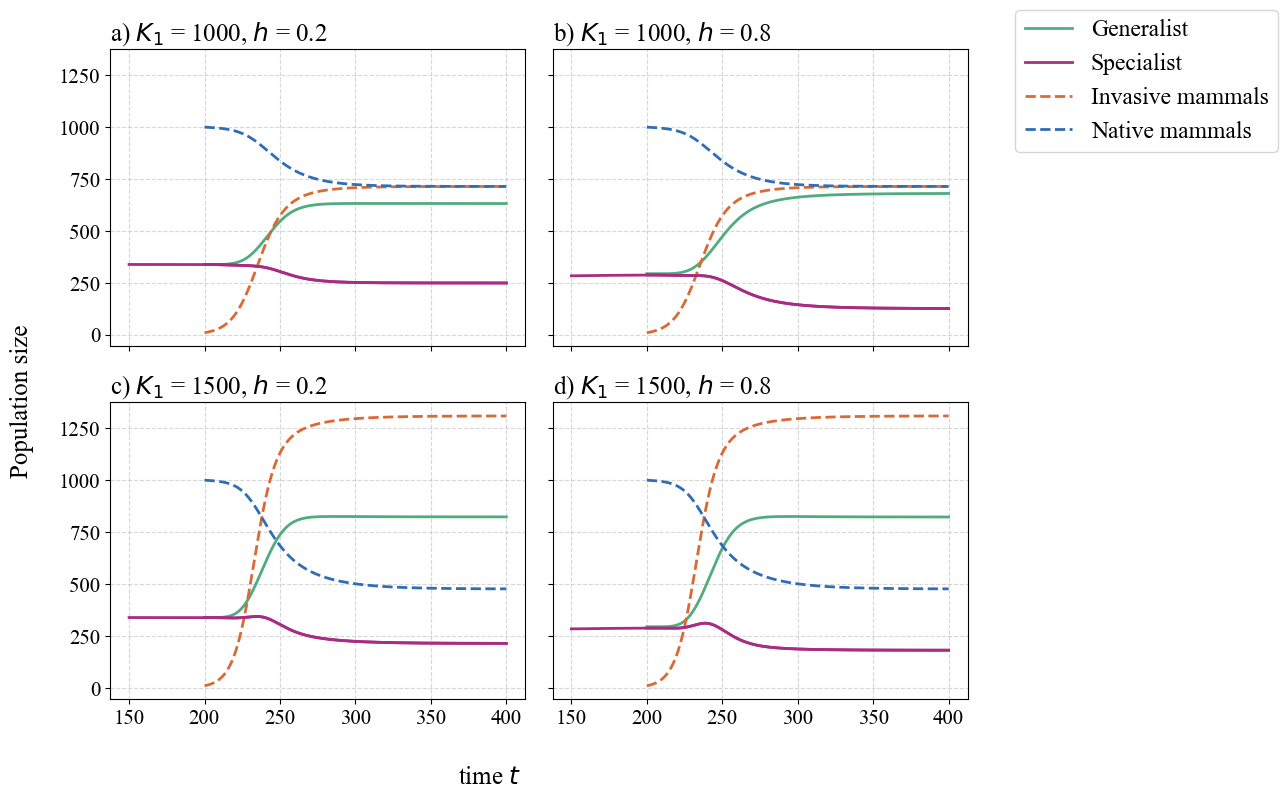

In [13]:


import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("ChangingK1.pdf")
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

import pickle
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data
    
def append_list_b():
    #definitions of append parameters to the list
    t_oi.append(t)
    n2_l.append(n2)
    f2_l.append(f2)
    x_l.append(x)
    y_l.append(y)

def append_list_a():

    append_list_b()
    tinvasion.append(t)
    n1_l.append(n1)
    f1_l.append(f1)


fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(10, 8), sharex=True, sharey="all")
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]
ax_l= [ax1, ax2, ax3, ax4 ]
fig_num = 0
title_l =["a)", "b)", "c)", "d)"]


K1_l  =[1000, 1500]
for K1 in K1_l:

    h_l  =[0.2, 0.8]
    for h in h_l:
        
        y_diff_ll, y_diff_normalize_ll = [], []
        h_ll = []

        h_l =[]
        x_fl, y_fl= [], []

        y_diff_l, y_diff_normalize_l = [], []

        t = 0               #Initial time
        a = 0.4             #competition coefficient between mammals
        n1 = 0              #Population size of invasive mammals before invasion
        n2 = 1000           #Population size of native mammals

        r1, r2 = 0.2, 0.1   #Intrinstic growth rate of mammals　sika>mammal　(number/hour)
        b1, b2 = 1, 1   #Defecation efficiency
        c1 , c2 = 0.8, 0.8   #Natural weathering ratio
        f2 = 1000            #Native mammal feces
        # h= 0.4

        e1, e2 = 0.1, 0.1
        e_y = 0.2
        k = 1.0

        # K1 = 1500
        K2 = 1000

        g11 = g22 = 10
        g12 = g21 = 0.1
        g_y = 1
        T11 = T12 = T21 =T22 = 1
        T_y = 1

        #Initial number of dung beetles
        x = y = 600      #initial population size of dung beetle

        t_oi, n2_l, f2_l, x_l, y_l = [t], [n2], [f2], [x],[y]
        last_x, last_y, last_total = [], [], []

        dt = 0.005
        tEnd1 = 200     #Before invasion simulation year
        TEND1 = int(tEnd1/dt)

        #Simulation Before invasion 
        for i in range(TEND1):
            t += dt
            n1 = 0

            G2 = (g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]) 
            F2 = (g22*f2_l[i]) / (1+ g22*T22*f2_l[i])

            n2 += (r2*n2_l[i] * (1- (n2_l[i])/K2))*dt  
            f1 = 0
            f2 += (b2*n2_l[i] - c2*f2_l[i]- F2*x_l[i] - G2*y_l[i])*dt

            x += (F2*e2*x_l[i] * (1- (F2*x_l[i] + h*G2*y_l[i]) / (k*f2_l[i])))*dt
            y += (G2*e_y*y_l[i] * (1- (G2*y_l[i] + h*F2*x_l[i]) / (k*f2_l[i])))*dt

            append_list_b()

        last_x.append(x)
        last_y.append(y)
        last_total.append(x+y)

        n1 = 10             #Invasive mammal deintisty
        n1_negative = 10    #Invasive mammal deintisty effect population size when t-tau is negative
        f1 = 1
        tau = 0            #Time-delay parameter
        TAU = int(tau/dt)

        #After invasion simulation year
        tEnd2 = 2*tEnd1         #total simulation year
        TEND2 = int(tEnd2/dt)
        tinvasion, n1_l, f1_l = [t],[n1], [f1]

        #Simulation after mammal invasion
        for i in range(TEND1, TEND2):
            
            #when t - tau negative
            if (i < TEND1 + TAU):
                j = i - TEND1   #iteration number
                t = t + dt

                n1 = n1 + (r1*n1_l[j] * (1- (n1_negative + a*n2_l[i])/K1 ))*dt
                n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

                F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt


                x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

                append_list_a()

            
            elif (i >= TEND1 + TAU):
                t = t + dt
                j = i - TEND1
                
                
                n1 = n1 + (r1*n1_l[j] * (1- (n1_l[j - TAU] + a*n2_l[i])/K1 ))*dt
                
                n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt

                G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

                F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

                
                x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

                append_list_a()

        h_l.append(h)
        x_fl.append(x)
        y_fl.append(y)

        last_x.append(x)
        last_y.append(y)
        last_total.append(x+y)

        y_diff_l.append(last_y[0]-last_y[1])
        y_diff_normalize_l.append((last_y[0]-last_y[1])/ last_y[0])


        ax_l[fig_num].grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
        ax_l[fig_num].set_title(title_l[fig_num]+f" $K_{1}$ = {K1}, $h$ = {h}", loc="left")
        ax_l[fig_num].plot(t_oi[TEND1:], x_l[TEND1:], '#4fac7e', t_oi[TEND1:], y_l[TEND1:],'#a82c83', linewidth=2)
        ax_l[fig_num].plot(tinvasion, n1_l, '#da6a35', t_oi[TEND1:], n2_l[TEND1:], '#2f6db6',linestyle="--", linewidth=2)
        ax_l[fig_num].plot(t_oi[int(150/dt):], y_l[int(150/dt):],'#a82c83', linewidth=2)

        print(fig_num)
        fig_num += 1

fig.supxlabel("time $t$", fontsize="18")
fig.supylabel("Population size ", fontsize="18")
fig.legend(["Generalist", "Specialist", "Invasive mammals", "Native mammals"], bbox_to_anchor=(1.3, 1.0), fontsize="17")

plt.tight_layout()
plt.show()


S1 Dung beetles population size varied with h before invasion 

0it [00:00, ?it/s]

Simulation years 25000


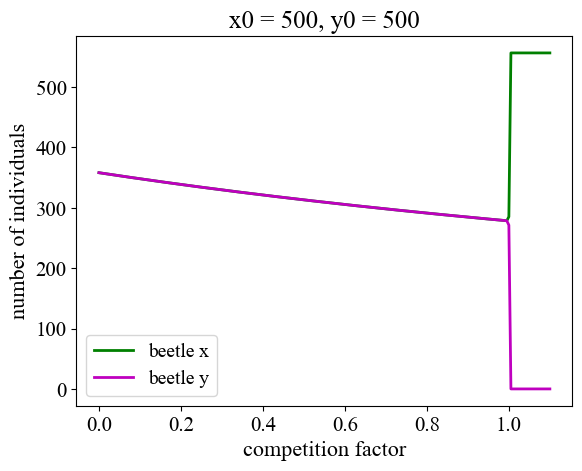

In [2]:
#Considering Before invasion 

import os
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

import pickle
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data

def append_list_b():
    #definitions of append parameters to the list
    t_oi.append(t)
    n2_l.append(n2)
    f2_l.append(f2)
    x_l.append(x)
    y_l.append(y)


h_list =[]
x_flist =[]
y_flist=[]
xratio_list=[]
yratio_list=[]

h=0.0
from tqdm.notebook import tqdm
with tqdm() as pbar:
    while(h<1.1):

        t = 0               #Initial time
        n1 = 0              #Population size of invasive mammals before invasion
        n2 = 1000           #Population size of native mammals

        r1, r2 = 0.2, 0.1   #Intrinstic growth rate of mammals　Invasive>Native
        b1, b2 = 1, 1       #Defecation efficiency
        c1 , c2 = 0.8, 0.8   #Natural weathering ratio
        f2 = 1000            #Native mammal feces
        e1, e2 = 0.1, 0.1
        e_y = 0.2
        k = 1.0

        K2 = 1000
        g11 = g22 = 1
        g12 = g21 = 1
        g_y = 1
        T11 = T12 = T21 =T22 = 1
        T_y = 1

        x = y = 300 #initial population size of dung beetle

        t_oi, n2_l, f2_l, x_l, y_l = [t], [n2], [f2], [x],[y]

        dt = 0.001
        simu_time  = 25000          #simulation time each before and after the invasion.
        cut_order = 6
        simu_cut = 1.0 * 10**(-1*cut_order)

        TEND1 = int(simu_time/dt)   #simulation time divided by dt


        for i in range(TEND1):
            t += dt
            n1 = 0

            G2 =(g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]) 
            F2 =(g22*f2_l[i]) / (1+ g22*T22*f2_l[i])
        
            n2 += (r2*n2_l[i] * (1- (n2_l[i])/K2))*dt  
            f1 = 0
            f2 += (b2*n2_l[i] - c2*f2_l[i]- F2*x_l[i] - G2*y_l[i])*dt

            x += (F2*e2*x_l[i] * (1- (F2*x_l[i] + h*G2*y_l[i]) / (k*f2_l[i])))*dt
            y += (G2*e_y*y_l[i] * (1- (G2*y_l[i] + h*F2*x_l[i]) / (k*f2_l[i])))*dt

            append_list_b()

            if  i*dt > 100 and abs(y_l[int(-1/dt)-1]-y_l[-1]) < (simu_cut):
                break

        h_list.append(h)
        x_flist.append(x)
        y_flist.append(y)
        xratio_list.append(x/(x+y))
        yratio_list.append(y/(x+y))

        pbar.set_description(f"[h={h}]")
        h += 0.005
        pbar.update(1)

print("Simulation years",simu_time)

out_path = f"output/Equibxy/"
os.makedirs(out_path, exist_ok =True)

pickle_l = [h_list, x_flist, y_flist]
pickle_name_l = ["h_list", "x_flist", "y_flist"]
out_name_l = [out_path + "{}.pickle".format(name) for name in pickle_name_l]
# Save results as .pickle
for i, j in zip(pickle_l, out_name_l):
    pickle_dump(i, j)


plt.figure()
plt.title("x0 = 500, y0 = 500", fontsize="18")
plt.plot(h_list, x_flist, 'g', h_list, y_flist, 'm', linewidth=2)
plt.legend(["beetle x", "beetle y"], loc="lower left", fontsize="14")
plt.xlabel("competition factor", fontsize="16")
plt.ylabel("number of individuals", fontsize="16")
# show figures
plt.show()

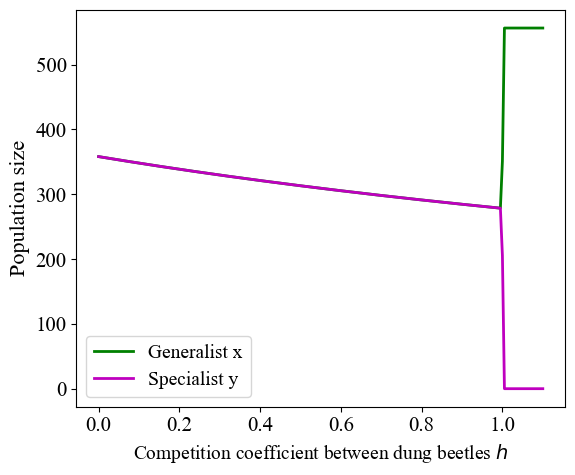

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

import pickle

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data
    
out_path = f"output/Equibxy/"
h_list = pickle_load(out_path + "h_list.pickle")
x_flist = pickle_load(out_path + "x_flist.pickle")
y_flist = pickle_load(out_path + "y_flist.pickle")



plt.figure(figsize=(6,5))

plt.plot(h_list, x_flist, 'g', h_list, y_flist, 'm', linewidth=2)
plt.legend(["Generalist x", "Specialist y"], loc="lower left", fontsize="14")

plt.xlabel("Competition coefficient between dung beetles $h$", fontsize="14")
plt.ylabel("Population size", fontsize="16")
# show figures
plt.tight_layout()
plt.savefig("output/Equibxy/xy_before_invasion.pdf", bbox_inches="tight")
plt.show()


Fig2. Illustrate Functional resnponses for dung pregerence


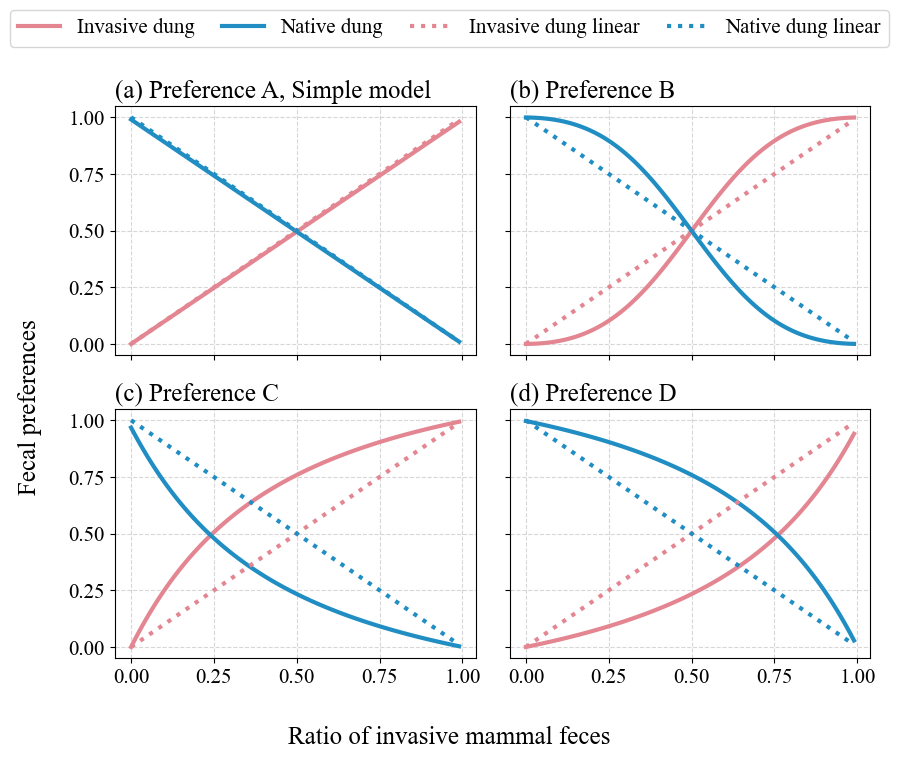

In [13]:

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15


g11_l = [1, 10, 3, 0.3]
g22_l = [1, 10, 0.3, 3]
g12_l = [1, 0.1, 0.9, 0.9]
g21_l = [1, 0.1, 0.9, 0.9]

g_l = [g11_l, g22_l, g12_l, g21_l]
Pf1_ll, Pf2_ll = [], []
F3f1_ll, F3f2_ll = [], []


for g11, g22, g12, g21  in zip (g11_l, g22_l, g12_l, g21_l):

    f1 = 0
    f2 = 100

    f1_l, f2_l, f1_ratio = [f1 /100], [f2], [f1/f2]
    f1_max = f2

    Pf1_l = [0]
    Pf2_l = [1]

    T11 = T22 = 1
    T12 = T21 = 1
    F3f1_l = [0]
    F3f2_l = [(g22*f2) / (1+ g22*T22*f2)]

    while f1 < f1_max:


        Pf1 = f1 / (f1 + f2)
        Pf2 = f2 / (f1 + f2)


        F3f1 = (g12*f1*(g11*f1 + g21*f2)) / (g12*f1 + g11*g12*T11*(f1**2) + g12*g21*f1*f2*(T12+T21)+g22*g21*T22*(f2**2)+g21*f2)
        F3f2 = (g21*f2*(g22*f2 + g12*f1)) /  (g12*f1 + g11*g12*T11*(f1**2) + g12*g21*f1*f2*(T12+T21)+g22*g21*T22*(f2**2)+g21*f2)

        f1_l.append(f1 / 100)
        f2_l.append(f2)
        F3f1_l.append(F3f1)
        F3f2_l.append(F3f2)
        
        Pf1_l.append(Pf1)
        Pf2_l.append(Pf2)
        f1 += 1
        f2 += -1

    Pf1_ll.append(Pf1_l)
    Pf2_ll.append(Pf2_l)
    F3f1_ll.append(F3f1_l)
    F3f2_ll.append(F3f2_l)


fig, axes = plt.subplots(2, 2, tight_layout=True,figsize=(9, 7), sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1] 
ax_l= [ax1, ax2, ax3, ax4]


fig.supylabel("Fecal preferences")
fig.supxlabel("Ratio of invasive mammal feces")

title_l = ["(a) Preference A, Simple model", "(b) Preference B", "(c) Preference C", "(d) Preference D" ]
for j in range(4):
    ax_l[j].grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
    ax_l[j].set_title(title_l[j], loc="left")
    ax_l[j].plot(f1_l, F3f1_ll[j],"#E38692", f1_l, F3f2_ll[j],"#208DC3", linewidth=3)
    ax_l[j].plot(f1_l,Pf1_l,"#E38692", f1_l,Pf2_l, "#208DC3", ls = ":", linewidth=3)

fig.legend(["Invasive dung", "Native dung", "Invasive dung linear", "Native dung linear"], ncol=4, bbox_to_anchor=(0.,1.0, 1., 1.0),loc="lower center",mode="expand", fontsize="15")
plt.tight_layout()
plt.savefig("output/functionaltest.pdf", bbox_inches="tight", pad_inches=0.05)

plt.show()

S6 simulation (y*-y)/y* each preference

0it [00:00, ?it/s]

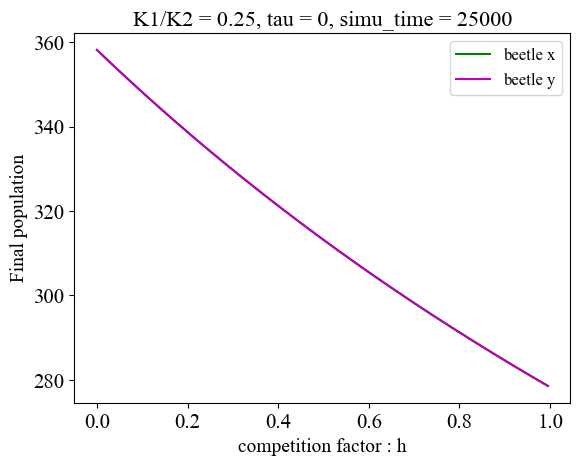

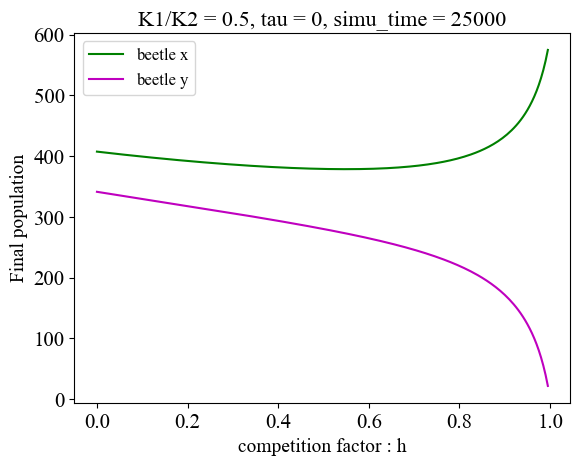

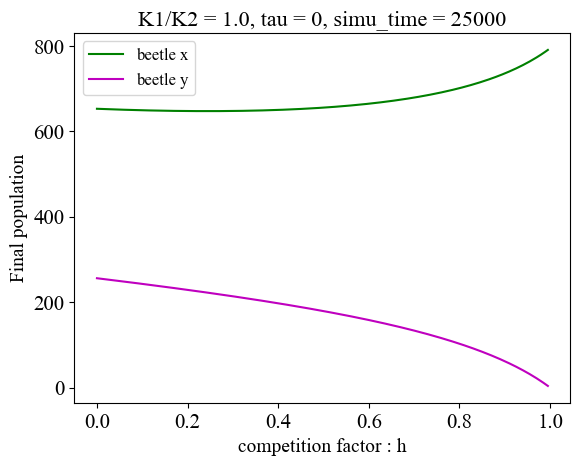

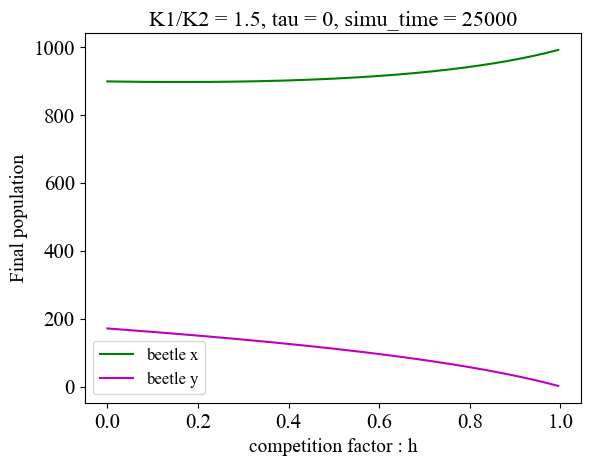

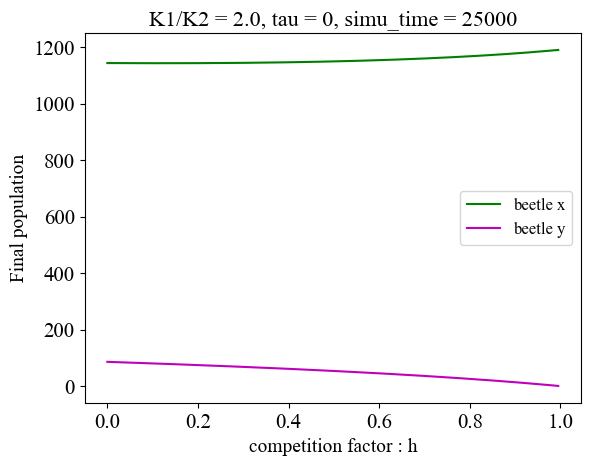

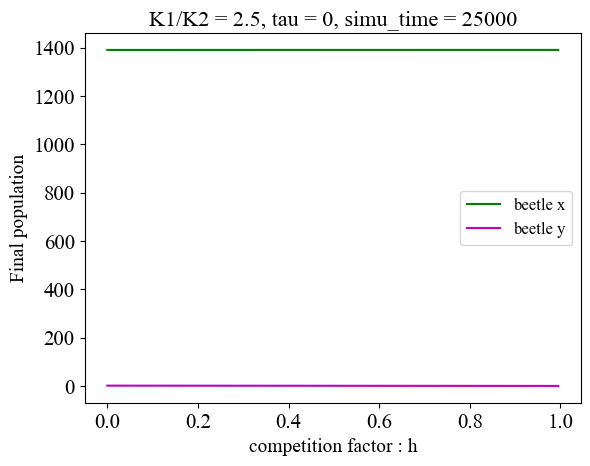

Invasion start time= 23196408000.0 Simulation finished time 48196.40795323192
Competition coefficient between mammals 0.4 competition coefficient between dung beetles 1.0000000000000007
time delay tau = 0
Before invasion x =  279 After invasion x= 1390 Before invasion y= 279 After invasion y= 0 Before invasion x+y 557 After invasion x+y 1390
functional response, Handling time is g11=1, g12=1, g21=1, g22=1


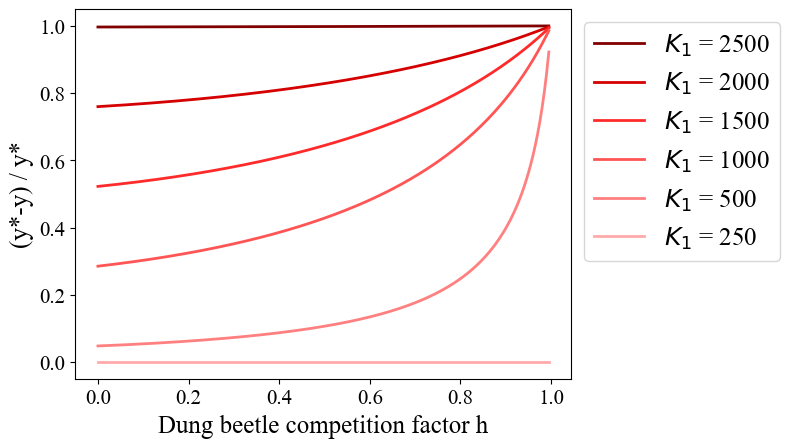

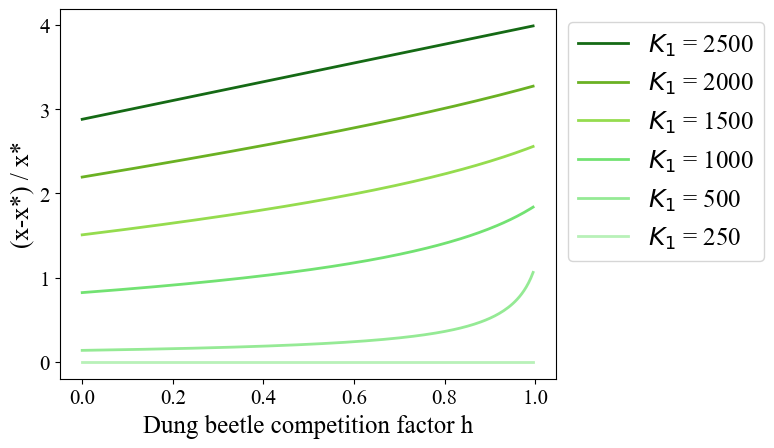

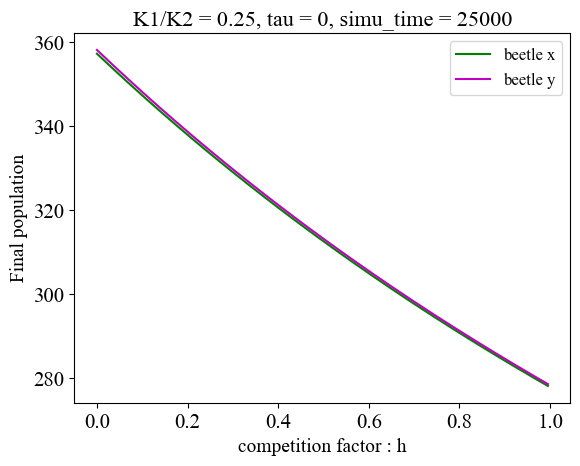

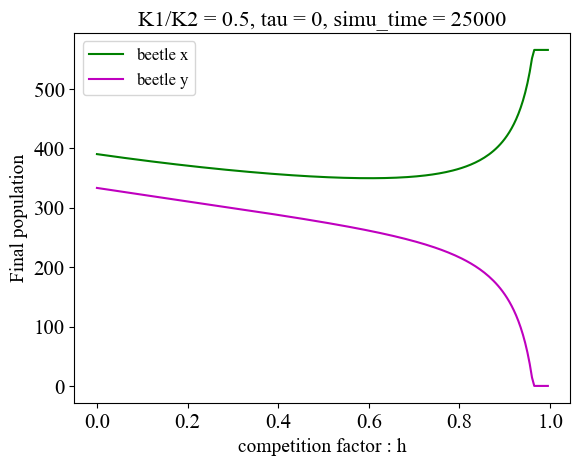

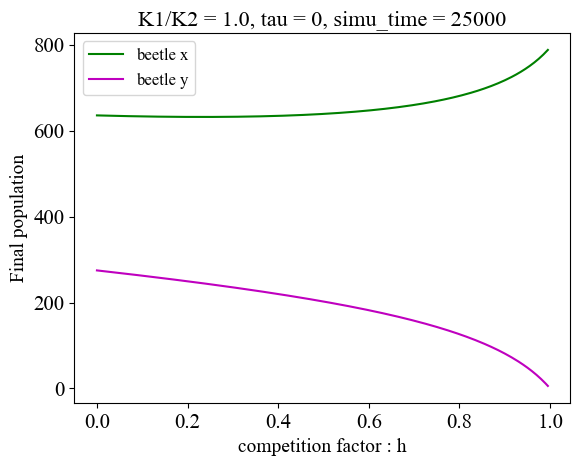

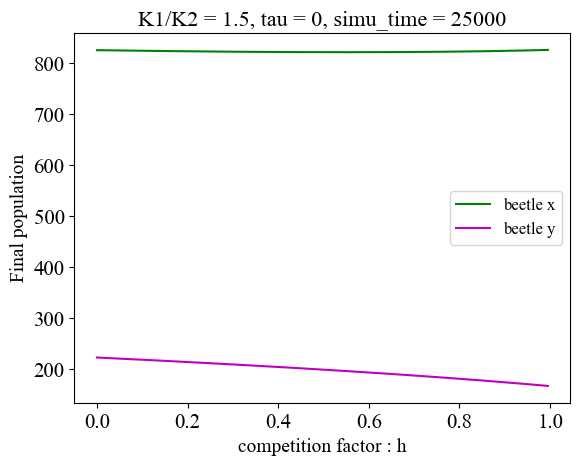

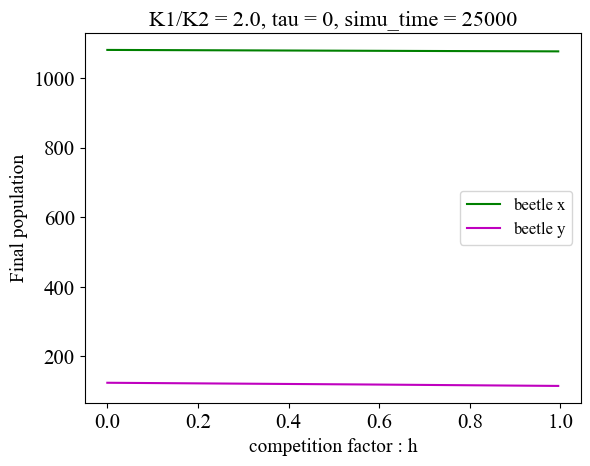

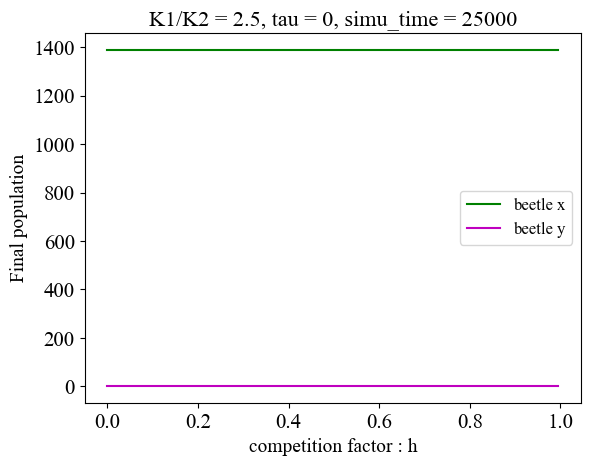

Invasion start time= 23291804000.0 Simulation finished time 48291.80395290431
Competition coefficient between mammals 0.4 competition coefficient between dung beetles 1.0000000000000007
time delay tau = 0
Before invasion x =  278 After invasion x= 1389 Before invasion y= 279 After invasion y= 1 Before invasion x+y 557 After invasion x+y 1390
functional response, Handling time is g11=10, g12=0.1, g21=0.1, g22=10


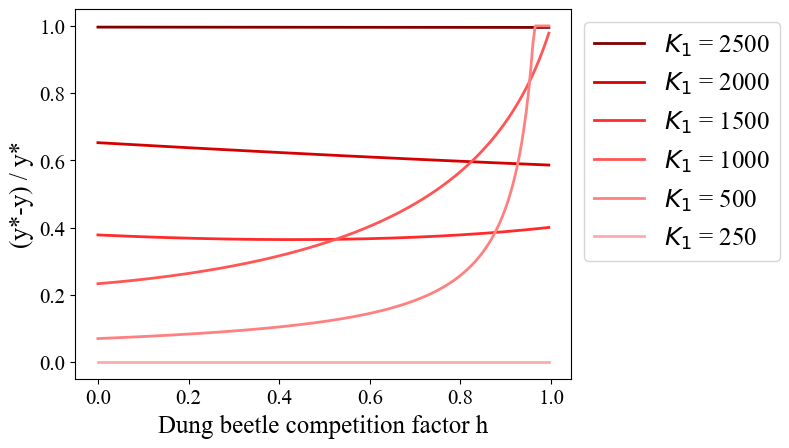

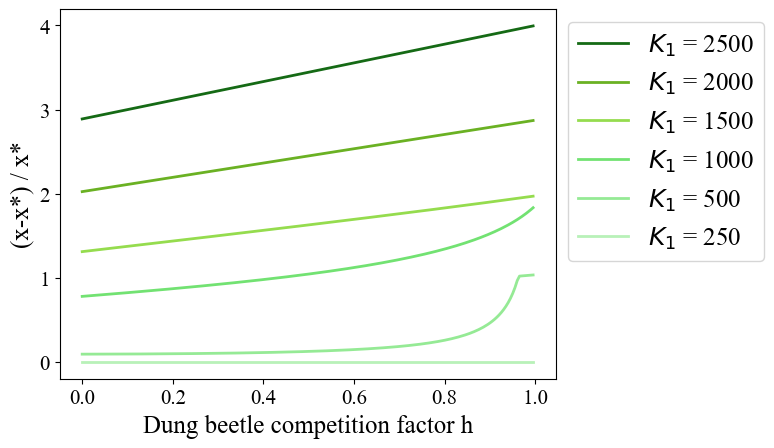

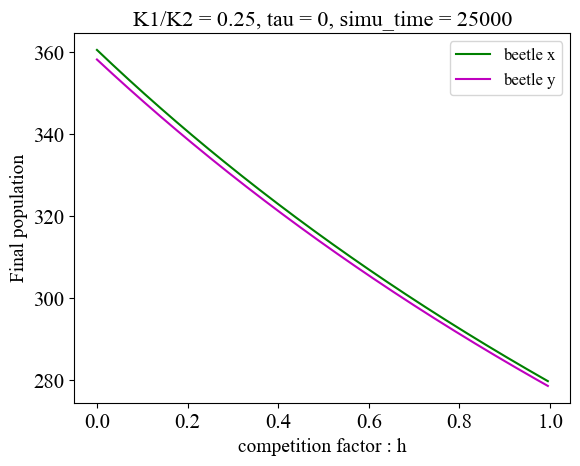

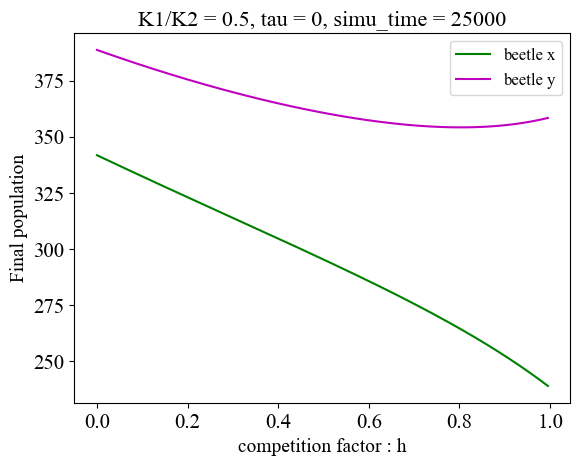

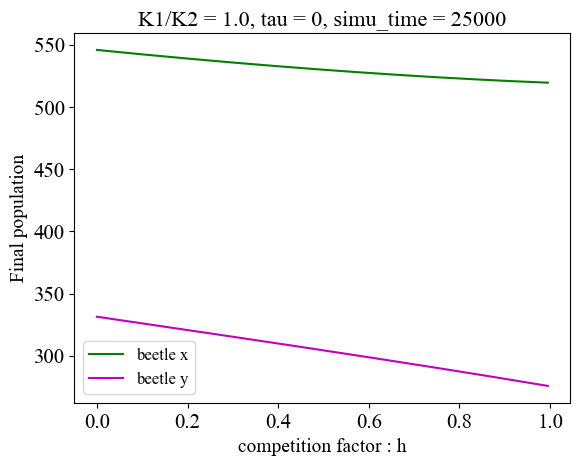

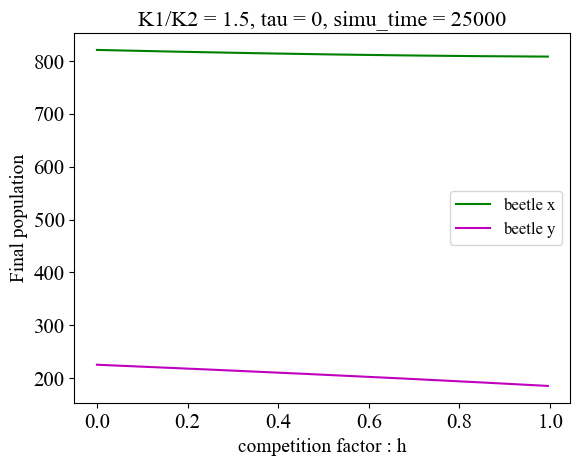

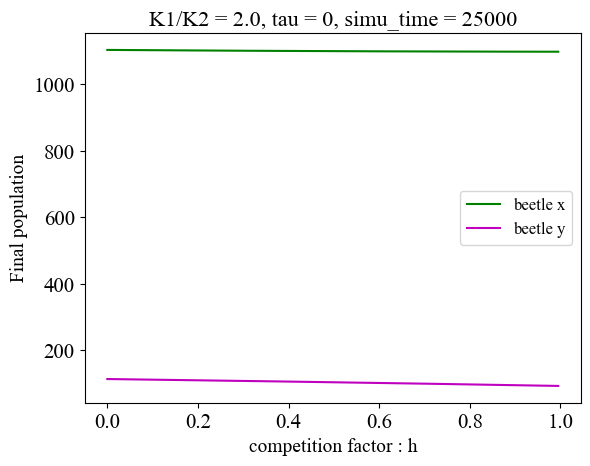

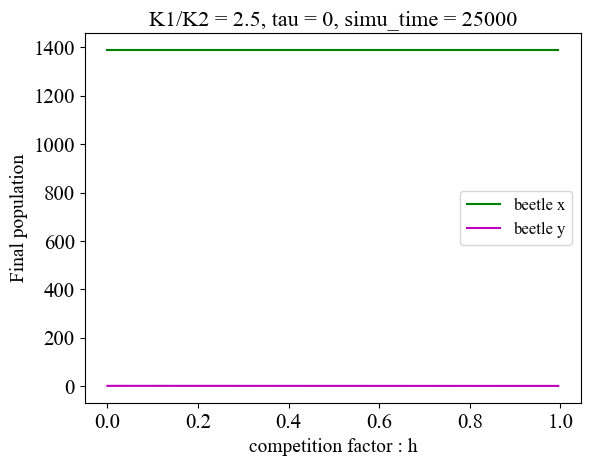

Invasion start time= 22930440000.0 Simulation finished time 47930.439954145324
Competition coefficient between mammals 0.4 competition coefficient between dung beetles 1.0000000000000007
time delay tau = 0
Before invasion x =  280 After invasion x= 1389 Before invasion y= 279 After invasion y= 1 Before invasion x+y 558 After invasion x+y 1390
functional response, Handling time is g11=3, g12=0.9, g21=0.9, g22=0.3


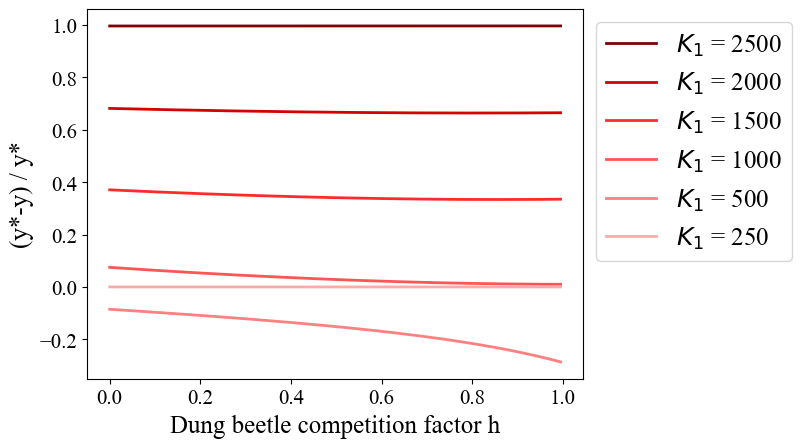

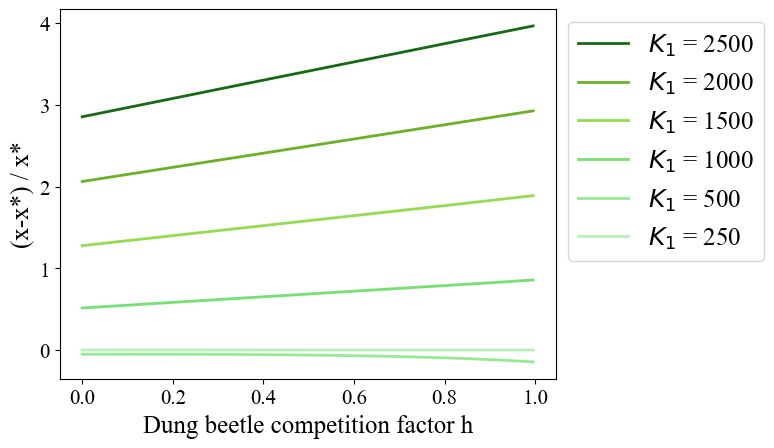

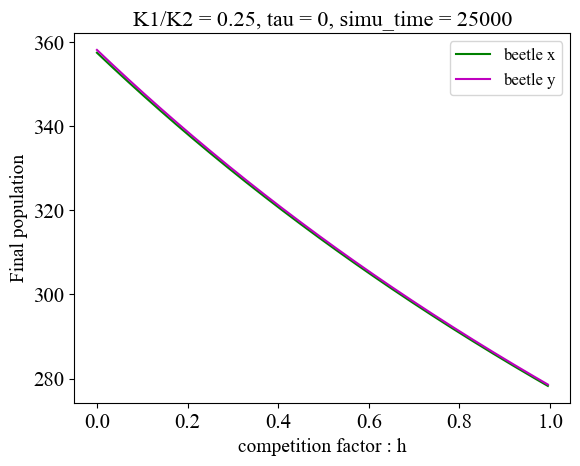

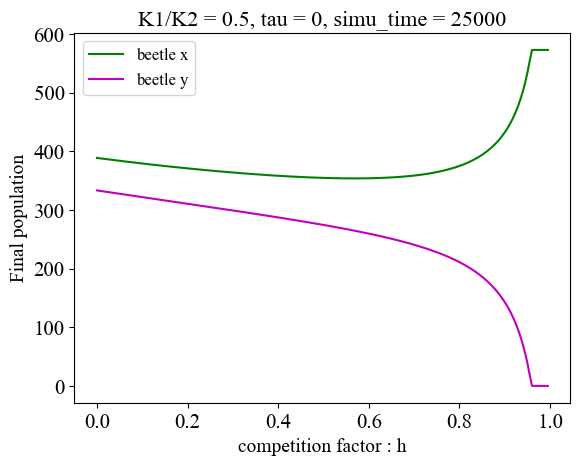

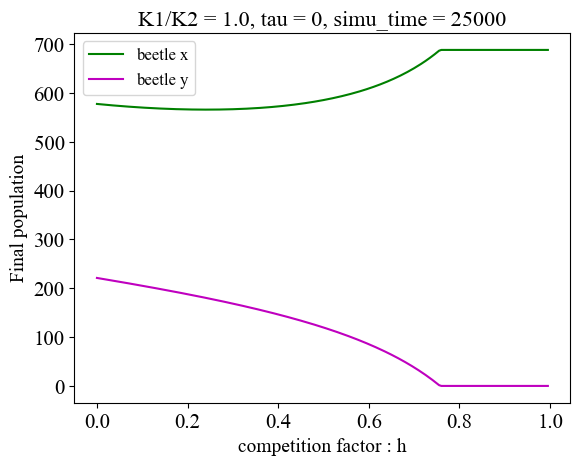

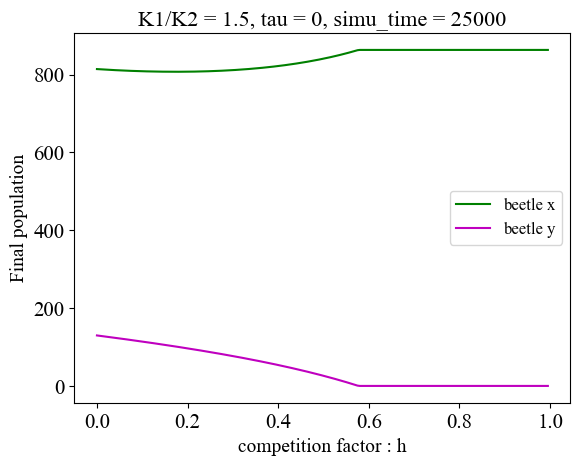

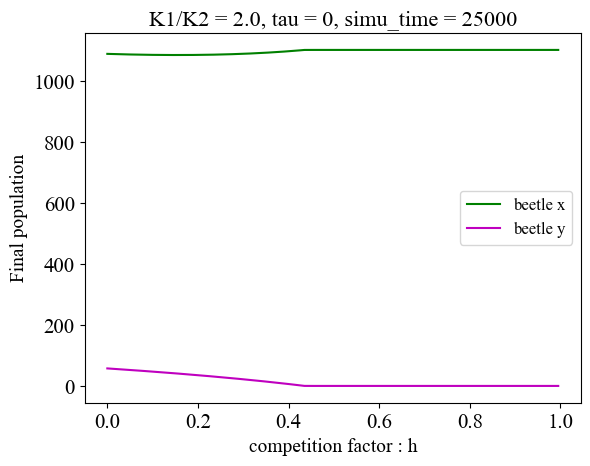

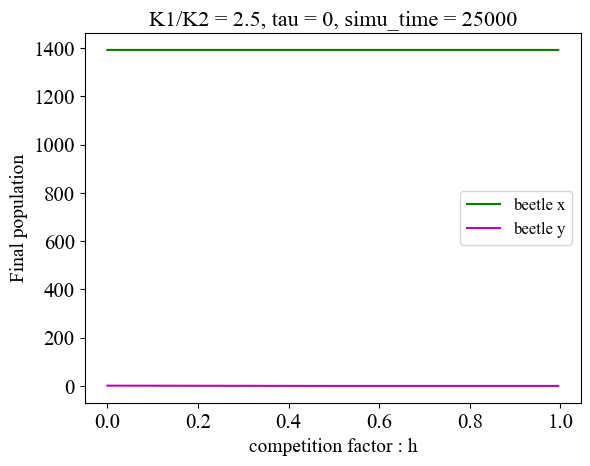

Invasion start time= 23266973000.0 Simulation finished time 48266.972952989585
Competition coefficient between mammals 0.4 competition coefficient between dung beetles 1.0000000000000007
time delay tau = 0
Before invasion x =  278 After invasion x= 1392 Before invasion y= 279 After invasion y= 0 Before invasion x+y 557 After invasion x+y 1392
functional response, Handling time is g11=0.3, g12=0.9, g21=0.9, g22=3


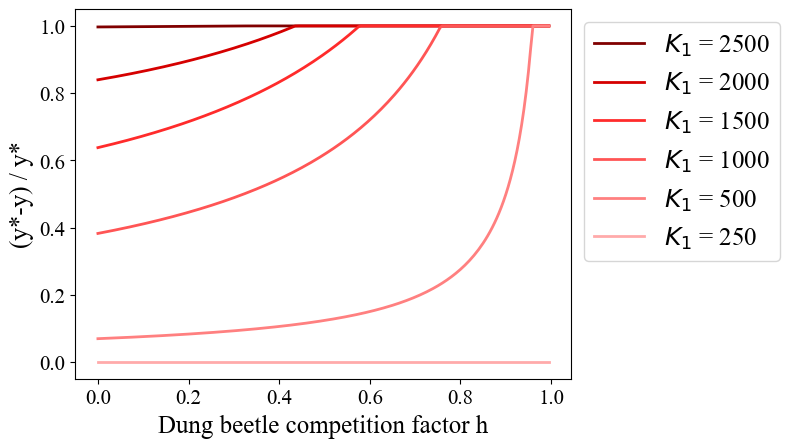

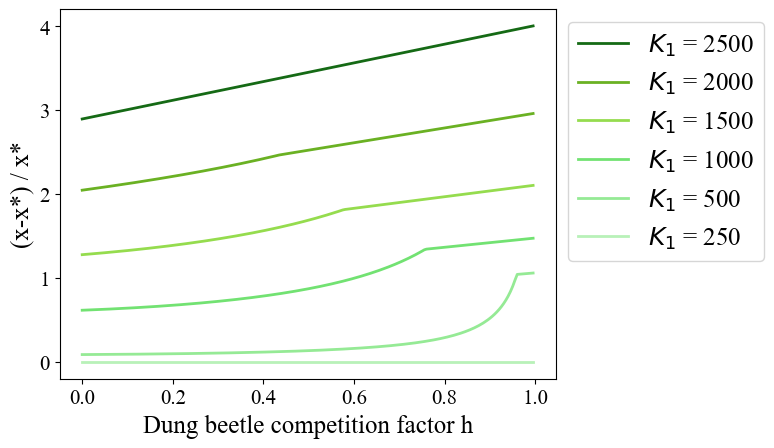

In [3]:


import os
import datetime
import time
dt_now_jst = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
t_start= time.time()

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("output/ChangingK1_EachFunRes/ChangeK1_EachFunRes.pdf")
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

import pickle
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data
    
def append_list_b():
    #definitions of append parameters to the list
    t_oi.append(t)
    n2_l.append(n2)
    f2_l.append(f2)
    x_l.append(x)
    y_l.append(y)

def append_list_a():

    append_list_b()
    tinvasion.append(t)
    n1_l.append(n1)
    f1_l.append(f1)

def append_last_list():
    
    last_x.append(x)
    last_y.append(y)
    last_total.append(x+y)
    last_comp_xx_kl.append((F2*x)/(k*f2))
    last_comp_xy_kl.append((h*G2*y)/(k*f2))
    last_comp_yx_kl.append((h*F2*x)/(k*f2))
    last_comp_yy_kl.append((G2*y)/(k*f2))

from tqdm.notebook import tqdm
with tqdm() as pbar:
    y_diff_normalize_lll, x_diff_normalize_lll,total_diff_normalize_lll, h_lll = [], [], [], []
    comp_diff_xx_klll, comp_diff_xy_klll, comp_diff_yx_klll, comp_diff_yy_klll = [], [], [], []

    situ = 0
    g11_l = [1, 10, 3 , 0.3]
    g22_l = [1, 10, 0.3, 3]
    g12_l = [1, 0.1, 0.9, 0.9]
    g21_l = [1, 0.1, 0.9, 0.9]

    for g11, g22, g12, g21  in zip (g11_l, g22_l, g12_l, g21_l):
        situ += 1

        h_ll = []
        x_diff_normalize_ll, y_diff_normalize_ll, total_diff_normalize_ll = [], [], []
        comp_diff_xx_kll, comp_diff_xy_kll, comp_diff_yx_kll, comp_diff_yy_kll = [], [], [], []

        #K1 = 0
        K2 = 1000
        Kratio_l = []
        K1_l = [250, 500, 1000, 1500, 2000, 2500]
        #Changing K1
        for K1 in K1_l:
            x_fl, y_fl= [], []
            
            x_diff_normalize_l, y_diff_normalize_l, total_diff_normalize_l = [], [], []
            comp_diff_xx_kl, comp_diff_xy_kl, comp_diff_yx_kl, comp_diff_yy_kl = [], [], [], []

            h= 0
            h_l =[]
            #Changing h
            while(h<=1.0):

                t = 0               #Initial time
                a = 0.4             #competition coefficient between mammals
                n1 = 0              #Population size of invasive mammals before invasion
                n2 = 1000           #Population size of native mammals

                r1, r2 = 0.2, 0.1   #Intrinstic growth rate of mammals　sika>mammal　(number/hour)
                b1, b2 = 1, 1       #Defecation efficiency
                c1 , c2 = 0.8, 0.8   #Natural weathering ratio
                f2 = 1000            #Native mammal feces
                e1, e2 = 0.1, 0.1
                e_y = 0.2
                k = 1.0

                # g11 = g22 = g12 = g21 = 1
                g_y = 1
                T11 = T12 = T21 = T22 = 1
                T_y = 1
                
                x = y = 300 #initial population size of dung beetle

                t_oi, n2_l, f2_l, x_l, y_l = [t], [n2], [f2], [x],[y]
                last_x, last_y, last_total = [], [], []

                last_comp_xx_kl, last_comp_xy_kl, last_comp_yx_kl, last_comp_yy_kl = [], [], [], []

                dt = 0.001
                simu_time  = 25000          #simulation time each before and after the invasion.
                cut_order = 6
                simu_cut = 1.0 * 10**(-1*cut_order)
                TEND1 = int(simu_time/dt)   #simulation time divided by dt

                #Simulation Before invasion 
                for i in range(TEND1):
                    t += dt
                    n1 = 0

                    G2 =(g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]) 
                    F2 =(g22*f2_l[i]) / (1+ g22*T22*f2_l[i])
                
                    n2 += (r2*n2_l[i] * (1- (n2_l[i])/K2))*dt  
                    f1 = 0
                    f2 += (b2*n2_l[i] - c2*f2_l[i]- F2*x_l[i] - G2*y_l[i])*dt

                    x += (F2*e2*x_l[i] * (1- (F2*x_l[i] + h*G2*y_l[i]) / (k*f2_l[i])))*dt
                    y += (G2*e_y*y_l[i] * (1- (G2*y_l[i] + h*F2*x_l[i]) / (k*f2_l[i])))*dt

                    append_list_b()
                    if  i*dt > 100 and abs(y_l[int(-1/dt)-1]-y_l[-1]) < (simu_cut) and abs(x_l[int(-1/dt)-1]-x_l[-1]) < (simu_cut):
                        break

                append_last_list()


                n1 = 10             #Invasive mammal population size
                n1_negative = 10    #When (t - tau) is negative ,then n1 = n1_negative
                f1 = 1
                tau = 0            #Time-delay parameter
                TAU = int(tau/dt)

                TEND_B = int(t/dt)     #Before invasion simulations finished time divided by dt
                #After invasion simulation year
                TEND2 = int(TEND_B + (simu_time/dt))
                tinvasion, n1_l, f1_l = [t],[n1], [f1]

                #Simulation after mammal invasion
                for i in range(TEND_B, TEND2):
                    
                    # when (t-tau) is negative
                    if (i < TEND_B + TAU):
                        t = t + dt
                        j = i - TEND_B   #iteration after the invasion

                        n1 += (r1*n1_l[j] * (1- (n1_negative + a*n2_l[i])/K1 ))*dt
                        n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                        G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))
                        F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                        F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                        f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                        f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

                        x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                        y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

                        append_list_a()

                    # When (t-tau) is positive
                    elif (i >= TEND_B + TAU):
                        t = t + dt
                        j = i - TEND_B

                        n1 += (r1*n1_l[j] * (1- (n1_l[j - TAU] + a*n2_l[i])/K1 ))*dt
                        n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                        G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))
                        F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                        F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                        f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                        f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt
                        
                        x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                        y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

                        append_list_a()
                        if  j*dt > 100 and abs(y_l[int(-1/dt)-1]-y_l[-1]) < (simu_cut) and abs(x_l[int(-1/dt)-1]-x_l[-1]) < (simu_cut):
                            break


                h_l.append(h)
                x_fl.append(x)
                y_fl.append(y)

                append_last_list()

                comp_diff_xx_kl.append((last_comp_xx_kl[1]-last_comp_xx_kl[0]))
                comp_diff_xy_kl.append((last_comp_xy_kl[1]-last_comp_xy_kl[0]))
                comp_diff_yx_kl.append((last_comp_yx_kl[1]-last_comp_yx_kl[0]))
                comp_diff_yy_kl.append((last_comp_yy_kl[1]-last_comp_yy_kl[0]))

                x_diff_normalize_l.append((last_x[1]-last_x[0])/ last_x[0])
                y_diff_normalize_l.append((last_y[0]-last_y[1])/last_y[0])

                total_diff_normalize_l.append((last_total[1]-last_total[0])/last_total[0])

                h += 0.005
                pbar.set_description(f"[situ = {situ}, K1 = {K1}, h = {h}]")


            plt.figure()
            plt.plot(h_l, x_fl, 'g', h_l, y_fl, 'm')
            plt.legend(["beetle x", "beetle y"],  fontsize="12")
            plt.title("K1/K2 = {}, tau = {}, simu_time = {}".format(K1/K2, tau, simu_time), fontsize="16")
            plt.xlabel("competition factor : h", fontsize="14")
            plt.ylabel("Final population", fontsize="14")
            plt.show()     

            Kratio_l.append(K1/K2)
            
            x_diff_normalize_ll.append(x_diff_normalize_l)
            y_diff_normalize_ll.append(y_diff_normalize_l)
            total_diff_normalize_ll.append(total_diff_normalize_l)
            h_ll.append(h_l)

            comp_diff_xx_kll.append(comp_diff_xx_kl)
            comp_diff_xy_kll.append(comp_diff_xy_kl)
            comp_diff_yx_kll.append(comp_diff_yx_kl)
            comp_diff_yy_kll.append(comp_diff_yy_kl)

            pbar.update(1)

        print("Invasion start time=", TEND_B/dt, "Simulation finished time", t)
        print("Competition coefficient between mammals", a, "competition coefficient between dung beetles", h)
        print("time delay tau =",tau)
        print("Before invasion x = ",round(last_x[0]),"After invasion x=",round(last_x[1]),"Before invasion y=",round(last_y[0]),"After invasion y=",round(last_y[1]),"Before invasion x+y",round(last_total[0]),"After invasion x+y",round(last_total[1]))
        print("functional response, Handling time is g11={}, g12={}, g21={}, g22={}".format(g11,g12,g21,g22))



        x_diff_normalize_lll.append(x_diff_normalize_ll)        
        y_diff_normalize_lll.append(y_diff_normalize_ll)
        total_diff_normalize_lll.append(total_diff_normalize_ll)
        h_lll.append(h_ll)


        comp_diff_xx_klll.append(comp_diff_xx_kll)
        comp_diff_xy_klll.append(comp_diff_xy_kll)
        comp_diff_yx_klll.append(comp_diff_yx_kll)
        comp_diff_yy_klll.append(comp_diff_yy_kll)


        #figure y
        color_yl = ["#800000","#d50000","#ff2b2b", "#ff5555","#ff8080", "#ffaaaa" ]
        plt.figure()
        nagasa = len(y_diff_normalize_ll)
        for i in range(nagasa):
            plt.plot(h_ll[5-i], y_diff_normalize_ll[5-i], linewidth="2", c = color_yl[i])
        plt.legend(["$K_{1}$ = "+"{}".format(var)for var in reversed(K1_l)], loc="upper left", fontsize="18", bbox_to_anchor=(1., 1))
        plt.xlabel("Dung beetle competition factor h", fontsize="18")
        plt.ylabel("(y*-y) / y*", fontsize="18")
        plt.show()

        #figure x
        color_xl = ["#156a15","#6ab123","#95dc4e", "#72e272","#95ea95", "#b8f1b8" ]
        plt.figure()
        nagasa = len(x_diff_normalize_ll)
        for i in range(nagasa):
            plt.plot(h_ll[5-i], x_diff_normalize_ll[5-i], linewidth="2", c = color_xl[i])
        plt.legend(["$K_{1}$ = "+"{}".format(var)for var in reversed(K1_l)], loc="upper left", fontsize="18", bbox_to_anchor=(1., 1))
        plt.xlabel("Dung beetle competition factor h", fontsize="18")
        plt.ylabel("(x-x*) / x*", fontsize="18")
        plt.show()


out_lll_path = f"output/ChangingK1_EachFunRes/xy,dt={dt},simu_time={simu_time},simu_cut={cut_order}/"
os.makedirs(out_lll_path, exist_ok =True)
pickle_l = [x_diff_normalize_lll, y_diff_normalize_lll, total_diff_normalize_lll, h_lll, comp_diff_xx_klll, comp_diff_xy_klll, comp_diff_yx_klll, comp_diff_yy_klll]
pickle_name_l = ["x_diff_normalize_lll", "y_diff_normalize_lll", "total_diff_normalize_lll", "h_lll", "comp_diff_xx_klll", "comp_diff_xy_klll", "comp_diff_yx_klll", "comp_diff_yy_klll"]
out_name_l = [out_lll_path + "{}.pickle".format(name) for name in pickle_name_l]
#Save results as .pickle
for i, j in zip(pickle_l, out_name_l):
    pickle_dump(i, j)


t_end = time.time()
elapsed_time = t_end - t_start
path = out_lll_path + 'erapsed_time.txt'
f = open(path, 'w')
f.write(f"Calculation start {dt_now_jst}, Calculation time、{elapsed_time}s")  
f.close()

pdf.close()

FigS6 

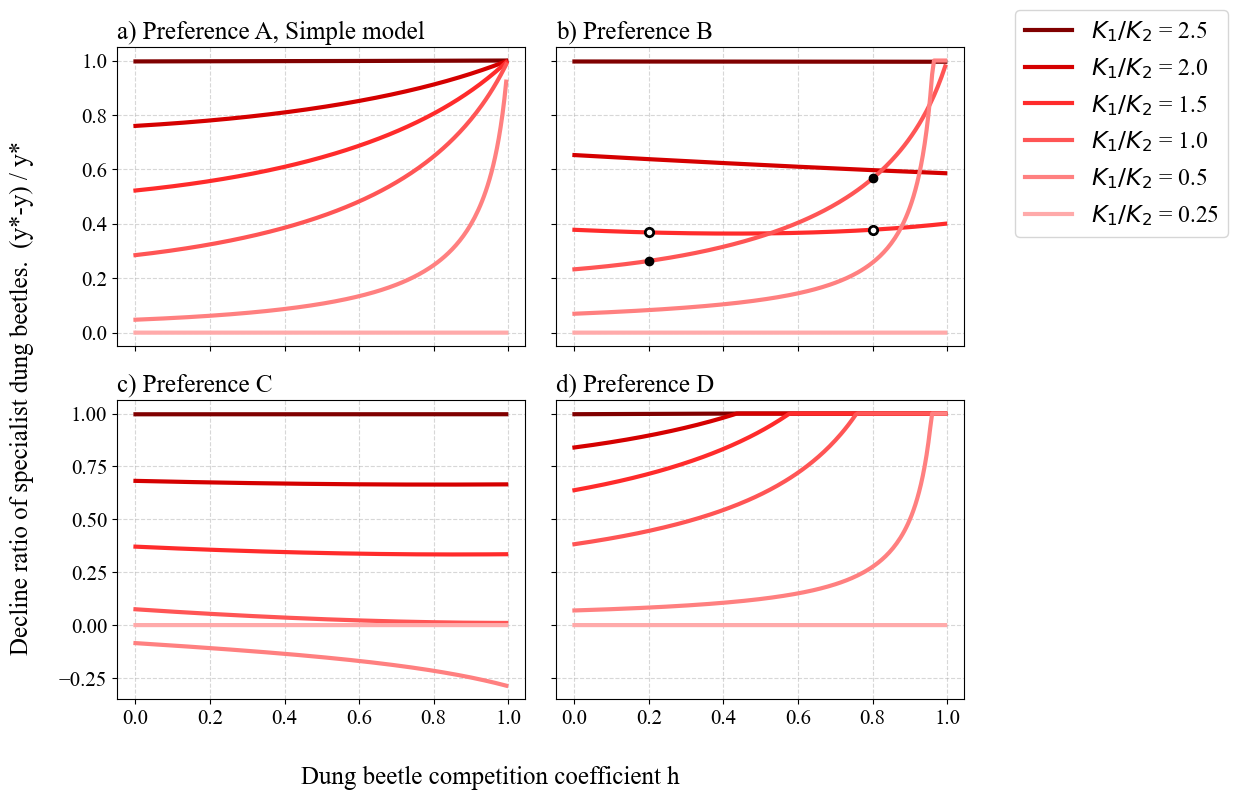

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15
# plt.rcParams['figure.dpi'] = 600


import pickle

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data

dt = 0.001
simu_time  = 25000          #simulation time each before and after the invasion.
cut_order = 6


out_lll_path = f"output/ChangingK1_EachFunRes/xy,dt={dt},simu_time={simu_time},simu_cut={cut_order}/"
y_diff_normalize_lll = pickle_load( out_lll_path+"y_diff_normalize_lll.pickle")
h_lll = pickle_load(out_lll_path+"h_lll.pickle")

fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(10, 8), sharex=True, sharey="row")
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1] 
ax_l= [ax1, ax2, ax3, ax4]

color_yl = ["#800000","#d50000","#ff2b2b", "#ff5555","#ff8080", "#ffaaaa" ]
title_l = ["a) Preference A, Simple model", "b) Preference B", "c) Preference C", "d) Preference D" ]
for j in range(4):
    ax_l[j].grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
    ax_l[j].set_title(title_l[j], loc="left")
    nagasa = 6
    for i in range(nagasa):
        ax_l[j].plot(h_lll[j][5-i], y_diff_normalize_lll[j][5-i], linewidth="3", c = color_yl[i])


# 点の描写
ax_l[1].plot(h_lll[1][2][40], y_diff_normalize_lll[1][2][40],
             h_lll[1][2][160], y_diff_normalize_lll[1][2][160],marker= ".", markersize = "12", c = "black")
ax_l[1].plot(h_lll[1][3][40], y_diff_normalize_lll[1][3][40],
             h_lll[1][3][160], y_diff_normalize_lll[1][3][160] ,marker= ".", c = "black", markersize = "14")
ax_l[1].plot(h_lll[1][3][40], y_diff_normalize_lll[1][3][40],
             h_lll[1][3][160], y_diff_normalize_lll[1][3][160] ,marker= ".", c = "white", markersize = "6")


fig.supxlabel("Dung beetle competition coefficient h", fontsize="18")
fig.supylabel("Decline ratio of specialist dung beetles.  (y*-y) / y*", fontsize="18")
K1_l = [250, 500, 1000, 1500, 2000, 2500]
fig.legend(["$K_{1}/K_{2}$ = "+"{}".format(var/1000)for var in reversed(K1_l)], bbox_to_anchor=(1.25, 1.0), fontsize="17")
plt.tight_layout()

plt.savefig(out_lll_path+"fig3y.pdf", bbox_inches="tight")

plt.show()



FigS7 Pref2 h = 0.4, 0.8, 

0
1
2
3


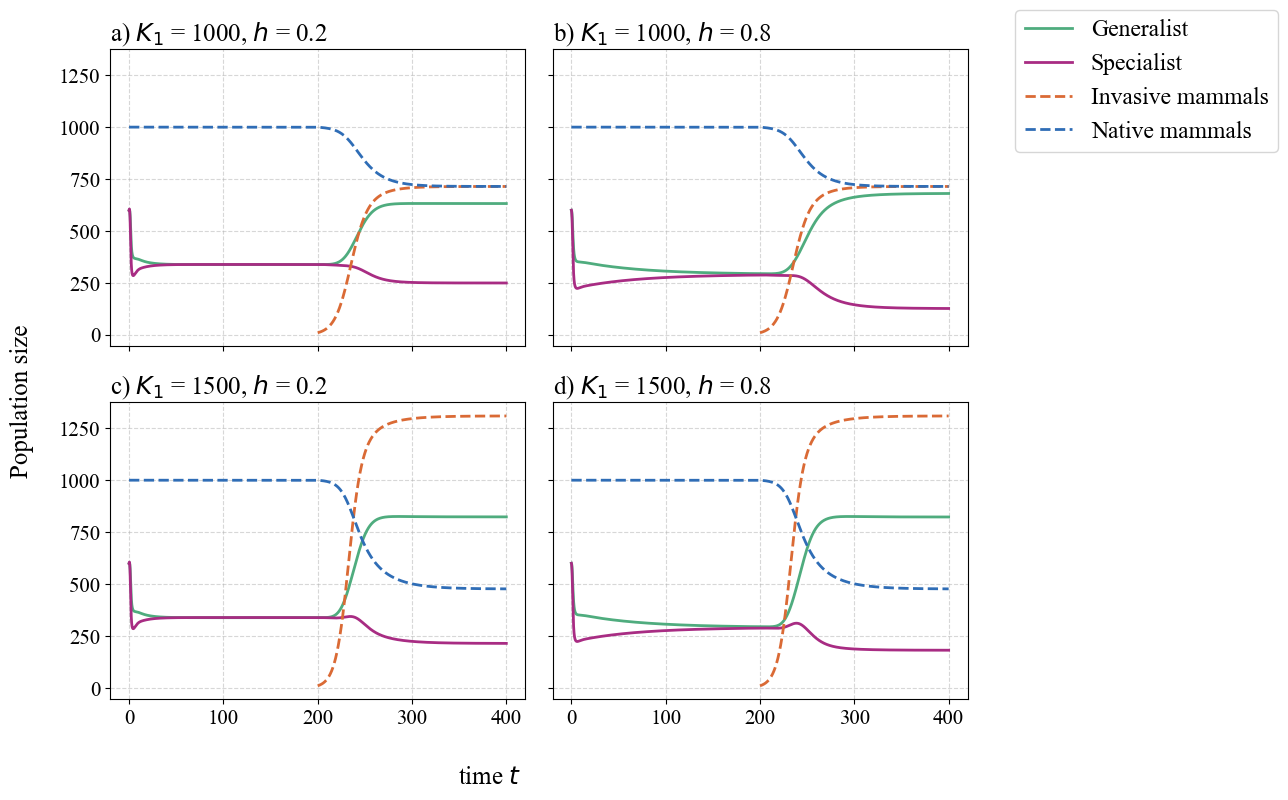

In [1]:


import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("ChangingK1.pdf")
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

import pickle
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data
    
def append_list_b():
    #definitions of append parameters to the list
    t_oi.append(t)
    n2_l.append(n2)
    f2_l.append(f2)
    x_l.append(x)
    y_l.append(y)

def append_list_a():

    append_list_b()
    tinvasion.append(t)
    n1_l.append(n1)
    f1_l.append(f1)


fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(10, 8), sharex=True, sharey="all")
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1] 
ax_l= [ax1, ax2, ax3, ax4]
fig_num = 0
title_l =["a)", "b)", "c)", "d)"]


t_oi_ll, t_inv_ll, n1_ll, n2_ll, x_ll, y_ll = [], [], [], [], [], []


K1_l  =[1000, 1500]
for K1 in K1_l:

    h_l  =[0.2, 0.8]
    for h in h_l:
        
        y_diff_ll, y_diff_normalize_ll = [], []
        h_ll = []

        h_l =[]
        x_fl, y_fl= [], []

        y_diff_l, y_diff_normalize_l = [], []

        t = 0               #Initial time
        a = 0.4             #competition coefficient between mammals
        n1 = 0              #Population size of invasive mammals before invasion
        n2 = 1000           #Population size of native mammals

        r1, r2 = 0.2, 0.1   #Intrinstic growth rate of mammals　sika>mammal　(number/hour)
        b1, b2 = 1, 1   #Defecation efficiency
        c1 , c2 = 0.8, 0.8   #Natural weathering ratio
        f2 = 1000            #Native mammal feces
        # h= 0.4

        e1, e2 = 0.1, 0.1
        e_y = 0.2
        k = 1.0

        # K1 = 1500
        K2 = 1000

        g11 = g22 = 10
        g12 = g21 = 0.1
        g_y = 1
        T11 = T12 = T21 =T22 = 1
        T_y = 1

        #Initial number of dung beetles
        x = y = 600      #initial population size of dung beetle

        t_oi, n2_l, f2_l, x_l, y_l = [t], [n2], [f2], [x],[y]
        last_x, last_y, last_total = [], [], []

        dt = 0.005
        tEnd1 = 200     #Before invasion simulation year
        TEND1 = int(tEnd1/dt)

        #Simulation Before invasion 
        for i in range(TEND1):
            t += dt
            n1 = 0

            G2 = (g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]) 
            F2 = (g22*f2_l[i]) / (1+ g22*T22*f2_l[i])

            n2 += (r2*n2_l[i] * (1- (n2_l[i])/K2))*dt  
            f1 = 0
            f2 += (b2*n2_l[i] - c2*f2_l[i]- F2*x_l[i] - G2*y_l[i])*dt

            x += (F2*e2*x_l[i] * (1- (F2*x_l[i] + h*G2*y_l[i]) / (k*f2_l[i])))*dt
            y += (G2*e_y*y_l[i] * (1- (G2*y_l[i] + h*F2*x_l[i]) / (k*f2_l[i])))*dt

            append_list_b()

        last_x.append(x)
        last_y.append(y)
        last_total.append(x+y)

        n1 = 10             #Invasive mammal deintisty
        n1_negative = 10    #Invasive mammal deintisty effect population size when t-tau is negative
        f1 = 1
        tau = 0            #Time-delay parameter
        TAU = int(tau/dt)

        #After invasion simulation year
        tEnd2 = 2*tEnd1         #total simulation year
        TEND2 = int(tEnd2/dt)
        tinvasion, n1_l, f1_l = [t],[n1], [f1]

        #Simulation after mammal invasion
        for i in range(TEND1, TEND2):
            
            #when t - tau negative
            if (i < TEND1 + TAU):
                j = i - TEND1   #iteration number
                t = t + dt

                n1 = n1 + (r1*n1_l[j] * (1- (n1_negative + a*n2_l[i])/K1 ))*dt
                n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

                F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt


                x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

                append_list_a()

            
            elif (i >= TEND1 + TAU):
                t = t + dt
                j = i - TEND1
                
                

                n1 = n1 + (r1*n1_l[j] * (1- (n1_l[j - TAU] + a*n2_l[i])/K1 ))*dt
                
                n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt

                G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

                F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

                
                x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

                append_list_a()

        h_l.append(h)
        x_fl.append(x)
        y_fl.append(y)

        last_x.append(x)
        last_y.append(y)
        last_total.append(x+y)

        y_diff_l.append(last_y[0]-last_y[1])
        y_diff_normalize_l.append((last_y[0]-last_y[1])/ last_y[0])


        #Figure of population dynamics
        # plt.figure(figsize=(6,5))

        ax_l[fig_num].grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
        ax_l[fig_num].set_title(title_l[fig_num]+f" $K_{1}$ = {K1}, $h$ = {h}", loc="left")
        # ax_l[fig_num].plot(t_oi[TEND1:], x_l[TEND1:], '#4fac7e', t_oi[TEND1:], y_l[TEND1:],'#a82c83', linewidth=2)
        # ax_l[fig_num].plot(tinvasion, n1_l, '#da6a35', t_oi[TEND1:], n2_l[TEND1:], '#2f6db6',linestyle="--", linewidth=2)
        # ax_l[fig_num].plot(t_oi[int(150/dt):], y_l[int(150/dt):],'#a82c83', linewidth=2)
        # ax_l[fig_num].plot(tinvasion, n1_l, '#da6a35', t_oi[int(150/dt):], n2_l[int(150/dt):], '#2f6db6',linestyle="--", linewidth=2)
        ax_l[fig_num].plot(t_oi, x_l, '#4fac7e', t_oi, y_l,'#a82c83', linewidth=2)
        ax_l[fig_num].plot(tinvasion, n1_l, '#da6a35', t_oi, n2_l, '#2f6db6',linestyle="--", linewidth=2)

        # plt.title("Population dynamics  h = {}".format(h), fontsize="16")
        # plt.xlabel("Time")
        # plt.ylabel("Number of individuals")
        # plt.show()

        t_oi_ll.append(t_oi)
        t_inv_ll.append(tinvasion)
        n1_ll.append(n1_l)
        n2_ll.append(n2_l)
        x_ll.append(x_l)
        y_ll.append(y_l)
        print(fig_num)
        fig_num += 1

fig.supxlabel("time $t$", fontsize="18")
fig.supylabel("Population size ", fontsize="18")
fig.legend(["Generalist", "Specialist", "Invasive mammals", "Native mammals"], bbox_to_anchor=(1.3, 1.0), fontsize="17")

plt.tight_layout()
plt.savefig("output/"+"situ2_figSa.pdf", bbox_inches="tight")
plt.show()


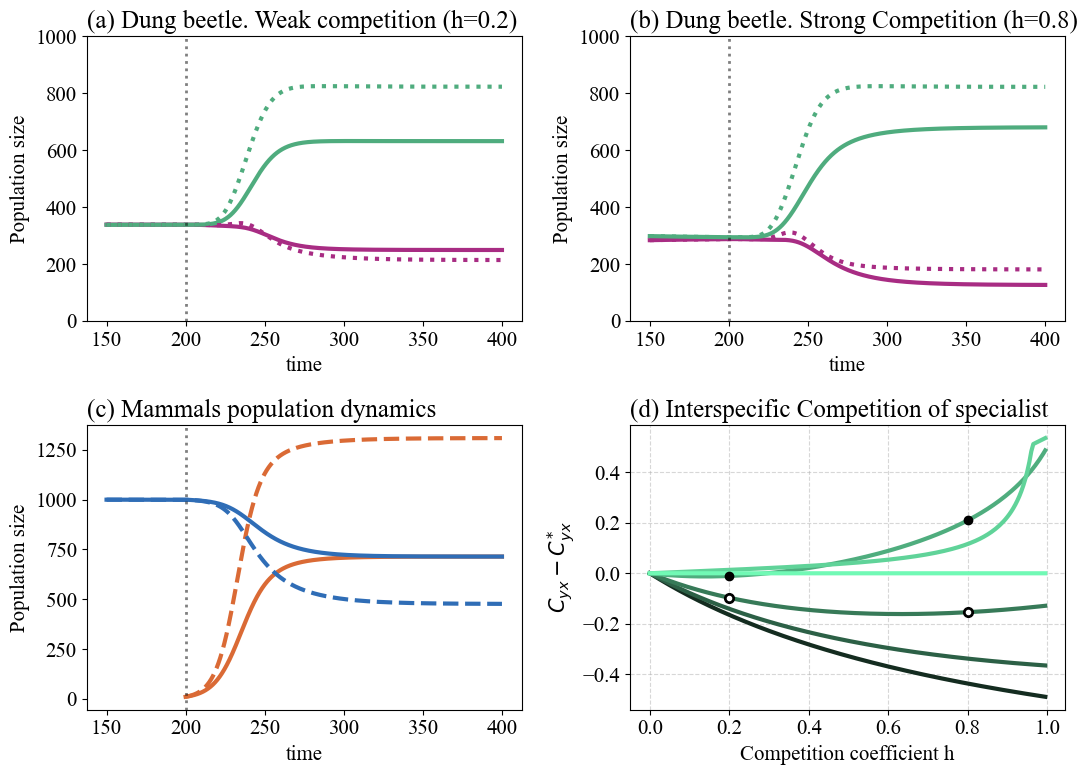

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

# fig = plt.figure(tight_layout=True,figsize=(10, 8))
fig ,axes = plt.subplots(2, 2, tight_layout=True, figsize=(11, 8), sharex =False, sharey = False )
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]


# ax1 = fig.add_subplot(2,2,1)
# ax2 = fig.add_subplot(2,2,2)
# ax3 = fig.add_subplot(2,2,3)
# ax4 = fig.add_subplot(2,2,4)

#down left, down right, upper left
ax_l = [ax1,  ax2, ax3, ax4]
title_l =["(a) Dung beetle. Weak competition (h=0.2)", "(b) Dung beetle. Strong Competition (h=0.8)"]

import pickle

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data


out_lll_path = f"output/ChangingK1_EachFunRes/xy,dt=0.001,simu_time=25000,simu_cut=6/"

diff_yx_klll = pickle_load( out_lll_path+"comp_diff_yx_klll" + ".pickle")
h_lll = pickle_load( out_lll_path  + "h_lll" + ".pickle")


color_l = ["#142c20","#2c6046", "#377a58","#4fad7e","#60d399", "#71f9b5" ]

nagasa= len(h_lll[1])
for i in range(nagasa):
    ax_l[3].plot(h_lll[1][5-i], diff_yx_klll[1][5-i], linewidth="3", c = color_l[i])

ax_l[3].set_title("(d) Interspecific Competition of specialist", loc="left")

#A, B, C, D plot
ax_l[3].plot(h_lll[1][2][40], diff_yx_klll[1][2][40],
             h_lll[1][2][160], diff_yx_klll[1][2][160],marker= ".", markersize = "12", c = "black")
ax_l[3].plot(h_lll[1][3][40], diff_yx_klll[1][3][40],
             h_lll[1][3][160], diff_yx_klll[1][3][160] ,marker= ".", c = "black", markersize = "14")
ax_l[3].plot(h_lll[1][3][40], diff_yx_klll[1][3][40],
             h_lll[1][3][160], diff_yx_klll[1][3][160] ,marker= ".", c = "white", markersize = "6")

ax_l[3].set_xlabel("Competition coefficient h")
ax_l[3].set_ylabel("$C_{yx} - C_{yx}^{*} $")
ax_l[3].grid(which ="major", axis="both", linestyle="--",alpha = 0.5)

#drow  mammals population dynamics
ax_l[2].set_title("(c) Mammals population dynamics", loc="left")
ax_l[2].plot(t_inv_ll[0], n1_ll[0], '#da6a35', t_oi_ll[0][int(150/dt):], n2_ll[0][int(150/dt):], '#2f6db6', linewidth=3)
ax_l[2].plot(t_inv_ll[2], n1_ll[2], '#da6a35', t_oi_ll[2][int(150/dt):], n2_ll[2][int(150/dt):], '#2f6db6',linestyle="--", linewidth=3)

ax_l[2].set_xlabel("time")
ax_l[2].set_ylabel("Population size")
ax_l[2].axvline(x=200, linestyle="dotted", color="black", alpha=0.5, lw=2)


#left fig k1  =1000,1500 h = 0.2
ax_l[0].set_title(title_l[0], loc="left")

ax_l[0].plot(t_oi_ll[0][int(150/dt):], y_ll[0][int(150/dt):],'#a82c83',
             t_oi_ll[0][int(150/dt):],  x_ll[0][int(150/dt):],'#4fac7e',linewidth=3)

ax_l[0].plot(t_oi_ll[2][int(150/dt):], y_ll[2][int(150/dt):],'#a82c83',
             t_oi_ll[2][int(150/dt):], x_ll[2][int(150/dt):],'#4fac7e', linestyle= ":", linewidth=3)
ax_l[0].set_ylim(0,1000)
ax_l[0].set_ylabel("Population size")
ax_l[0].set_xlabel("time")
ax_l[0].axvline(x=200, linestyle="dotted", color="black", alpha=0.5, lw=2)

#right fig k1  =1000,1500 h = 0.8
ax_l[1].set_title(title_l[1], loc="left")

ax_l[1].plot(t_oi_ll[3][int(150/dt):], y_ll[3][int(150/dt):],'#a82c83', 
             t_oi_ll[3][int(150/dt):], x_ll[3][int(150/dt):],'#4fac7e',linestyle= ":", linewidth=3)

ax_l[1].plot(t_oi_ll[1][int(150/dt):], y_ll[1][int(150/dt):],'#a82c83', 
             t_oi_ll[1][int(150/dt):], x_ll[1][int(150/dt):],'#4fac7e',linewidth=3)
ax_l[1].set_ylim(0,1000)
ax_l[1].set_ylabel("Population size")
ax_l[1].set_xlabel("time")
ax_l[1].axvline(x=200, linestyle="dotted", color="black", alpha=0.5, lw=2)

# plt.savefig ("output/figS_situ2cross4.pdf", bbox_inches="tight")
plt.savefig ("output/fig_situ2cross.png", bbox_inches="tight")
plt.savefig ("output/fig_situ2cross_tmp.pdf", bbox_inches="tight")
plt.show()



FigS8, Competition strength change with K1

0it [00:00, ?it/s]

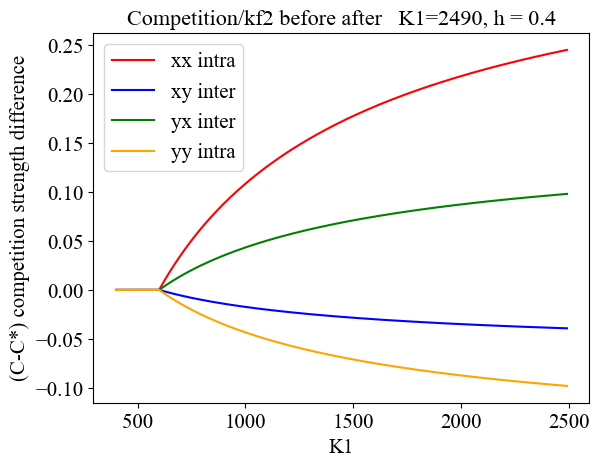

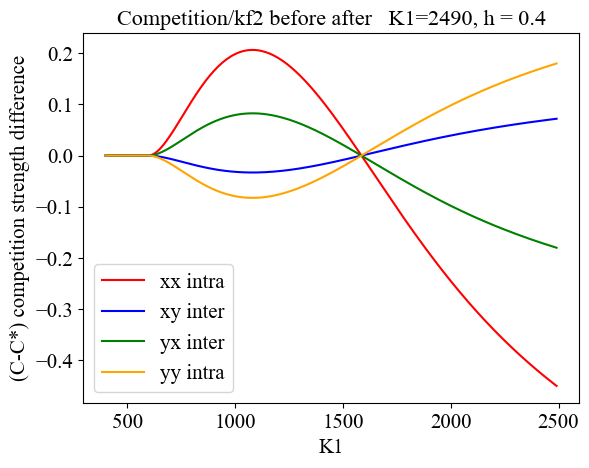

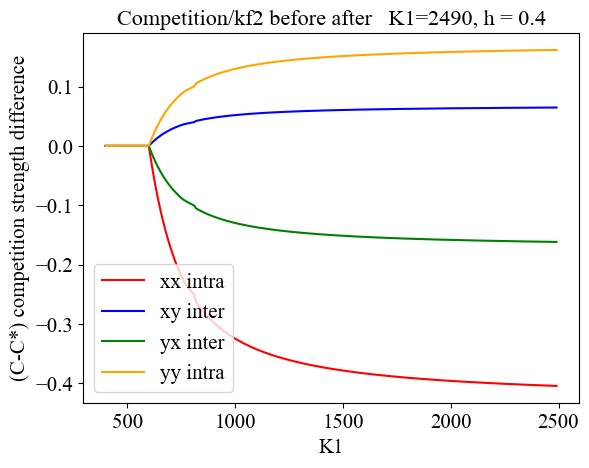

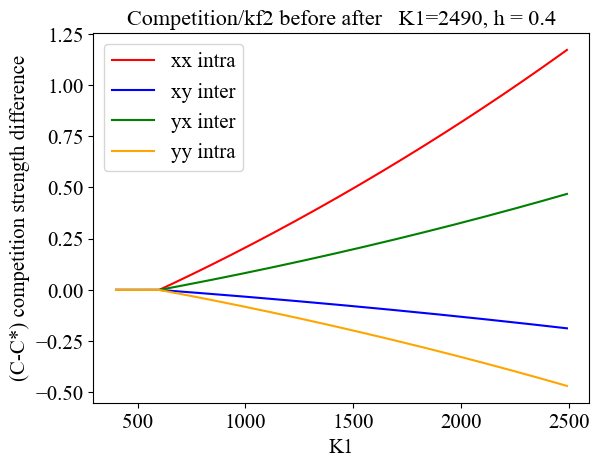

In [3]:

import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15


import pickle
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)


def append_list_b():
    #definitions of append parameters to the list
    t_oi.append(t)
    n2_l.append(n2)
    f2_l.append(f2)
    x_l.append(x)
    y_l.append(y)

def append_list_a():

    append_list_b()
    tinvasion.append(t)
    n1_l.append(n1)
    f1_l.append(f1)

def append_last_list():

    last_x.append(x)
    last_y.append(y)
    last_total.append(x+y)
    last_comp_xx_kl.append((F2*x)/(k*f2))
    last_comp_xy_kl.append((h*G2*y)/(k*f2))
    last_comp_yx_kl.append((h*F2*x)/(k*f2))
    last_comp_yy_kl.append((G2*y)/(k*f2))


from tqdm.notebook import tqdm
with tqdm() as pbar:
    
    diff_xx_kll, diff_xy_kll, diff_yx_kll, diff_yy_kll = [], [], [], []

    situ = 0
    g11_l = [1, 10, 3 , 0.3]
    g22_l = [1, 10, 0.3, 3]
    g12_l = [1, 0.1, 0.9, 0.9]
    g21_l = [1, 0.1, 0.9, 0.9]

    for g11, g22, g12, g21  in zip (g11_l, g22_l, g12_l, g21_l):
        situ += 1

        diff_xx_kl, diff_xy_kl, diff_yx_kl, diff_yy_kl = [], [], [], []

        K1 = 400
        K1_l = [k1 for k1 in range(K1, 2500, 10)] #arguments are initial, max, interval
        for K1 in K1_l:
            K2 = 1500

            t = 0               #Initial time
            a = 0.4             #competition coefficient between mammals
            n1 = 0              #Population size of invasive mammals before invasion
            n2 = 1000           #Population size of native mammals

            r1, r2 = 0.2, 0.1   #Intrinstic growth rate of mammals　sika>mammal　(number/hour)
            b1, b2 = 1, 1       #Defecation efficiency
            c1 , c2 = 0.8, 0.8   #Natural weathering ratio
            f2 = 1000            #Native mammal feces
            e1, e2 = 0.1, 0.1
            e_y = 0.2
            k = 1.0
            h = 0.4
            # g11 = g22 = g12 = g21 = 1
            g_y = 1
            T11 = T12 = T21 = T22 = 1
            T_y = 1
            
            x = y = 600 #initial population size of dung beetle

            t_oi, n2_l, f2_l, x_l, y_l = [t], [n2], [f2], [x],[y]
            last_x, last_y, last_total = [], [], []
            last_comp_xx_kl, last_comp_xy_kl, last_comp_yx_kl, last_comp_yy_kl = [], [], [], []

            dt = 0.001
            simu_time  = 25000          #simulation time each before and after the invasion.
            cut_order = 6
            simu_cut = 1.0 * 10**(-1*cut_order)
            TEND1 = int(simu_time/dt)   #simulation time divided by dt

            #Simulation Before invasion 
            for i in range(TEND1):
                t += dt
                n1 = 0

                G2 =(g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]) 
                F2 =(g22*f2_l[i]) / (1+ g22*T22*f2_l[i])
            
                n2 += (r2*n2_l[i] * (1- (n2_l[i])/K2))*dt  
                f1 = 0
                f2 += (b2*n2_l[i] - c2*f2_l[i]- F2*x_l[i] - G2*y_l[i])*dt

                x += (F2*e2*x_l[i] * (1- (F2*x_l[i] + h*G2*y_l[i]) / (k*f2_l[i])))*dt
                y += (G2*e_y*y_l[i] * (1- (G2*y_l[i] + h*F2*x_l[i]) / (k*f2_l[i])))*dt

                append_list_b()
                if  i*dt > 100 and abs(y_l[int(-1/dt)-1]-y_l[-1]) < (simu_cut):
                    break

            append_last_list()


            n1 = 10             #Invasive mammal population size
            n1_negative = 10    #When (t - tau) is negative ,then n1 = n1_negative
            f1 = 1
            tau = 0            #Time-delay parameter
            TAU = int(tau/dt)

            TEND_B = int(t/dt)     #Before invasion simulations finished time divided by dt
            #After invasion simulation year
            TEND2 = int(TEND_B + (simu_time/dt))
            tinvasion, n1_l, f1_l = [t],[n1], [f1]

            #Simulation after mammal invasion
            for i in range(TEND_B, TEND2):
                
                # when (t-tau) is negative
                if (i < TEND_B + TAU):
                    t = t + dt
                    j = i - TEND_B   #iteration after the invasion

                    n1 += (r1*n1_l[j] * (1- (n1_negative + a*n2_l[i])/K1 ))*dt
                    n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                    G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))
                    F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                    F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                    f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                    f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

                    x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                    y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

                    append_list_a()

                # When (t-tau) is positive
                elif (i >= TEND_B + TAU):
                    t = t + dt
                    j = i - TEND_B

                    n1 += (r1*n1_l[j] * (1- (n1_l[j - TAU] + a*n2_l[i])/K1 ))*dt
                    n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                    G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))
                    F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                    F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                    f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                    f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt
                    
                    x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                    y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

                    append_list_a()
                    if  j*dt > 100 and abs(y_l[int(-1/dt)-1]-y_l[-1]) < (simu_cut):
                        break


            append_last_list()


            diff_xx_kl.append((last_comp_xx_kl[1]-last_comp_xx_kl[0]))
            diff_xy_kl.append((last_comp_xy_kl[1]-last_comp_xy_kl[0]))
            diff_yx_kl.append((last_comp_yx_kl[1]-last_comp_yx_kl[0]))
            diff_yy_kl.append((last_comp_yy_kl[1]-last_comp_yy_kl[0]))

            pbar.update(1)
            pbar.set_description(f"[K1 = {K1}]")


        plt.figure()
        plt.plot(K1_l, diff_xx_kl,"r", K1_l, diff_xy_kl, "b", K1_l, diff_yx_kl,"g", K1_l, diff_yy_kl, "orange"  )
        plt.legend(["xx intra", "xy inter", "yx inter", "yy intra"])
        plt.title("Competition/kf2 before after   K1={}, h = {}".format(K1, h), fontsize="16")
        plt.ylabel("(C-C*) competition strength difference")
        plt.xlabel("K1")
        plt.savefig("for_ecology_comference/K1compk{}.pdf".format(situ))
        plt.show()


        diff_xx_kll.append(diff_xx_kl)
        diff_xy_kll.append(diff_xy_kl)
        diff_yx_kll.append(diff_yx_kl)
        diff_yy_kll.append(diff_yy_kl)


output_path = "output/Competition/"
os.makedirs(output_path, exist_ok =True)
#save calcuration result as pickle
pickle_l = [K1_l, diff_xx_kll, diff_xy_kll, diff_yx_kll, diff_yy_kll]
pickle_name_l = ["K1_l","diff_xx_kll", "diff_xy_kll", "diff_yx_kll", "diff_yy_kll"]
out_name_l = [output_path + "{}.pickle".format(name) for name in pickle_name_l]
#Save results as .pickle
for i, j in zip(pickle_l, out_name_l):
    pickle_dump(i, j)

plt.show()



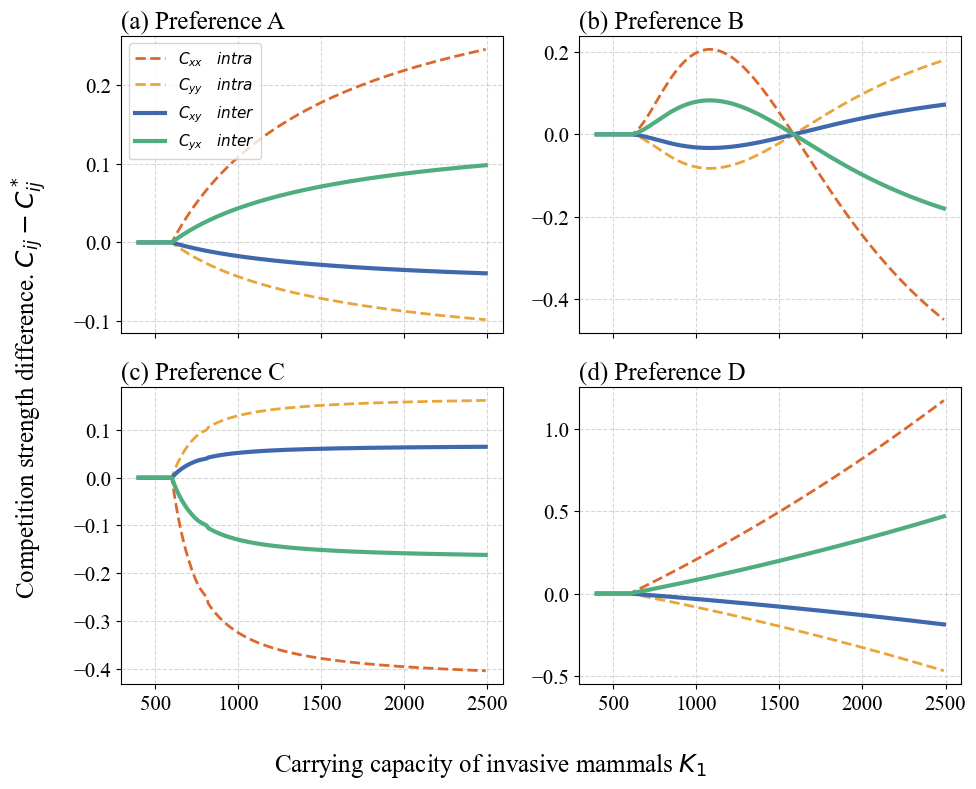

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

import pickle

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data

dt = 0.001
simu_time  = 25000          #simulation time each before and after the invasion.
cut_order = 8


out_lll_path = "output/Competition/"

diff_xx_kll  = pickle_load( out_lll_path+"diff_xx_kll" + ".pickle") 
diff_xy_kll = pickle_load( out_lll_path+"diff_xy_kll" + ".pickle")
diff_yx_kll = pickle_load( out_lll_path+"diff_yx_kll" + ".pickle")
diff_yy_kll = pickle_load(out_lll_path + "diff_yy_kll" +".pickle")
K1_l = pickle_load( out_lll_path  + "K1_l" + ".pickle")


fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(10, 8), sharex=True, sharey=False)
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1] 
ax_l= [ax1, ax2, ax3, ax4]


title_l = ["(a) Preference A", "(b) Preference B", "(c) Preference C", "(d) Preference D" ]
for j in range(4):
    ax_l[j].grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
    ax_l[j].set_title(title_l[j], loc="left")

    ax_l[j].plot(K1_l, diff_xx_kll[j],"#DB692E", 
                 K1_l, diff_yy_kll[j],"#E9A53A", linestyle="--", linewidth="2")
    ax_l[j].plot(K1_l, diff_xy_kll[j],"#4068AD", 
                 K1_l, diff_yx_kll[j],"#4FAD7E", linewidth="3")

ax_l[0].legend(["$C_{xx} \quad intra$", "$C_{yy} \quad intra$", "$C_{xy} \quad inter$", "$C_{yx} \quad inter$"], fontsize =11)

fig.supxlabel("Carrying capacity of invasive mammals $K_1$", fontsize="18")
fig.supylabel("Competition strength difference. $C_{ij} - C_{ij}^*$", fontsize="18")
# fig.legend(["$K_{1}$ = "+"{}".format(var)for var in reversed(K1_l)], bbox_to_anchor=(1.2, 1.0), fontsize="17")
plt.tight_layout()

plt.savefig(out_lll_path+"figCompe_separate_y.pdf", bbox_inches="tight")

plt.show()

Fig.3, 4 Fig.S12,  calculation Heatmap (y*-y)/y* X-axis K1/K2 Y-axis h

0it [00:00, ?it/s]

Competition coefficient between mammals 0.4 competition coefficient between dung beetles 0.975 time delay tau = 0
Before invasion x =  280 After invasion x= 1370 Before invasion y= 280 After invasion y= 0 Before invasion x+y 560 After invasion x+y 1370
functional response, Handling time is g11=1, g12=1, g21=1, g22=1


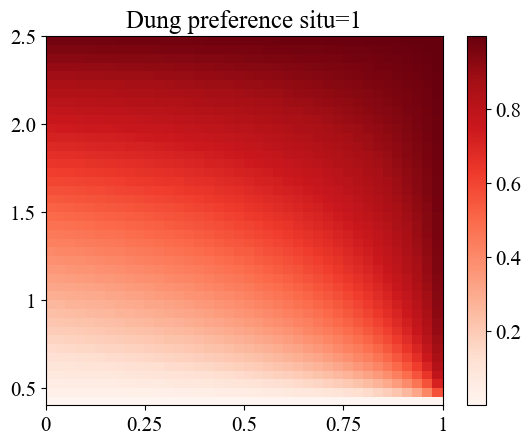

Competition coefficient between mammals 0.4 competition coefficient between dung beetles 0.975 time delay tau = 0
Before invasion x =  279 After invasion x= 1356 Before invasion y= 280 After invasion y= 14 Before invasion x+y 559 After invasion x+y 1370
functional response, Handling time is g11=10, g12=0.1, g21=0.1, g22=10


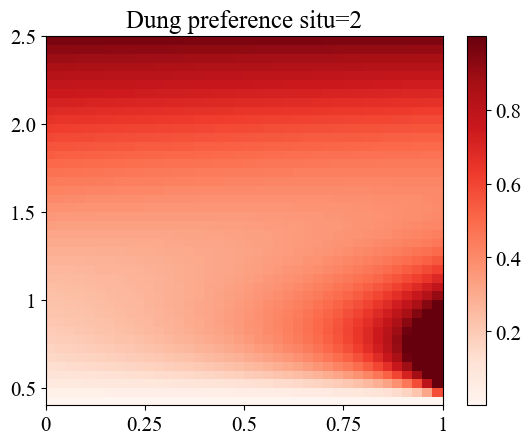

Competition coefficient between mammals 0.4 competition coefficient between dung beetles 0.975 time delay tau = 0
Before invasion x =  281 After invasion x= 1360 Before invasion y= 280 After invasion y= 10 Before invasion x+y 561 After invasion x+y 1370
functional response, Handling time is g11=3, g12=0.9, g21=0.9, g22=0.3


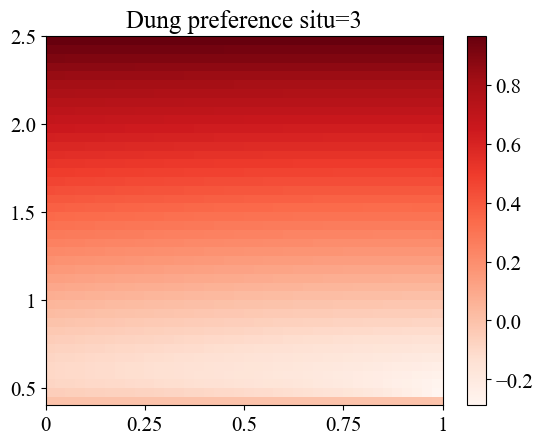

Competition coefficient between mammals 0.4 competition coefficient between dung beetles 0.975 time delay tau = 0
Before invasion x =  279 After invasion x= 1361 Before invasion y= 280 After invasion y= 0 Before invasion x+y 559 After invasion x+y 1361
functional response, Handling time is g11=0.3, g12=0.9, g21=0.9, g22=3


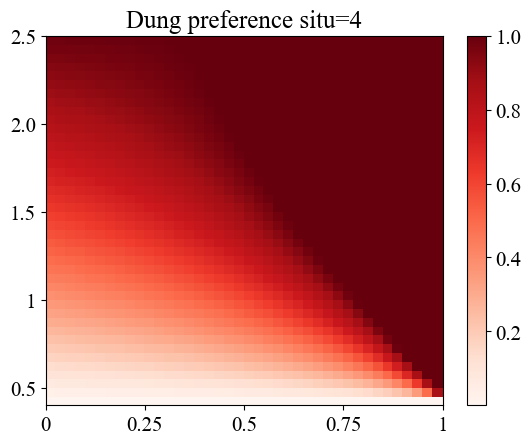

In [4]:



import os
import datetime
import time
dt_now_jst = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
t_start= time.time()

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

import pickle
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data
    
def append_list_b():
    #definitions of append parameters to the list
    t_oi.append(t)
    n2_l.append(n2)
    f2_l.append(f2)
    x_l.append(x)
    y_l.append(y)

def append_list_a():

    append_list_b()
    tinvasion.append(t)
    n1_l.append(n1)
    f1_l.append(f1)

def append_last_list():
    
    last_x.append(x)
    last_y.append(y)
    last_total.append(x+y)
    last_comp_xx_kl.append((F2*x)/(k*f2))
    last_comp_xy_kl.append((h*G2*y)/(k*f2))
    last_comp_yx_kl.append((h*F2*x)/(k*f2))
    last_comp_yy_kl.append((G2*y)/(k*f2))

from tqdm.notebook import tqdm
with tqdm() as pbar:
    y_diff_normalize_lll, x_diff_normalize_lll,total_diff_normalize_lll, h_lll = [], [], [], []
    comp_diff_xx_klll, comp_diff_xy_klll, comp_diff_yx_klll, comp_diff_yy_klll = [], [], [], []

    situ = 0
    g11_l = [1, 10, 3 , 0.3]
    g22_l = [1, 10, 0.3, 3]
    g12_l = [1, 0.1, 0.9, 0.9]
    g21_l = [1, 0.1, 0.9, 0.9]

    for g11, g22, g12, g21  in zip (g11_l, g22_l, g12_l, g21_l):
        situ += 1

        h_ll = []
        x_diff_normalize_ll, y_diff_normalize_ll, total_diff_normalize_ll = [], [], []
        comp_diff_xx_kll, comp_diff_xy_kll, comp_diff_yx_kll, comp_diff_yy_kll = [], [], [], []

        #K1 = 0
        K2 = 1000
        Kratio_l = []
        K1_step = 50
        K1_l = [K1_value for K1_value in range(400, 2500, K1_step)]
        #Changing K1
        for K1 in K1_l:
            x_fl, y_fl= [], []
            
            x_diff_normalize_l, y_diff_normalize_l, total_diff_normalize_l = [], [], []
            comp_diff_xx_kl, comp_diff_xy_kl, comp_diff_yx_kl, comp_diff_yy_kl = [], [], [], []

            h= 0
            h_step = 0.025
            h_l =[(h_value/1000) for h_value in range (0, 1000, int(h_step*1000))]
            #Changing h
            for h in h_l:

                t = 0               #Initial time
                a = 0.4             #competition coefficient between mammals
                n1 = 0              #Population size of invasive mammals before invasion
                n2 = 1000           #Population size of native mammals

                r1, r2 = 0.2, 0.1   #Intrinstic growth rate of mammals　sika>mammal　(number/hour)
                b1, b2 = 1, 1       #Defecation efficiency
                c1 , c2 = 0.8, 0.8   #Natural weathering ratio
                f2 = 1000            #Native mammal feces
                e1, e2 = 0.1, 0.1
                e_y = 0.2
                k = 1.0

                # g11 = g22 = g12 = g21 = 1
                g_y = 1
                T11 = T12 = T21 = T22 = 1
                T_y = 1
                
                x = y = 300 #initial population size of dung beetle

                t_oi, n2_l, f2_l, x_l, y_l = [t], [n2], [f2], [x],[y]
                last_x, last_y, last_total = [], [], []

                last_comp_xx_kl, last_comp_xy_kl, last_comp_yx_kl, last_comp_yy_kl = [], [], [], []

                dt = 0.001
                simu_time  = 25000          #simulation time each before and after the invasion.
                cut_order = 6
                simu_cut = 1.0 * 10**(-1*cut_order)
                TEND1 = int(simu_time/dt)   #simulation time divided by dt

                #Simulation Before invasion 
                for i in range(TEND1):
                    t += dt
                    n1 = 0

                    G2 =(g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]) 
                    F2 =(g22*f2_l[i]) / (1+ g22*T22*f2_l[i])
                
                    n2 += (r2*n2_l[i] * (1- (n2_l[i])/K2))*dt  
                    f1 = 0
                    f2 += (b2*n2_l[i] - c2*f2_l[i]- F2*x_l[i] - G2*y_l[i])*dt

                    x += (F2*e2*x_l[i] * (1- (F2*x_l[i] + h*G2*y_l[i]) / (k*f2_l[i])))*dt
                    y += (G2*e_y*y_l[i] * (1- (G2*y_l[i] + h*F2*x_l[i]) / (k*f2_l[i])))*dt

                    append_list_b()
                    if  i*dt > 100 and abs(y_l[int(-1/dt)-1]-y_l[-1]) < (simu_cut) and abs(x_l[int(-1/dt)-1]-x_l[-1]) < (simu_cut):
                        break

                append_last_list()


                n1 = 10             #Invasive mammal population size
                n1_negative = 10    #When (t - tau) is negative ,then n1 = n1_negative
                f1 = 1
                tau = 0            #Time-delay parameter
                TAU = int(tau/dt)

                TEND_B = int(t/dt)     #Before invasion simulations finished time divided by dt
                #After invasion simulation year
                TEND2 = int(TEND_B + (simu_time/dt))
                tinvasion, n1_l, f1_l = [t],[n1], [f1]

                #Simulation after mammal invasion
                for i in range(TEND_B, TEND2):
                    
                    # when (t-tau) is negative
                    if (i < TEND_B + TAU):
                        t = t + dt
                        j = i - TEND_B   #iteration after the invasion

                        n1 += (r1*n1_l[j] * (1- (n1_negative + a*n2_l[i])/K1 ))*dt
                        n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                        G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))
                        F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                        F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                        f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                        f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

                        x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                        y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

                        append_list_a()

                    # When (t-tau) is positive
                    elif (i >= TEND_B + TAU):
                        t = t + dt
                        j = i - TEND_B

                        n1 += (r1*n1_l[j] * (1- (n1_l[j - TAU] + a*n2_l[i])/K1 ))*dt
                        n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                        G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))
                        F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                        F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                        f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                        f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt
                        
                        x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                        y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

                        append_list_a()
                        if  j*dt > 100 and abs(y_l[int(-1/dt)-1]-y_l[-1]) < (simu_cut) and abs(x_l[int(-1/dt)-1]-x_l[-1]) < (simu_cut):
                            break


                x_fl.append(x)
                y_fl.append(y)

                append_last_list()

                comp_diff_xx_kl.append((last_comp_xx_kl[1]-last_comp_xx_kl[0]))
                comp_diff_xy_kl.append((last_comp_xy_kl[1]-last_comp_xy_kl[0]))
                comp_diff_yx_kl.append((last_comp_yx_kl[1]-last_comp_yx_kl[0]))
                comp_diff_yy_kl.append((last_comp_yy_kl[1]-last_comp_yy_kl[0]))

                x_diff_normalize_l.append((last_x[1]-last_x[0])/ last_x[0])
                y_diff_normalize_l.append((last_y[0]-last_y[1])/last_y[0])

                total_diff_normalize_l.append((last_total[1]-last_total[0])/last_total[0])

                #display parameters
                pbar.set_description(f"[situ = {situ}, K1 = {K1}, h = {h}]")


            Kratio_l.append(K1/K2)
            
            x_diff_normalize_ll.append(x_diff_normalize_l)
            y_diff_normalize_ll.append(y_diff_normalize_l)
            total_diff_normalize_ll.append(total_diff_normalize_l)
            h_ll.append(h_l)

            comp_diff_xx_kll.append(comp_diff_xx_kl)
            comp_diff_xy_kll.append(comp_diff_xy_kl)
            comp_diff_yx_kll.append(comp_diff_yx_kl)
            comp_diff_yy_kll.append(comp_diff_yy_kl)


            pbar.update(1)

        print("Competition coefficient between mammals", a, "competition coefficient between dung beetles", h,"time delay tau =",tau)
        print("Before invasion x = ",round(last_x[0]),"After invasion x=",round(last_x[1]),"Before invasion y=",round(last_y[0]),"After invasion y=",round(last_y[1]),"Before invasion x+y",round(last_total[0]),"After invasion x+y",round(last_total[1]))
        print("functional response, Handling time is g11={}, g12={}, g21={}, g22={}".format(g11,g12,g21,g22))

        #drow heatmap
        plt.figure()
        plt.pcolor(y_diff_normalize_ll, cmap="Reds")
        plt.title("Dung preference situ={}".format(situ))
        plt.xticks([0, 10, 20, 30, 40], [0 , 0.25, 0.5, 0.75, 1])
        plt.yticks([2 ,12, 22, 32, 42], [0.5, 1, 1.5, 2.0, 2.5])
        plt.colorbar()
        plt.show()

        x_diff_normalize_lll.append(x_diff_normalize_ll)        
        y_diff_normalize_lll.append(y_diff_normalize_ll)
        total_diff_normalize_lll.append(total_diff_normalize_ll)
        h_lll.append(h_ll)


        comp_diff_xx_klll.append(comp_diff_xx_kll)
        comp_diff_xy_klll.append(comp_diff_xy_kll)
        comp_diff_yx_klll.append(comp_diff_yx_kll)
        comp_diff_yy_klll.append(comp_diff_yy_kll)


#save parameters as pickle files
out_lll_path = f"output/HeatMap/xy,dt={dt},simu_time={simu_time},simu_cut={cut_order}/"
os.makedirs(out_lll_path, exist_ok =True)
pickle_l = [x_diff_normalize_lll, y_diff_normalize_lll, total_diff_normalize_lll, h_lll, comp_diff_xx_klll, comp_diff_xy_klll, comp_diff_yx_klll, comp_diff_yy_klll]
pickle_name_l = ["x_diff_normalize_lll", "y_diff_normalize_lll", "total_diff_normalize_lll", "h_lll", "comp_diff_xx_klll", "comp_diff_xy_klll", "comp_diff_yx_klll", "comp_diff_yy_klll"]
out_name_l = [out_lll_path + "{}.pickle".format(name) for name in pickle_name_l]
#Save results as .pickle
for i, j in zip(pickle_l, out_name_l):
    pickle_dump(i, j)


t_end = time.time()
elapsed_time = t_end - t_start
path = out_lll_path + 'erapsed_time.txt'
f = open(path, 'w')
f.write(f"Calculation start {dt_now_jst}, Calculation time、{elapsed_time}s")  
f.close()


C:\Users\r-aka\AppData\Local\Temp\ipykernel_69176\4020665721.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(out_lll_path+"yHeatmap.pdf", bbox_inches="tight")


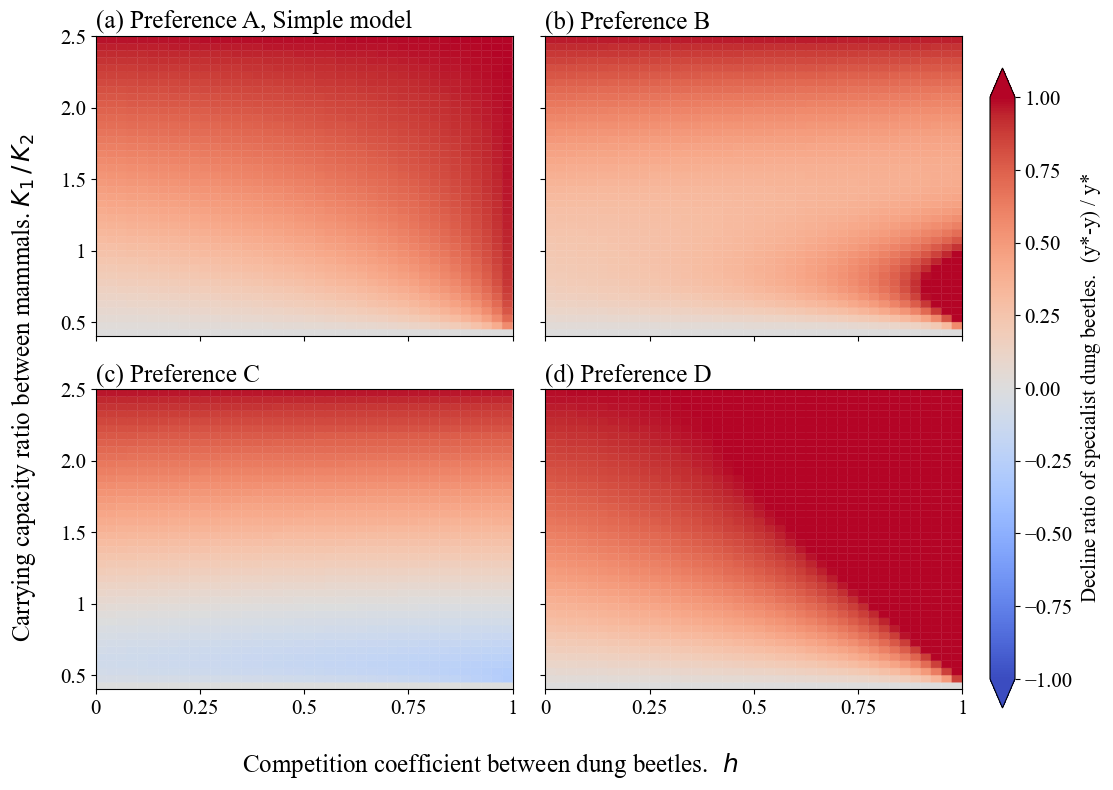

C:\Users\r-aka\AppData\Local\Temp\ipykernel_69176\4020665721.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(out_lll_path+"xHeatmap.pdf", bbox_inches="tight")


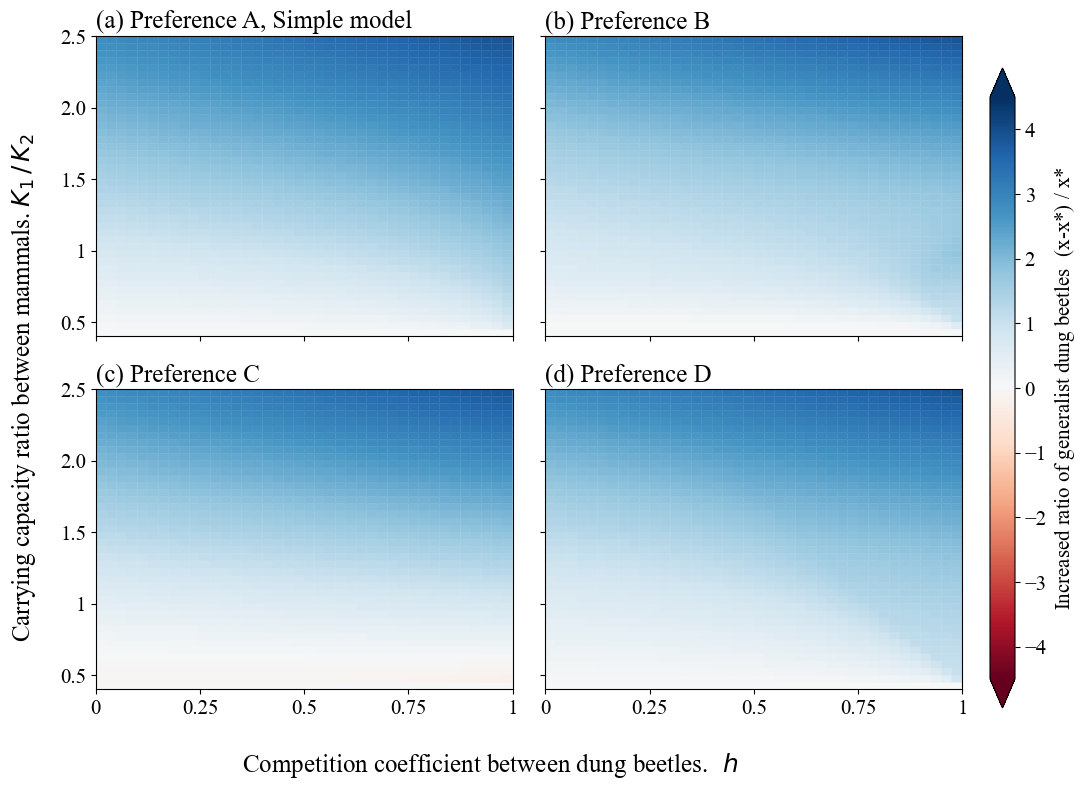

C:\Users\r-aka\AppData\Local\Temp\ipykernel_69176\4020665721.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(out_lll_path+"totalHeatmap.pdf", bbox_inches="tight")


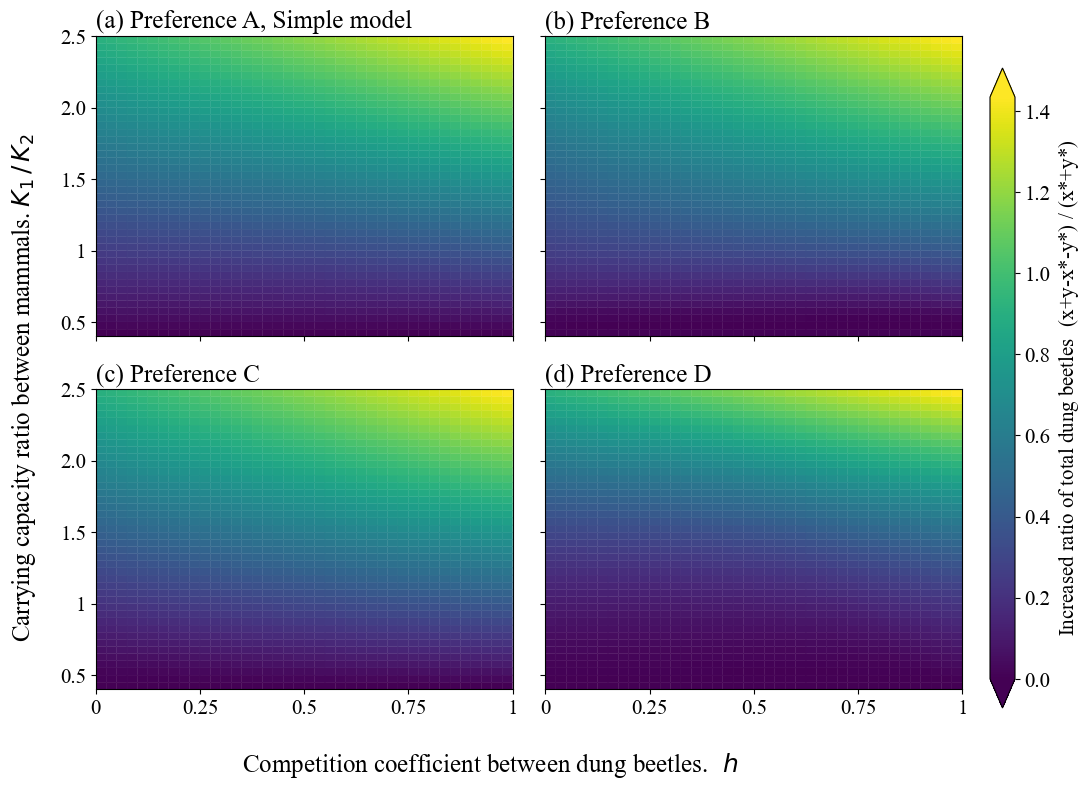

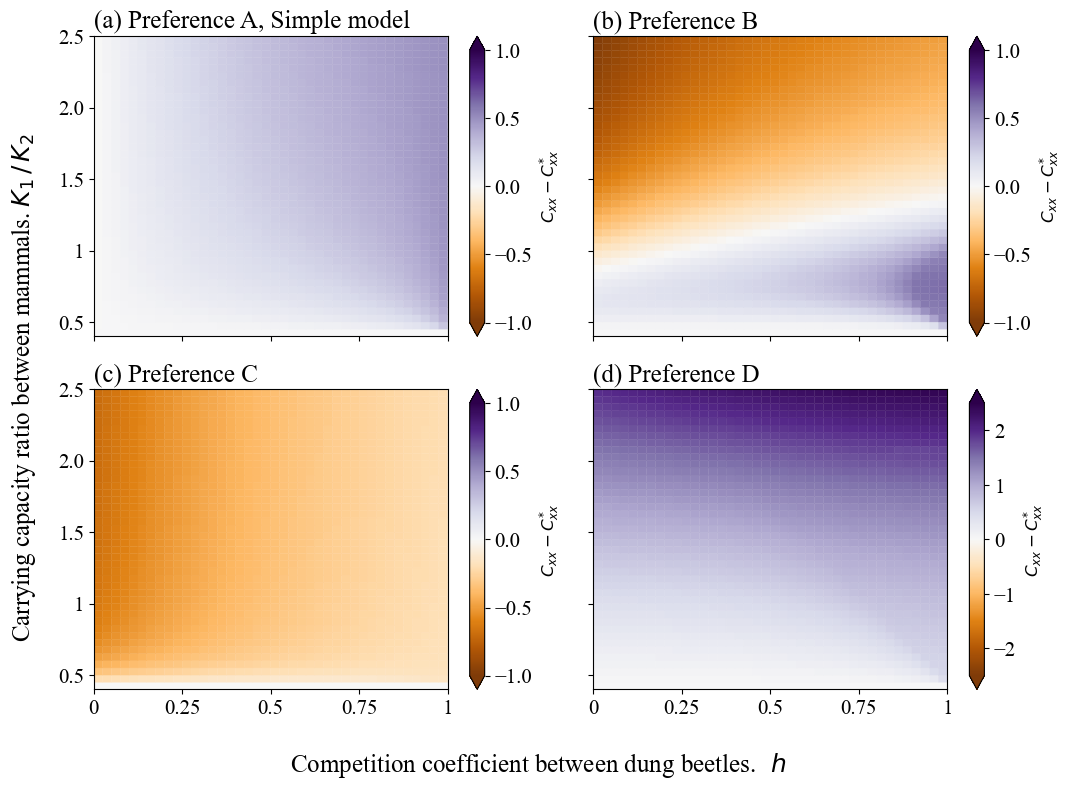

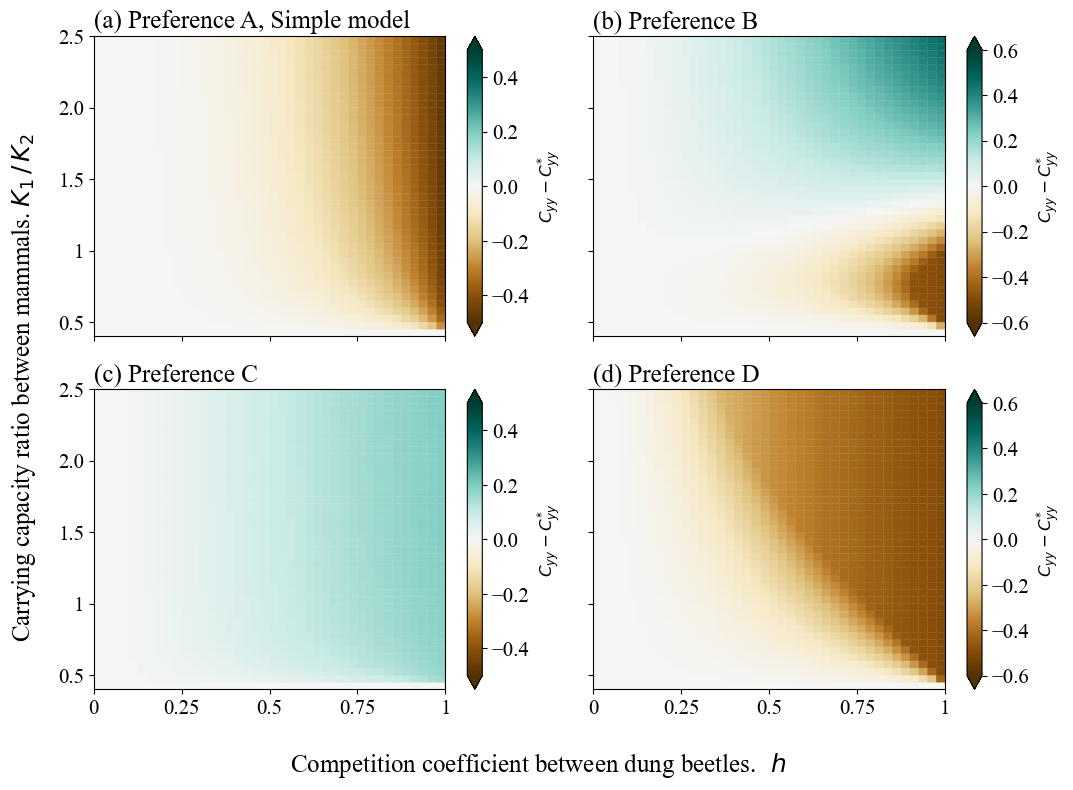

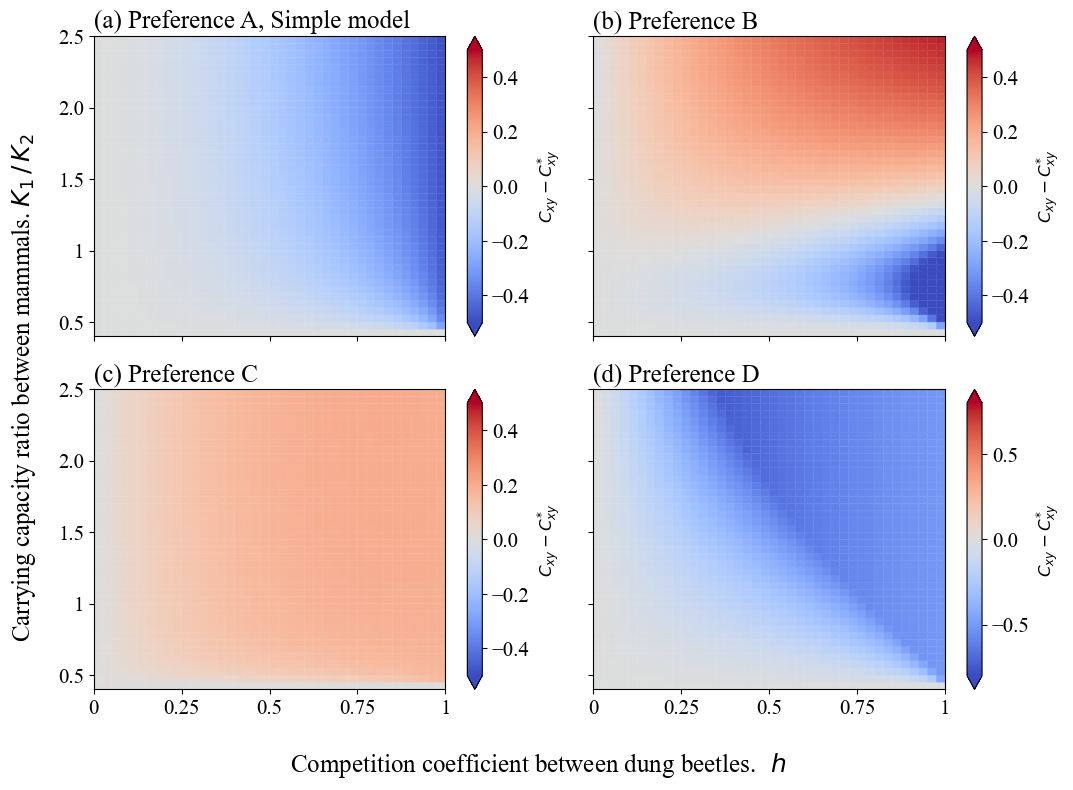

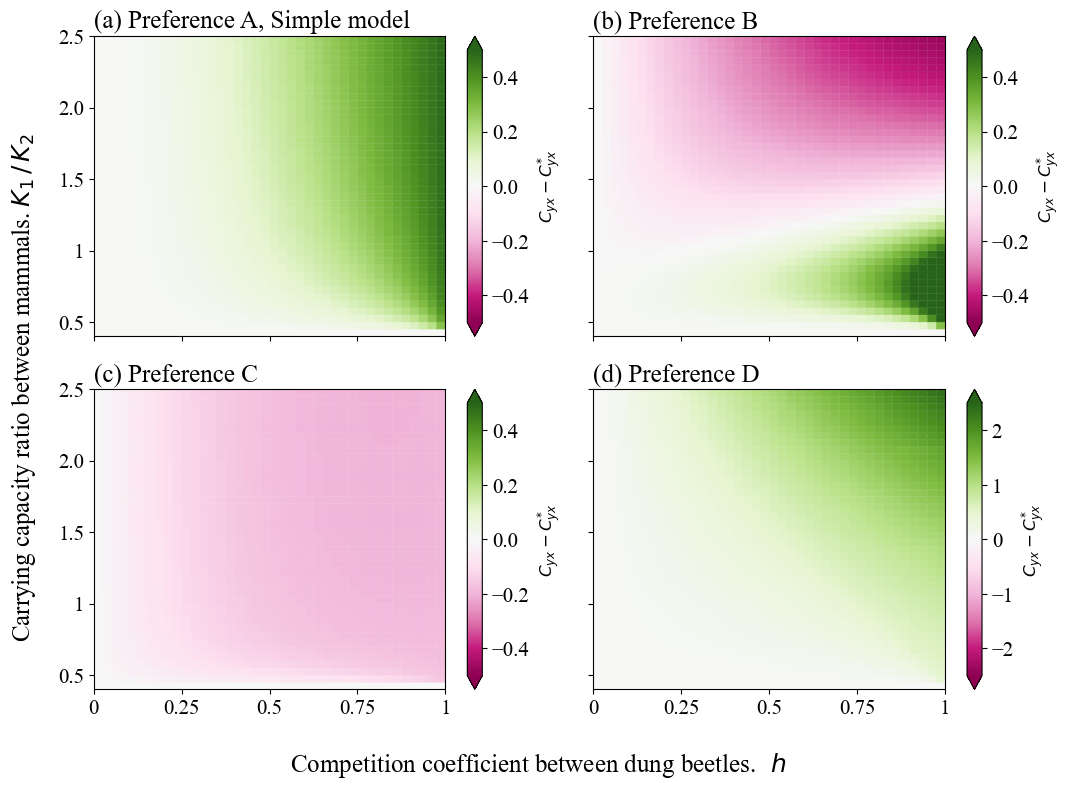

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15
# plt.rcParams['figure.dpi'] = 600
import matplotlib.colors as colors

import pickle

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data

def set_iroiro():

    plt.xticks([0, 10, 20, 30, 40], [0 , 0.25, 0.5, 0.75, 1])
    plt.yticks([2 ,12, 22, 32, 42], [0.5, 1, 1.5, 2.0, 2.5])
    fig.supxlabel("Competition coefficient between dung beetles. $ \\ h$")
    fig.supylabel("Carrying capacity ratio between mammals. $K_{1} \, / \, K_{2}$")

dt = 0.001
simu_time  = 25000          #simulation time each before and after the invasion.
cut_order = 6

out_lll_path = f"output/HeatMap/xy,dt={dt},simu_time={simu_time},simu_cut={cut_order}/"
y_diff_normalize_lll = pickle_load( out_lll_path+"y_diff_normalize_lll.pickle")
x_diff_normalize_lll = pickle_load( out_lll_path+"x_diff_normalize_lll.pickle")
total_diff_normalize_lll = pickle_load( out_lll_path+"total_diff_normalize_lll.pickle")


comp_diff_xx_klll = pickle_load( out_lll_path+"comp_diff_xx_klll" + ".pickle") 
comp_diff_yy_klll = pickle_load( out_lll_path+"comp_diff_xy_klll" + ".pickle")
comp_diff_yx_klll = pickle_load( out_lll_path+"comp_diff_yx_klll" + ".pickle")
comp_diff_xy_klll = pickle_load(out_lll_path + "comp_diff_yy_klll" +".pickle")

K1_step = 50
K1_l = [K1_value for K1_value in range(250, 2500, K1_step)]
h_step = 0.025
h_l =[(h_value/1000) for h_value in range (0, 1000, int(h_step*1000))]

title_l = ["(a) Preference A, Simple model", "(b) Preference B", "(c) Preference C", "(d) Preference D" ]


#Decline ratio of y
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(10, 8), sharex=True, sharey="all")
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1] 
ax_l= [ax1, ax2, ax3, ax4]

for i in [0, 1, 2 ,3]:
    ax_l[i].set_title(title_l[i], loc="left")

    im = ax_l[i].pcolor(y_diff_normalize_lll[i],cmap='coolwarm',vmin=-1.0,vmax=1.0, edgecolors='face')     
# fig.suptitle("Decline ratio of specialist dung beetles")
set_iroiro()

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([1, 0.1, 0.025, 0.8])
fig.colorbar(im, cax=cax, extend='both',orientation='vertical', label="Decline ratio of specialist dung beetles. $\, \, $(y*-y) / y*")
plt.savefig(out_lll_path+"yHeatmap.pdf", bbox_inches="tight")
plt.show()



#Increased ratio of x
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(10, 8), sharex=True, sharey="all")
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1] 
ax_l= [ax1, ax2, ax3, ax4]

for i in [0, 1, 2 ,3]:
    ax_l[i].set_title(title_l[i], loc="left")

    im = ax_l[i].pcolor(x_diff_normalize_lll[i],cmap='RdBu',
                        vmin=-4.5,vmax=4.5, edgecolors='face')     
# fig.suptitle("Increased ratio of generalist dung beetles")
set_iroiro()
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([1, 0.1, 0.025, 0.8])
fig.colorbar(im, cax=cax, extend='both',orientation='vertical', label="Increased ratio of generalist dung beetles $\, \, $(x-x*) / x*")
plt.savefig(out_lll_path+"xHeatmap.pdf", bbox_inches="tight")
plt.show()

#Increased ratio of total
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(10, 8), sharex=True, sharey="all")
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1] 
ax_l= [ax1, ax2, ax3, ax4]

for i in [0, 1, 2 ,3]:
    ax_l[i].set_title(title_l[i], loc="left")

    im = ax_l[i].pcolor(total_diff_normalize_lll[i],#cmap='RdBu',
                        # vmin=-1.5,vmax=1.5, 
                        edgecolors='face')     
# fig.suptitle("Increased ratio of total dung beetles")
set_iroiro()
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([1, 0.1, 0.025, 0.8])
fig.colorbar(im, cax=cax, extend='both',orientation='vertical', label="Increased ratio of total dung beetles$\, \, $ (x+y-x*-y*) / (x*+y*)")
plt.savefig(out_lll_path+"totalHeatmap.pdf", bbox_inches="tight")
plt.show()



#figxx
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(11, 8), sharex=True, sharey="all")
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1] 
ax_l= [ax1, ax2, ax3, ax4]

for i in [0, 1,2 ,3]:

    if i ==3:
        im = ax_l[i].pcolor(comp_diff_xx_klll[i], cmap="PuOr", vmin=-2.5,vmax=2.5, edgecolors='face')
    else: 
        im = ax_l[i].pcolor(comp_diff_xx_klll[i], cmap="PuOr", vmin=-1.0,vmax=1.0, edgecolors='face')
    
    fig.colorbar(im, extend='both',orientation='vertical').set_label("$C_{xx}-C_{xx}^{*}$", size=12)
    ax_l[i].set_title(title_l[i], loc="left")
    # im=plt.pcolor(comp_diff_yx_klll[i],cmap='PiYG',vmin=-2,vmax=2)     
    # plt.colorbar(im,extend='both',orientation='vertical', label="$C_{yx}-C_{yx}^{*}$")
# fig.colorbar(im, extend='both',orientation='vertical', label="$C_{yx}-C_{yx}^{*}$")
# fig.suptitle("The difference of generalists intraspecific competition strength.")
set_iroiro()
plt.savefig(out_lll_path+"Comp_xxHeatmap.pdf", bbox_inches="tight")
plt.show()



#figyy
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(11, 8), sharex=True, sharey="all")
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1] 
ax_l= [ax1, ax2, ax3, ax4]

for i in [0, 1,2 ,3]:


    if i ==1 or i==3:
        im = ax_l[i].pcolor(comp_diff_yy_klll[i], cmap="BrBG", vmin=-0.6,vmax=0.6, edgecolors='face')

    else: 
        im = ax_l[i].pcolor(comp_diff_yy_klll[i], cmap="BrBG", vmin=-0.5,vmax=0.5, edgecolors='face')
    fig.colorbar(im, extend='both',orientation='vertical').set_label("$C_{yy}-C_{yy}^{*}$", size=12)
    ax_l[i].set_title(title_l[i], loc="left")

    # im=plt.pcolor(comp_diff_yx_klll[i],cmap='PiYG',vmin=-2,vmax=2)     
    # plt.colorbar(im,extend='both',orientation='vertical', label="$C_{yx}-C_{yx}^{*}$")
# fig.colorbar(im, extend='both',orientation='vertical', label="$C_{yx}-C_{yx}^{*}$")
# fig.suptitle("The difference of specialists intraspecific competition strength.")
set_iroiro()
plt.savefig(out_lll_path+"Comp_yyHeatmap.pdf", bbox_inches="tight")
plt.show()



#figxy
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(11, 8), sharex=True, sharey="all")
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1] 
ax_l= [ax1, ax2, ax3, ax4]


for i in [0, 1,2 ,3]:

    if i ==3:
        im = ax_l[i].pcolor(comp_diff_xy_klll[i], cmap="coolwarm", 
                            vmin=-0.8,vmax=0.8, 
                            edgecolors='face')
    else: 
        im = ax_l[i].pcolor(comp_diff_xy_klll[i], cmap="coolwarm", vmin=-0.5,vmax=0.5, edgecolors='face')

    fig.colorbar(im, extend='both',orientation='vertical').set_label("$C_{xy}-C_{xy}^{*}$", size=12)
    ax_l[i].set_title(title_l[i], loc="left")
    # im=plt.pcolor(comp_diff_yx_klll[i],cmap='PiYG',vmin=-2,vmax=2)     
    # plt.colorbar(im,extend='both',orientation='vertical', label="$C_{yx}-C_{yx}^{*}$")
# fig.colorbar(im, extend='both',orientation='vertical', label="$C_{yx}-C_{yx}^{*}$")

# fig.suptitle("The difference of interspecific competition strength to generalists.")
set_iroiro()
plt.savefig(out_lll_path+"Comp_xyHeatmap.pdf", bbox_inches="tight")
plt.show()



#figyx
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(11, 8), sharex=True, sharey="all")
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1] 
ax_l= [ax1, ax2, ax3, ax4]


for i in [0, 1,2 ,3]:

    if i ==3:
        im = ax_l[i].pcolor(comp_diff_yx_klll[i], cmap="PiYG", vmin=-2.5,vmax=2.5, edgecolors='face')
    else: 
        im = ax_l[i].pcolor(comp_diff_yx_klll[i], cmap="PiYG", vmin=-0.5,vmax=0.5, edgecolors='face')

    fig.colorbar(im, extend='both',orientation='vertical').set_label("$C_{yx}-C_{yx}^{*}$", size=12)
    ax_l[i].set_title(title_l[i], loc="left")
    # im=plt.pcolor(comp_diff_yx_klll[i],cmap='PiYG',vmin=-2,vmax=2)     
    # plt.colorbar(im,extend='both',orientation='vertical', label="$C_{yx}-C_{yx}^{*}$")

set_iroiro()
plt.savefig(out_lll_path+"Comp_yxHeatmap.pdf", bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# c = ax.imshow([y_diff_normalize_ll], aspect='auto', interpolation='none')
def set_iroiro():

    plt.xticks([0, 10, 20, 30, 40], [0 , 0.25, 0.5, 0.75, 1])
    plt.yticks([5 ,15, 25, 35, 45], [0.5, 1, 1.5, 2.0, 2.5])
    fig.supxlabel("Competition coefficient between dung beetles. $ \\ h$")
    fig.supylabel("Carrying capacity ratio between mammals. $K_{1} \, / \, K_{2}$")

fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(10, 8), sharex=True, sharey="all")
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1] 
ax_l= [ax1, ax2, ax3, ax4]


for i in [0, 1, 2 ,3]:
    ax_l[i].set_title(title_l[i], loc="left")

    im = ax_l[i].imshow(y_diff_normalize_lll[i], cmap='coolwarm', vmin=-1.0,vmax=1.0,aspect='auto', interpolation='none', origin='lower')     
fig.suptitle("Decline ratio of specialist dung beetles")
set_iroiro()

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([1, 0.1, 0.025, 0.8])
fig.colorbar(im, cax=cax, extend='both',orientation='vertical', label="(y*-y) / y*")
plt.savefig(out_lll_path+"imshow_yHeatmap.pdf", bbox_inches="tight")
plt.show()

#tau simulation basic parameters set

t = 0               #Initial time
a = 0.4             #competition coefficient between mammals
n1 = 0              #Population size of invasive mammals before invasion
n2 = 1000           #Population size of native mammals

r1, r2 = 0.2, 0.1   #Intrinstic growth rate of mammals　sika>mammal　(number/hour)
b1, b2 = 1, 1   #Defecation efficiency
c1 , c2 = 0.8, 0.8   #Natural weathering ratio
f2 = 1000            #Native mammal feces

e1, e2 = 0.1, 0.1
e_y = 0.2
k = 1.0

g11 = g22 = 1
g12 = g21 = 1
g_y = 1
T11 = T12 = T21 =T22 = 1
T_y = 1

cut_off = 1

#Initial number of dung beetles
x = y = 600

dt = 0.005
dt=1

tEnd1 = 5000

            n1 = 10             #Invasive mammal deintisty
            n1_negative = 10    #Invasive mammal deintisty effect population size when t-tau is negative
            f1 = 1

0it [00:00, ?it/s]

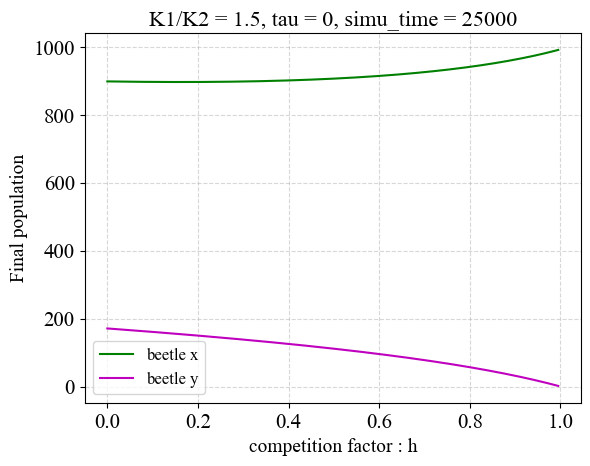

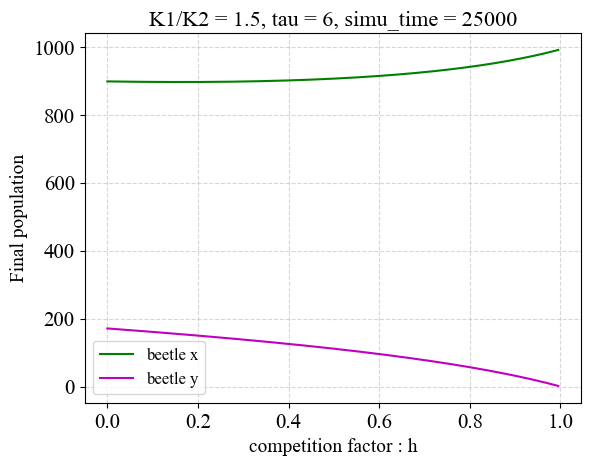

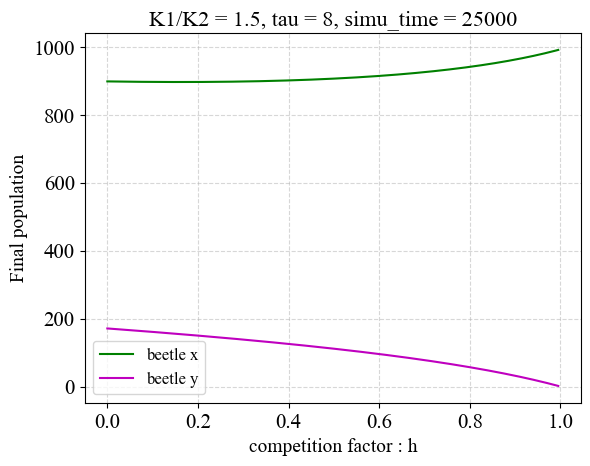

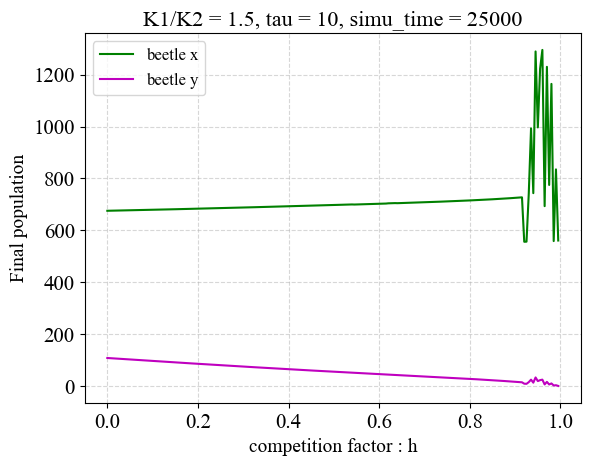

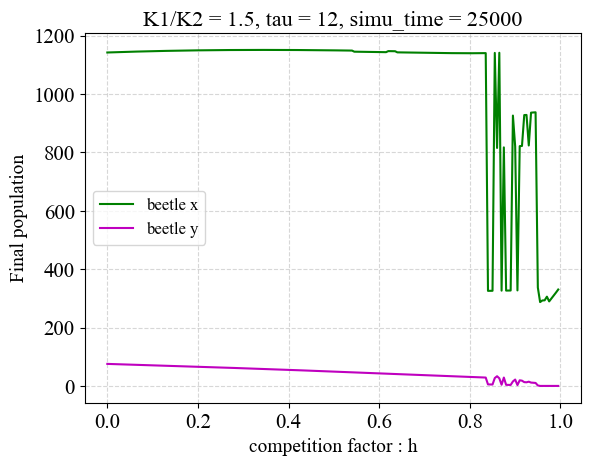

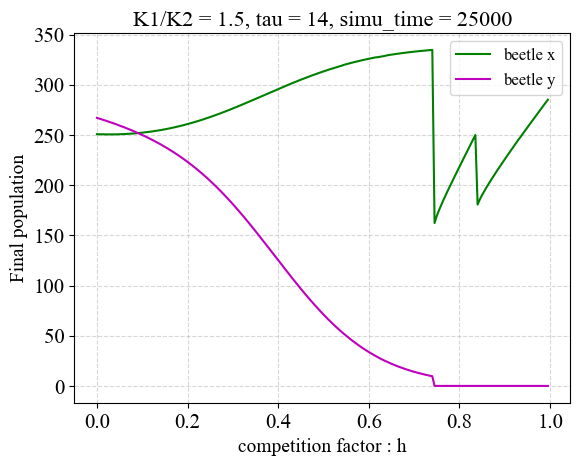

Simulation time =  25000
Competition coefficient between mammals 0.4 competition coefficient between dung beetles 1.0000000000000007
time delay tau = 14
Before invasion x =  279 After invasion x= 285 Before invasion y= 279 After invasion y= 0 Before invasion x+y 557 After invasion x+y 285
functional response, attack ratio g11=1, g12=1, g21=1, g22=1


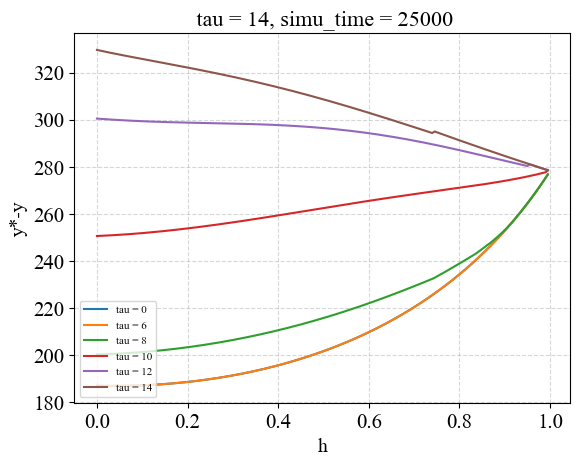

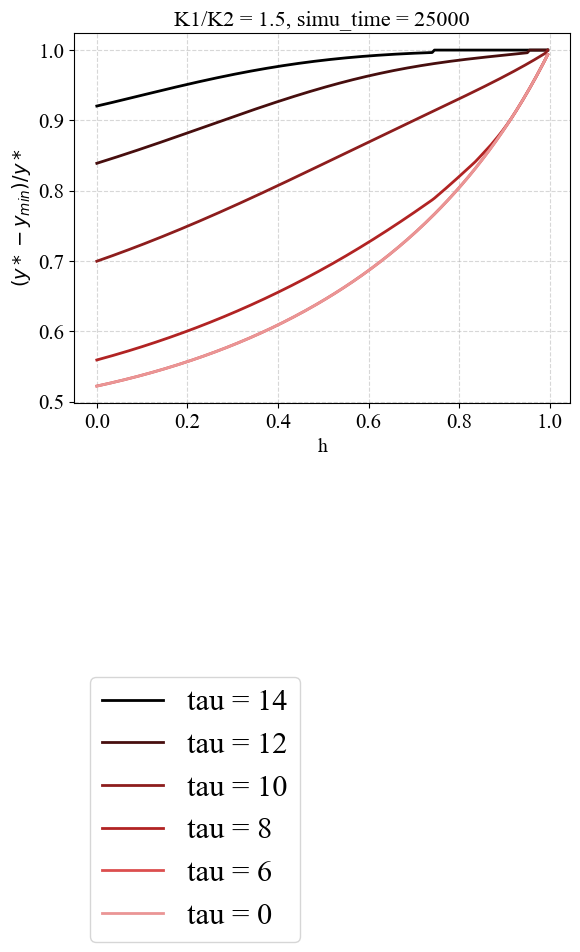

In [5]:
#Time-lag


import os
import datetime
import time
dt_now_jst = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
t_start= time.time()

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("output/Changingtau.pdf")
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

import pickle
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data
    
def append_list_b():
    #definitions of append parameters to the list
    t_oi.append(t)
    n2_l.append(n2)
    f2_l.append(f2)
    x_l.append(x)
    y_l.append(y)

def append_list_a():

    append_list_b()
    tinvasion.append(t)
    n1_l.append(n1)
    f1_l.append(f1)

from tqdm.notebook import tqdm
with tqdm() as pbar:

    K1 = 1500
    K2 = 1000
    Kratio_l = []

    y_diff_ll, y_diff_normalize_ll = [], []
    h_ll = []
    break_count = 0

    tau_l = [0, 6, 8, 10, 12, 14]
    #changing tau 
    for tau in tau_l:


        h_l =[]
        x_fl, y_fl= [], []

        y_diff_l, y_diff_normalize_l = [], []

        h= 0
        
        #varying competition coefficient between dung beetles
        while(h<=1.0):

            t = 0               #Initial time
            a = 0.4             #competition coefficient between mammals
            n1 = 0              #Population size of invasive mammals before invasion
            n2 = 1000           #Population size of native mammals

            r1, r2 = 0.2, 0.1   #Intrinstic growth rate of mammals　sika>mammal　(number/hour)
            b1, b2 = 1, 1   #Defecation efficiency
            c1 , c2 = 0.8, 0.8   #Natural weathering ratio
            f2 = 1000            #Native mammal feces
            
            e1, e2 = 0.1, 0.1
            e_y = 0.2
            k = 1.0

            g11 = g22 = 1
            g12 = g21 = 1
            g_y = 1
            T11 = T12 = T21 =T22 = 1
            T_y = 1

            cut_off = 1

            #Initial number of dung beetles
            x = y = 300

            t_oi, n2_l, f2_l, x_l, y_l = [t], [n2], [f2], [x],[y]
            last_x, last_y, last_total = [], [], []
            

            dt = 0.001
            simu_time  = 25000          #simulation time each before and after the invasion.
            cut_order = 6
            simu_cut = 1.0 * 10**(-1*cut_order)
            TEND1 = int(simu_time/dt)  

            #Simulation Before invasion 
            for i in range(TEND1):
                t += dt
                n1 = 0

                F2 =(g22*f2_l[i]) / (1+ g22*T22*f2_l[i])
                G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))
            
                n2 += (r2*n2_l[i] * (1- (n2_l[i])/K2))*dt  
                f1 = 0
                f2 += (b2*n2_l[i] - c2*f2_l[i]- F2*x_l[i] - G2*y_l[i])*dt

                x += (F2*e2*x_l[i] * (1- (F2*x_l[i] + h*G2*y_l[i]) / (k*f2_l[i])))*dt
                y += (G2*e_y*y_l[i] * (1- (G2*y_l[i] + h*F2*x_l[i]) / (k*f2_l[i])))*dt

                append_list_b()

                if  i*dt > 100 and abs(y_l[int(-1/dt)-1]-y_l[-1]) < (simu_cut) and abs(x_l[int(-1/dt)-1]-x_l[-1]) < (simu_cut):
                    break

            last_x.append(x)
            last_y.append(y)
            last_total.append(x+y)

            n1 = 10             #Invasive mammal deintisty
            n1_negative = 10    #Invasive mammal deintisty effect population size when t-tau is negative
            f1 = 1
            TAU = int(tau/dt)

            #After invasion simulation year
            TEND_B = int(t/dt)
            simu_time_A = 25000
            TEND2 = int(TEND_B + (simu_time_A/dt))
            tinvasion, n1_l, f1_l = [t],[n1], [f1]
            #Simulation after mammal invasion

            #Simulation after mammal invasion
            for i in range(TEND_B, TEND2):
                
                #when t - tau negative
                if (i < TEND_B + TAU):
                    j = i - TEND_B   #iteration number
                    t = t + dt
                    n1 = n1 + (r1*n1_l[j] * (1- (n1_negative + a*n2_l[i])/K1 ))*dt
                    n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                    G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

                    F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                    F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                    f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                    f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

                    x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                    y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

                    if n1 < cut_off:
                        n1 = 0
                    if n2 < cut_off:
                        n2 = 0
                    if x < cut_off:
                        x= 0
                        append_list_a()
                        break
                    if y < cut_off:
                        y= 0
                        append_list_a()
                        break     

                    append_list_a()
                
                elif (i >= TEND_B + TAU):
                    t = t + dt
                    j = i - TEND_B
                    
                    

                    n1 = n1 + (r1*n1_l[j] * (1- (n1_l[j - TAU] + a*n2_l[i])/K1 ))*dt
                    
                    n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                    Pf1 = f1_l[j] / (f1_l[j] + f2_l[i])
                    Pf2 = f2_l[i] / (f1_l[j] + f2_l[i])

                    G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

                    F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                    F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                    f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                    f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

                    
                    x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                    y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt


                    if n1 < cut_off:
                        n1 = 0
                    if n2 < cut_off:
                        n2 = 0
                    if x < cut_off:
                        x= 0
                        append_list_a()
                        break
                    if y < cut_off:
                        y= 0
                        append_list_a()
                        break  

                    append_list_a()

                    x_diff, y_diff=abs(x_l[int(-1/dt)-1]-x_l[-1]), abs(y_l[int(-1/dt)-1]-y_l[-1])
                    if  j*dt > 100 and y_diff < (simu_cut) and x_diff < (simu_cut):
                        break                    
        
                    #After invasionif same as 500 years before stop calculation
                    if j*dt>1000 and (j*dt) % 500 == 0 :
                        y_min1 = y_l.index(min(y_l[TEND_B:]))
                        y_min2 = y_l.index(min(y_l[TEND_B:int(-500/dt)]))
                        if y_min1 == y_min2:
                            break

        
            h_l.append(h)
            x_fl.append(x)
            y_fl.append(y)

            last_x.append(x)
            last_y.append(y)
            last_total.append(x+y)
            y_min = min(y_l[TEND_B:])

            
            y_diff_l.append(last_y[0] - y_min)
            y_diff_normalize_l.append((last_y[0]-y_min)/ last_y[0])

            h += 0.005
            pbar.set_description(f"[tau = {tau}, h = {h}]")


        plt.figure()
        plt.plot(h_l, x_fl, 'g', h_l, y_fl, 'm')
        plt.grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
        plt.legend(["beetle x", "beetle y"],  fontsize="12")
        plt.title("K1/K2 = {}, tau = {}, simu_time = {}".format(K1/K2, tau, simu_time), fontsize="16")
        plt.xlabel("competition factor : h", fontsize="14")
        plt.ylabel("Final population", fontsize="14")
        # show figures
        plt.show()

        Kratio_l.append(K1/K2)

        y_diff_ll.append(y_diff_l)
        y_diff_normalize_ll.append(y_diff_normalize_l)
        h_ll.append(h_l)

        pbar.update(1)

print("Simulation time = ", simu_time)
print("Competition coefficient between mammals", a, "competition coefficient between dung beetles", h)
print("time delay tau =",tau)
print("Before invasion x = ",round(last_x[0]),"After invasion x=",round(last_x[1]),"Before invasion y=",round(last_y[0]),"After invasion y=",round(last_y[1]),"Before invasion x+y",round(last_total[0]),"After invasion x+y",round(last_total[1]))
print("functional response, attack ratio g11={}, g12={}, g21={}, g22={}".format(g11,g12,g21,g22))

plt.figure()
for i in range(len(y_diff_ll)):
    plt.plot(h_ll[i], y_diff_ll[i])
plt.grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
plt.legend(["tau = {}".format(var)for var in tau_l],loc="lower left", fontsize="8")
plt.title(" tau = {}, simu_time = {}".format( tau, simu_time), fontsize="16")
plt.xlabel("h", fontsize="14")
plt.ylabel("y*-y", fontsize="14")
pdf.savefig()
plt.show()

color_l = ["black", "#470e0e","#8d1d1d", "#b12323", "#dc4e4e","#ea9595" ]
plt.figure()
nagasa = len(y_diff_normalize_ll)
for i in range(nagasa):
    plt.plot(h_ll[nagasa-1-i], y_diff_normalize_ll[nagasa-1-i], linewidth="2", c = color_l[i])
plt.legend(["tau = {}".format(var)for var in reversed(tau_l)], loc="lower left", fontsize="22",bbox_to_anchor=(0, -1.5))
plt.title("K1/K2 = {}, simu_time = {}".format( K1/K2, simu_time), fontsize="16")
plt.grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
plt.xlabel("h", fontsize="14")
plt.ylabel("$(y*-y_{min}) / y*$", fontsize="14")
pdf.savefig()
plt.show()

#save calcuration result as pickle
outputpath = f"output/Changingtau/xy,dt={dt},cut_off={cut_off},simu_time_A={simu_time_A}/"
os.makedirs(outputpath, exist_ok =True)
pickle_l = [y_diff_ll, y_diff_normalize_ll, h_ll]
pickle_name_l = ["y_diff_ll", "y_diff_normalize_ll", "h_ll"]
out_name_l = [outputpath + "{}.pickle".format(name) for name in pickle_name_l]
#Save results as .pickle
for i, j in zip(pickle_l, out_name_l):
    pickle_dump(i, j)

pdf.close()

t_end = time.time()
elapsed_time = t_end - t_start
path = outputpath+'erapsed_time.txt'
f = open(path, 'w')
f.write(f"Calculation start{dt_now_jst}, Calculation time{elapsed_time}s")  
f.close()


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (9, 5.5)

import pickle

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data

dt = 0.001
simu_time_A = 25000
cut_off = 1

outputpath = f"output/Changingtau/xy,dt={dt},cut_off={cut_off},simu_time_A={simu_time_A}/"

tau_l = [0, 6, 8, 10, 12, 14]


color_l = ["black", "#470e0e","#8d1d1d", "#b12323", "#dc4e4e","#ea9595" ]
plt.figure()
nagasa = len(y_diff_normalize_ll)
for i in range(nagasa):
    plt.plot(h_ll[nagasa-1-i], y_diff_normalize_ll[nagasa-1-i], linewidth="2", c = color_l[i])
plt.legend([r"$\tau= ${}".format(var)for var in reversed(tau_l)], bbox_to_anchor=(1.1, 1.0), fontsize="17")
plt.grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
plt.xlabel("Dung beetle competition factor h", fontsize="15")
plt.ylabel(" (y*-$y_{min}$) / y*", fontsize="15")
plt.tight_layout()
# plt.savefig("output/Changingtau/fig3.pdf",bbox_inches="tight")
plt.show()

In [ ]:
import os
import datetime
import time
dt_now_jst = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
t_start= time.time()


t_end = time.time()
elapsed_time = t_end - t_start
path = f'output/Changingtau/erapsed_time_test.txt'
f = open(path, 'w')
f.write(f"Calculation start{dt_now_jst}, Calculation time{elapsed_time}")  
f.close()

Fig5 calculation cut_off= 0.1

0it [00:00, ?it/s]

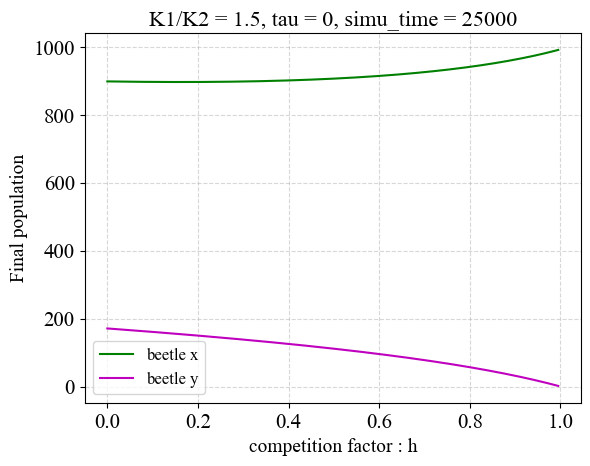

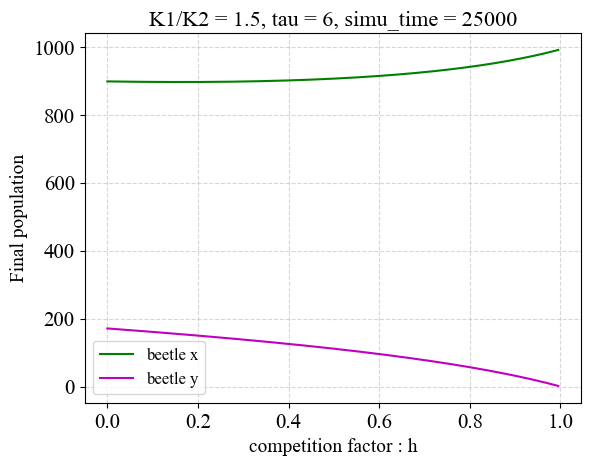

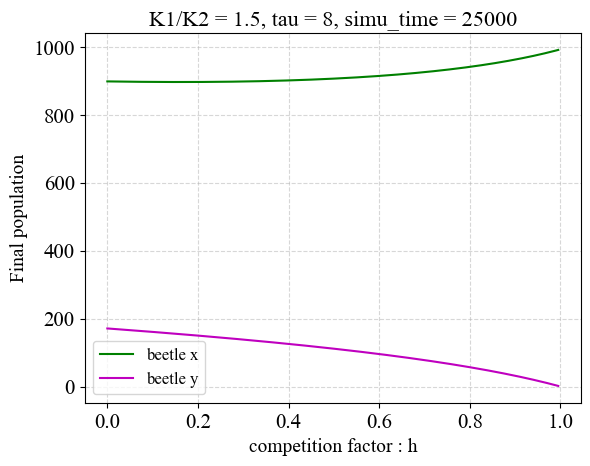

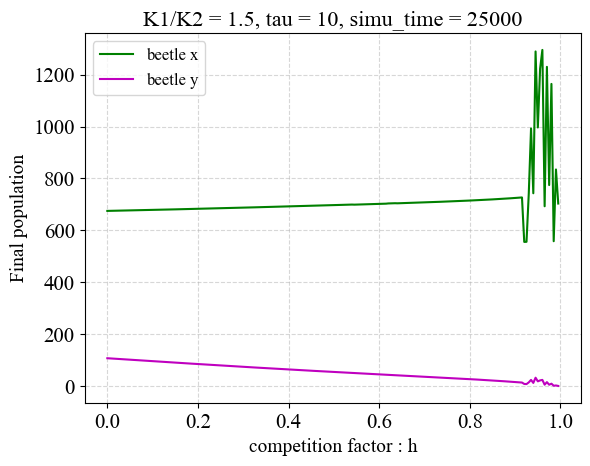

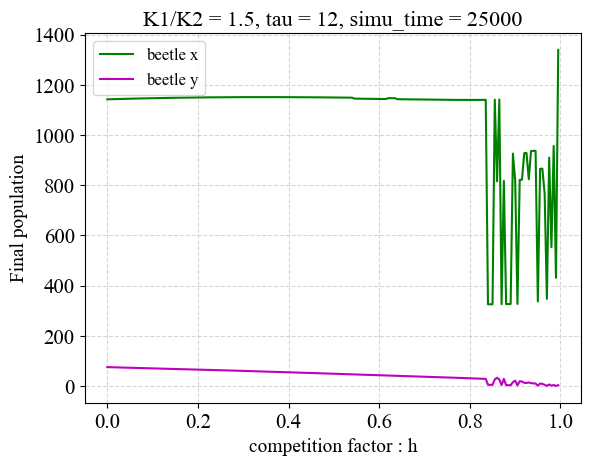

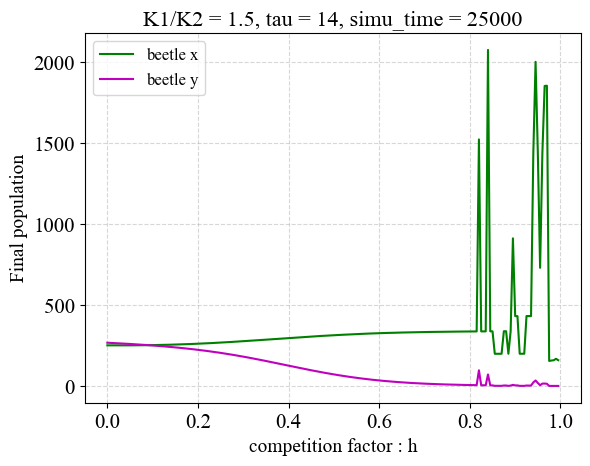

Simulation time =  25000
Competition coefficient between mammals 0.4 competition coefficient between dung beetles 1.0000000000000007
time delay tau = 14
Before invasion x =  279 After invasion x= 159 Before invasion y= 279 After invasion y= 0 Before invasion x+y 557 After invasion x+y 159
functional response, attack ratio g11=1, g12=1, g21=1, g22=1


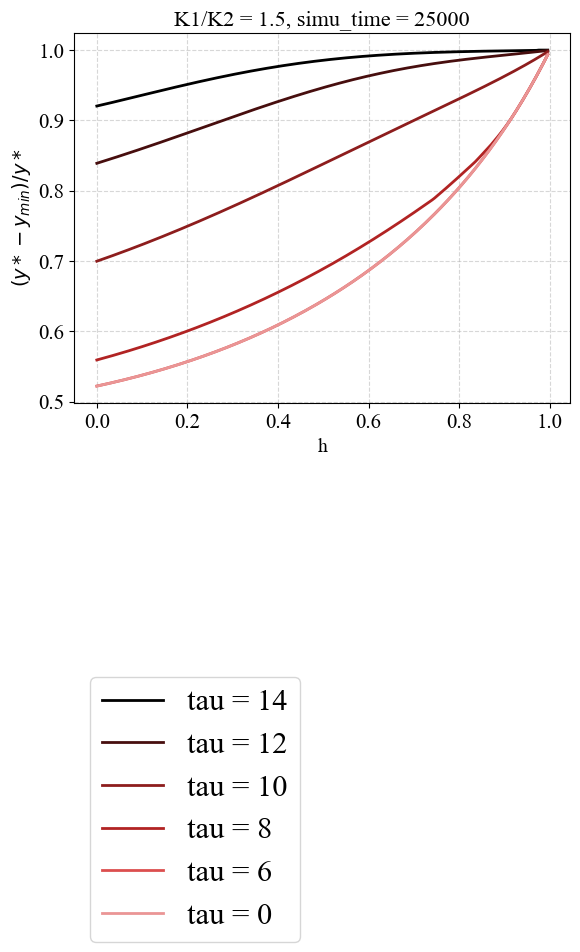

In [6]:
#Time-lag


import os
import datetime
import time
dt_now_jst = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
t_start= time.time()

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("output/Changingtau.pdf")
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

import pickle
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data
    
def append_list_b():
    #definitions of append parameters to the list
    t_oi.append(t)
    n2_l.append(n2)
    f2_l.append(f2)
    x_l.append(x)
    y_l.append(y)

def append_list_a():

    append_list_b()
    tinvasion.append(t)
    n1_l.append(n1)
    f1_l.append(f1)

from tqdm.notebook import tqdm
with tqdm() as pbar:

    K1 = 1500
    K2 = 1000
    Kratio_l = []

    y_diff_ll, y_diff_normalize_ll = [], []
    h_ll = []
    break_count = 0

    tau_l = [0, 6, 8, 10, 12, 14]
    #changing tau 
    for tau in tau_l:


        h_l =[]
        x_fl, y_fl= [], []

        y_diff_l, y_diff_normalize_l = [], []

        h= 0
        
        #varying competition coefficient between dung beetles
        while(h<=1.0):

            t = 0               #Initial time
            a = 0.4             #competition coefficient between mammals
            n1 = 0              #Population size of invasive mammals before invasion
            n2 = 1000           #Population size of native mammals

            r1, r2 = 0.2, 0.1   #Intrinstic growth rate of mammals　sika>mammal　(number/hour)
            b1, b2 = 1, 1       #Defecation efficiency
            c1 , c2 = 0.8, 0.8   #Natural weathering ratio
            f2 = 1000            #Native mammal feces
            
            e1, e2 = 0.1, 0.1
            e_y = 0.2
            k = 1.0

            g11 = g22 = 1
            g12 = g21 = 1
            g_y = 1
            T11 = T12 = T21 =T22 = 1
            T_y = 1

            cut_off = 0.1

            #Initial number of dung beetles
            x = y = 300

            t_oi, n2_l, f2_l, x_l, y_l = [t], [n2], [f2], [x],[y]
            last_x, last_y, last_total = [], [], []
            

            dt = 0.001
            simu_time  = 25000          #simulation time each before and after the invasion.
            cut_order = 6
            simu_cut = 1.0 * 10**(-1*cut_order)
            TEND1 = int(simu_time/dt)  

            #Simulation Before invasion 
            for i in range(TEND1):
                t += dt
                n1 = 0

                F2 =(g22*f2_l[i]) / (1+ g22*T22*f2_l[i])
                G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))
            
                n2 += (r2*n2_l[i] * (1- (n2_l[i])/K2))*dt  
                f1 = 0
                f2 += (b2*n2_l[i] - c2*f2_l[i]- F2*x_l[i] - G2*y_l[i])*dt

                x += (F2*e2*x_l[i] * (1- (F2*x_l[i] + h*G2*y_l[i]) / (k*f2_l[i])))*dt
                y += (G2*e_y*y_l[i] * (1- (G2*y_l[i] + h*F2*x_l[i]) / (k*f2_l[i])))*dt

                append_list_b()

                if  i*dt > 100 and abs(y_l[int(-1/dt)-1]-y_l[-1]) < (simu_cut) and abs(x_l[int(-1/dt)-1]-x_l[-1]) < (simu_cut):
                    break

            last_x.append(x)
            last_y.append(y)
            last_total.append(x+y)

            n1 = 10             #Invasive mammal deintisty
            n1_negative = 10    #Invasive mammal deintisty effect population size when t-tau is negative
            f1 = 1
            TAU = int(tau/dt)

            #After invasion simulation year
            TEND_B = int(t/dt)
            simu_time_A = 25000
            TEND2 = int(TEND_B + (simu_time_A/dt))
            tinvasion, n1_l, f1_l = [t],[n1], [f1]
            #Simulation after mammal invasion

            #Simulation after mammal invasion
            for i in range(TEND_B, TEND2):
                
                #when t - tau negative
                if (i < TEND_B + TAU):
                    j = i - TEND_B   #iteration number
                    t = t + dt
                    n1 = n1 + (r1*n1_l[j] * (1- (n1_negative + a*n2_l[i])/K1 ))*dt
                    n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                    G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

                    F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                    F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                    f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                    f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

                    x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                    y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

                    if n1 < cut_off:
                        n1 = 0
                    if n2 < cut_off:
                        n2 = 0
                    if x < cut_off:
                        x= 0
                        append_list_a()
                        break
                    if y < cut_off:
                        y= 0
                        append_list_a()
                        break     

                    append_list_a()
                
                elif (i >= TEND_B + TAU):
                    t = t + dt
                    j = i - TEND_B
                    
                    

                    n1 = n1 + (r1*n1_l[j] * (1- (n1_l[j - TAU] + a*n2_l[i])/K1 ))*dt
                    
                    n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                    Pf1 = f1_l[j] / (f1_l[j] + f2_l[i])
                    Pf2 = f2_l[i] / (f1_l[j] + f2_l[i])

                    G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

                    F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                    F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                    f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                    f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

                    
                    x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                    y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt


                    if n1 < cut_off:
                        n1 = 0
                    if n2 < cut_off:
                        n2 = 0
                    if x < cut_off:
                        x= 0
                        append_list_a()
                        break
                    if y < cut_off:
                        y= 0
                        append_list_a()
                        break  

                    append_list_a()

                    x_diff, y_diff=abs(x_l[int(-1/dt)-1]-x_l[-1]), abs(y_l[int(-1/dt)-1]-y_l[-1])
                    if  j*dt > 100 and y_diff < (simu_cut) and x_diff < (simu_cut):
                        break                    
        
                    #After invasionif same as 500 years before stop calculation
                    if j*dt>1000 and (j*dt) % 500 == 0 :
                        y_min1 = y_l.index(min(y_l[TEND_B:]))
                        y_min2 = y_l.index(min(y_l[TEND_B:int(-500/dt)]))
                        if y_min1 == y_min2:
                            break

        
            h_l.append(h)
            x_fl.append(x)
            y_fl.append(y)

            last_x.append(x)
            last_y.append(y)
            last_total.append(x+y)
            y_min = min(y_l[TEND_B:])

            
            y_diff_l.append(last_y[0] - y_min)
            y_diff_normalize_l.append((last_y[0]-y_min)/ last_y[0])

            h += 0.005
            pbar.set_description(f"[tau = {tau}, h = {h}]")


        plt.figure()
        plt.plot(h_l, x_fl, 'g', h_l, y_fl, 'm')
        plt.grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
        plt.legend(["beetle x", "beetle y"],  fontsize="12")
        plt.title("K1/K2 = {}, tau = {}, simu_time = {}".format(K1/K2, tau, simu_time), fontsize="16")
        plt.xlabel("competition factor : h", fontsize="14")
        plt.ylabel("Final population", fontsize="14")
        # show figures
        plt.show()

        Kratio_l.append(K1/K2)

        y_diff_ll.append(y_diff_l)
        y_diff_normalize_ll.append(y_diff_normalize_l)
        h_ll.append(h_l)

        pbar.update(1)

print("Simulation time = ", simu_time)
print("Competition coefficient between mammals", a, "competition coefficient between dung beetles", h)
print("time delay tau =",tau)
print("Before invasion x = ",round(last_x[0]),"After invasion x=",round(last_x[1]),"Before invasion y=",round(last_y[0]),"After invasion y=",round(last_y[1]),"Before invasion x+y",round(last_total[0]),"After invasion x+y",round(last_total[1]))
print("functional response, attack ratio g11={}, g12={}, g21={}, g22={}".format(g11,g12,g21,g22))


color_l = ["black", "#470e0e","#8d1d1d", "#b12323", "#dc4e4e","#ea9595" ]
plt.figure()
nagasa = len(y_diff_normalize_ll)
for i in range(nagasa):
    plt.plot(h_ll[nagasa-1-i], y_diff_normalize_ll[nagasa-1-i], linewidth="2", c = color_l[i])
plt.legend(["tau = {}".format(var)for var in reversed(tau_l)], loc="lower left", fontsize="22",bbox_to_anchor=(0, -1.5))
plt.title("K1/K2 = {}, simu_time = {}".format( K1/K2, simu_time), fontsize="16")
plt.grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
plt.xlabel("h", fontsize="14")
plt.ylabel("$(y*-y_{min}) / y*$", fontsize="14")
pdf.savefig()
plt.show()

#save calcuration result as pickle
outputpath = f"output/Changingtau/xy,dt={dt},cut_off={cut_off},simu_time_A={simu_time_A}/"
os.makedirs(outputpath, exist_ok =True)
pickle_l = [y_diff_ll, y_diff_normalize_ll, h_ll]
pickle_name_l = ["y_diff_ll", "y_diff_normalize_ll", "h_ll"]
out_name_l = [outputpath + "{}.pickle".format(name) for name in pickle_name_l]
#Save results as .pickle
for i, j in zip(pickle_l, out_name_l):
    pickle_dump(i, j)

pdf.close()

t_end = time.time()
elapsed_time = t_end - t_start
path = outputpath+'erapsed_time.txt'
f = open(path, 'w')
f.write(f"Calculation start{dt_now_jst}, Calculation time{elapsed_time}s")  
f.close()


Fig5 time-delayed 

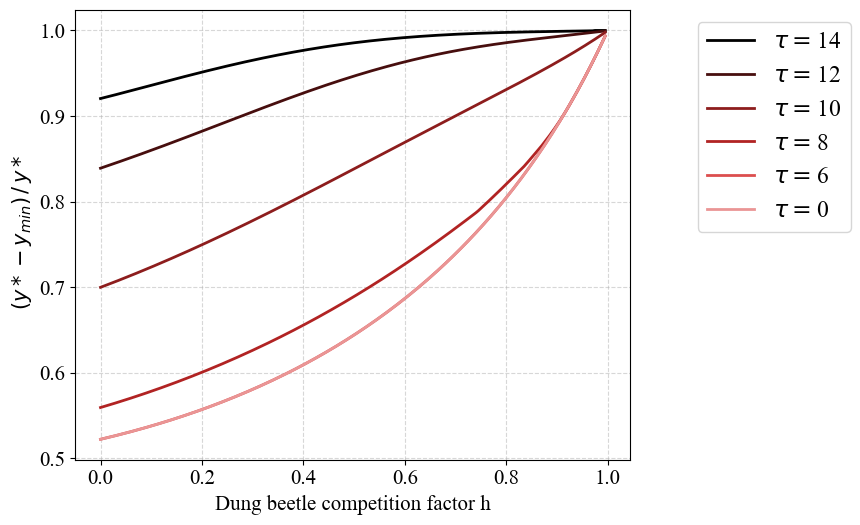

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (9, 5.5)

import pickle

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data



dt = 0.001
simu_time  = 25000          #simulation time each before and after the invasion.
cut_order = 6
cut_off = 0.1
simu_time_A=25000

outputpath = f"output/Changingtau/xy,dt={dt},cut_off={cut_off},simu_time_A={simu_time_A}/"

# outputpath=
y_diff_normalize_ll = pickle_load( outputpath+"y_diff_normalize_ll.pickle")
h_ll = pickle_load(outputpath+"h_ll.pickle")

tau_l = [0, 6, 8, 10, 12, 14]


color_l = ["black", "#470e0e","#8d1d1d", "#b12323", "#dc4e4e","#ea9595" ]
plt.figure()
nagasa = len(y_diff_normalize_ll)
for i in range(nagasa):
    plt.plot(h_ll[nagasa-1-i], y_diff_normalize_ll[nagasa-1-i], linewidth="2", c = color_l[i])
plt.legend([r"$\tau= ${}".format(var)for var in reversed(tau_l)], bbox_to_anchor=(1.1, 1.0), fontsize="17")
plt.grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
plt.xlabel("Dung beetle competition factor h", fontsize="15")
plt.ylabel(" $(y*-y_{min}) \, / \, y*$", fontsize="15")
plt.tight_layout()
plt.savefig(outputpath+"fig5.pdf",bbox_inches="tight")
plt.show()

cut_off=0.01

0it [00:00, ?it/s]

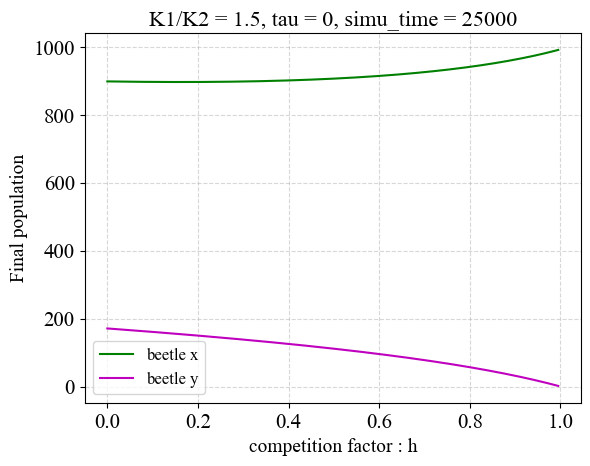

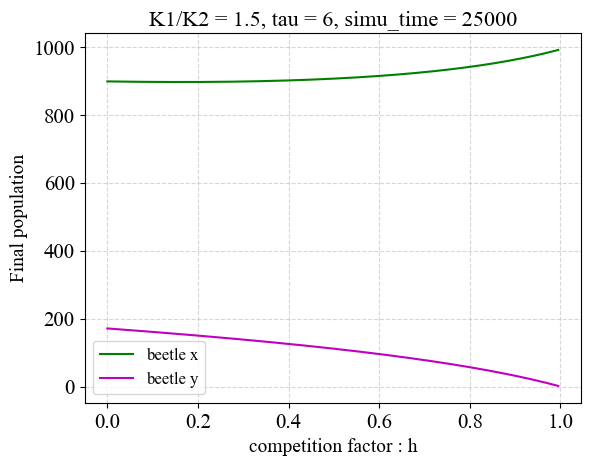

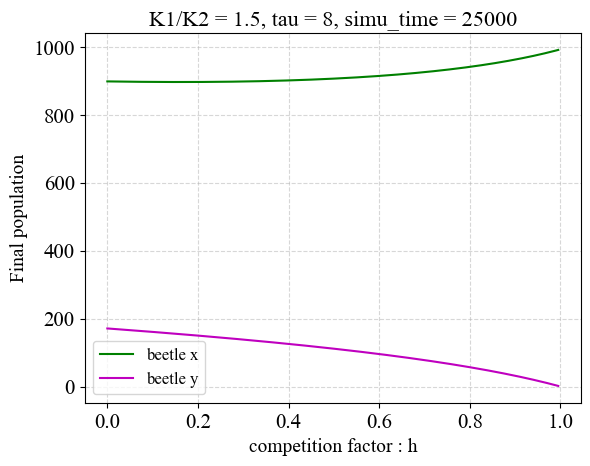

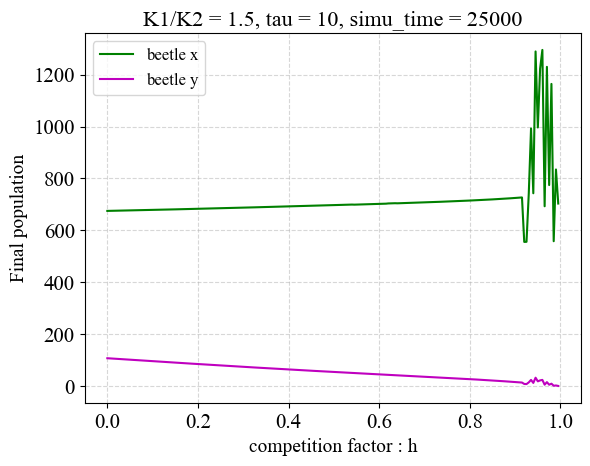

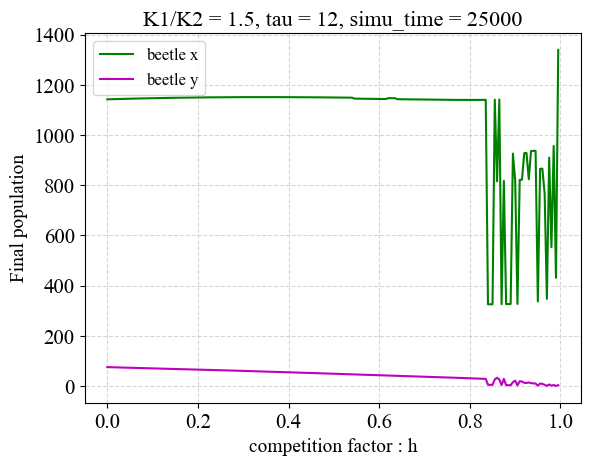

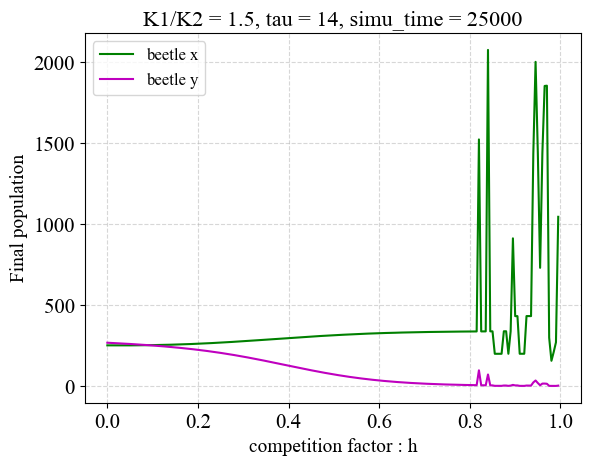

Simulation time =  25000
Competition coefficient between mammals 0.4 competition coefficient between dung beetles 1.0000000000000007
time delay tau = 14
Before invasion x =  279 After invasion x= 1045 Before invasion y= 279 After invasion y= 2 Before invasion x+y 557 After invasion x+y 1047
functional response, attack ratio g11=1, g12=1, g21=1, g22=1


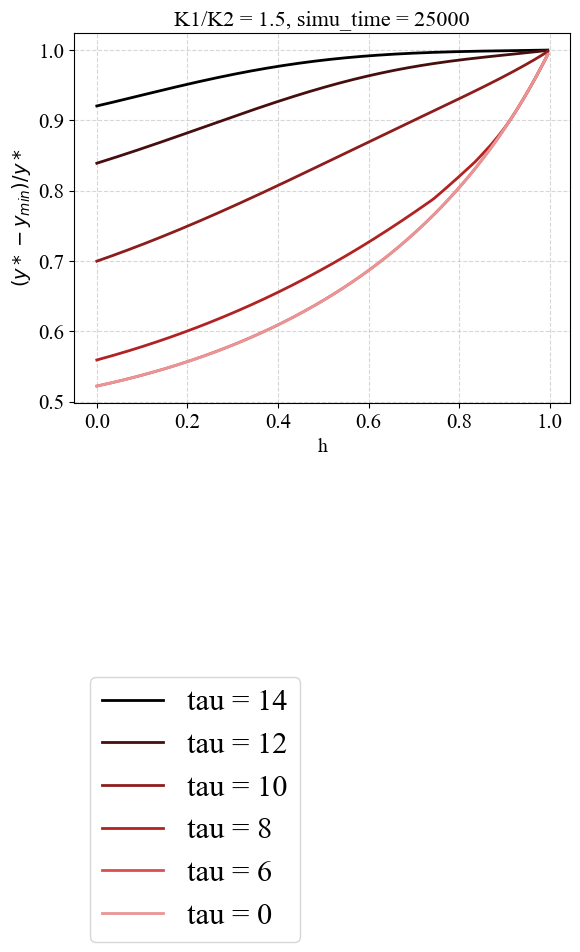

In [7]:
#Time-lag


import os
import datetime
import time
dt_now_jst = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
t_start= time.time()

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages("output/Changingtau.pdf")
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

import pickle
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data
    
def append_list_b():
    #definitions of append parameters to the list
    t_oi.append(t)
    n2_l.append(n2)
    f2_l.append(f2)
    x_l.append(x)
    y_l.append(y)

def append_list_a():

    append_list_b()
    tinvasion.append(t)
    n1_l.append(n1)
    f1_l.append(f1)

from tqdm.notebook import tqdm
with tqdm() as pbar:

    K1 = 1500
    K2 = 1000
    Kratio_l = []

    y_diff_ll, y_diff_normalize_ll = [], []
    h_ll = []
    break_count = 0

    tau_l = [0, 6, 8, 10, 12, 14]
    #changing tau 
    for tau in tau_l:


        h_l =[]
        x_fl, y_fl= [], []

        y_diff_l, y_diff_normalize_l = [], []

        h= 0
        
        #varying competition coefficient between dung beetles
        while(h<=1.0):

            t = 0               #Initial time
            a = 0.4             #competition coefficient between mammals
            n1 = 0              #Population size of invasive mammals before invasion
            n2 = 1000           #Population size of native mammals

            r1, r2 = 0.2, 0.1   #Intrinstic growth rate of mammals　sika>mammal　(number/hour)
            b1, b2 = 1, 1   #Defecation efficiency
            c1 , c2 = 0.8, 0.8   #Natural weathering ratio
            f2 = 1000            #Native mammal feces
            
            e1, e2 = 0.1, 0.1
            e_y = 0.2
            k = 1.0

            g11 = g22 = 1
            g12 = g21 = 1
            g_y = 1
            T11 = T12 = T21 =T22 = 1
            T_y = 1

            cut_off = 0.01

            #Initial number of dung beetles
            x = y = 300

            t_oi, n2_l, f2_l, x_l, y_l = [t], [n2], [f2], [x],[y]
            last_x, last_y, last_total = [], [], []
            

            dt = 0.001
            simu_time  = 25000          #simulation time each before and after the invasion.
            cut_order = 6
            simu_cut = 1.0 * 10**(-1*cut_order)
            TEND1 = int(simu_time/dt)  

            #Simulation Before invasion 
            for i in range(TEND1):
                t += dt
                n1 = 0

                F2 =(g22*f2_l[i]) / (1+ g22*T22*f2_l[i])
                G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))
            
                n2 += (r2*n2_l[i] * (1- (n2_l[i])/K2))*dt  
                f1 = 0
                f2 += (b2*n2_l[i] - c2*f2_l[i]- F2*x_l[i] - G2*y_l[i])*dt

                x += (F2*e2*x_l[i] * (1- (F2*x_l[i] + h*G2*y_l[i]) / (k*f2_l[i])))*dt
                y += (G2*e_y*y_l[i] * (1- (G2*y_l[i] + h*F2*x_l[i]) / (k*f2_l[i])))*dt

                append_list_b()

                if  i*dt > 100 and abs(y_l[int(-1/dt)-1]-y_l[-1]) < (simu_cut) and abs(x_l[int(-1/dt)-1]-x_l[-1]) < (simu_cut):
                    break

            last_x.append(x)
            last_y.append(y)
            last_total.append(x+y)

            n1 = 10             #Invasive mammal deintisty
            n1_negative = 10    #Invasive mammal deintisty effect population size when t-tau is negative
            f1 = 1
            TAU = int(tau/dt)

            #After invasion simulation year
            TEND_B = int(t/dt)
            simu_time_A = 25000
            TEND2 = int(TEND_B + (simu_time_A/dt))
            tinvasion, n1_l, f1_l = [t],[n1], [f1]
            #Simulation after mammal invasion

            #Simulation after mammal invasion
            for i in range(TEND_B, TEND2):
                
                #when t - tau negative
                if (i < TEND_B + TAU):
                    j = i - TEND_B   #iteration number
                    t = t + dt
                    n1 = n1 + (r1*n1_l[j] * (1- (n1_negative + a*n2_l[i])/K1 ))*dt
                    n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                    G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

                    F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                    F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                    f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                    f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

                    x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                    y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

                    if n1 < cut_off:
                        n1 = 0
                    if n2 < cut_off:
                        n2 = 0
                    if x < cut_off:
                        x= 0
                        append_list_a()
                        break
                    if y < cut_off:
                        y= 0
                        append_list_a()
                        break     

                    append_list_a()
                
                elif (i >= TEND_B + TAU):
                    t = t + dt
                    j = i - TEND_B
                    
                    

                    n1 = n1 + (r1*n1_l[j] * (1- (n1_l[j - TAU] + a*n2_l[i])/K1 ))*dt
                    
                    n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                    Pf1 = f1_l[j] / (f1_l[j] + f2_l[i])
                    Pf2 = f2_l[i] / (f1_l[j] + f2_l[i])

                    G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

                    F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                    F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                    f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                    f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

                    
                    x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                    y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt


                    if n1 < cut_off:
                        n1 = 0
                    if n2 < cut_off:
                        n2 = 0
                    if x < cut_off:
                        x= 0
                        append_list_a()
                        break
                    if y < cut_off:
                        y= 0
                        append_list_a()
                        break  

                    append_list_a()

                    x_diff, y_diff=abs(x_l[int(-1/dt)-1]-x_l[-1]), abs(y_l[int(-1/dt)-1]-y_l[-1])
                    if  j*dt > 100 and y_diff < (simu_cut) and x_diff < (simu_cut):
                        break                    
        
                    #After invasionif same as 500 years before stop calculation
                    if j*dt>1000 and (j*dt) % 500 == 0 :
                        y_min1 = y_l.index(min(y_l[TEND_B:]))
                        y_min2 = y_l.index(min(y_l[TEND_B:int(-500/dt)]))
                        if y_min1 == y_min2:
                            break

        
            h_l.append(h)
            x_fl.append(x)
            y_fl.append(y)

            last_x.append(x)
            last_y.append(y)
            last_total.append(x+y)
            y_min = min(y_l[TEND_B:])

            
            y_diff_l.append(last_y[0] - y_min)
            y_diff_normalize_l.append((last_y[0]-y_min)/ last_y[0])

            h += 0.005
            pbar.set_description(f"[tau = {tau}, h = {h}]")


        plt.figure()
        plt.plot(h_l, x_fl, 'g', h_l, y_fl, 'm')
        plt.grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
        plt.legend(["beetle x", "beetle y"],  fontsize="12")
        plt.title("K1/K2 = {}, tau = {}, simu_time = {}".format(K1/K2, tau, simu_time), fontsize="16")
        plt.xlabel("competition factor : h", fontsize="14")
        plt.ylabel("Final population", fontsize="14")
        # show figures
        plt.show()

        Kratio_l.append(K1/K2)

        y_diff_ll.append(y_diff_l)
        y_diff_normalize_ll.append(y_diff_normalize_l)
        h_ll.append(h_l)

        pbar.update(1)

print("Simulation time = ", simu_time)
print("Competition coefficient between mammals", a, "competition coefficient between dung beetles", h)
print("time delay tau =",tau)
print("Before invasion x = ",round(last_x[0]),"After invasion x=",round(last_x[1]),"Before invasion y=",round(last_y[0]),"After invasion y=",round(last_y[1]),"Before invasion x+y",round(last_total[0]),"After invasion x+y",round(last_total[1]))
print("functional response, attack ratio g11={}, g12={}, g21={}, g22={}".format(g11,g12,g21,g22))


color_l = ["black", "#470e0e","#8d1d1d", "#b12323", "#dc4e4e","#ea9595" ]
plt.figure()
nagasa = len(y_diff_normalize_ll)
for i in range(nagasa):
    plt.plot(h_ll[nagasa-1-i], y_diff_normalize_ll[nagasa-1-i], linewidth="2", c = color_l[i])
plt.legend(["tau = {}".format(var)for var in reversed(tau_l)], loc="lower left", fontsize="22",bbox_to_anchor=(0, -1.5))
plt.title("K1/K2 = {}, simu_time = {}".format( K1/K2, simu_time), fontsize="16")
plt.grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
plt.xlabel("h", fontsize="14")
plt.ylabel("$(y*-y_{min}) / y*$", fontsize="14")
pdf.savefig()
plt.show()

#save calcuration result as pickle
outputpath = f"output/Changingtau/xy,dt={dt},cut_off={cut_off},simu_time_A={simu_time_A}/"
os.makedirs(outputpath, exist_ok =True)
pickle_l = [y_diff_ll, y_diff_normalize_ll, h_ll]
pickle_name_l = ["y_diff_ll", "y_diff_normalize_ll", "h_ll"]
out_name_l = [outputpath + "{}.pickle".format(name) for name in pickle_name_l]
#Save results as .pickle
for i, j in zip(pickle_l, out_name_l):
    pickle_dump(i, j)

pdf.close()

t_end = time.time()
elapsed_time = t_end - t_start
path = outputpath+'erapsed_time.txt'
f = open(path, 'w')
f.write(f"Calculation start{dt_now_jst}, Calculation time{elapsed_time}s")  
f.close()


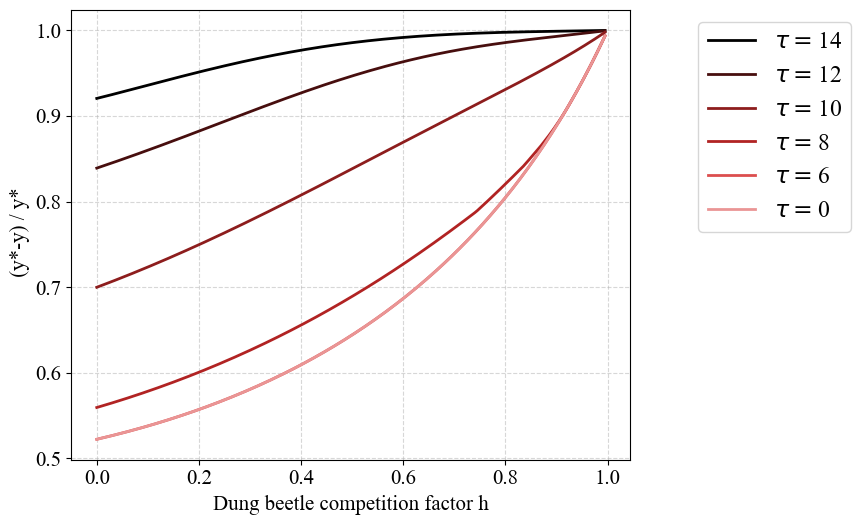

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (9, 5.5)

import pickle

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data


dt = 0.001
simu_time_A = 25000
cut_off = 0.01

outputpath = f"output/Changingtau/xy,dt={dt},cut_off={cut_off},simu_time_A={simu_time_A}/"

y_diff_normalize_ll = pickle_load( outputpath+"y_diff_normalize_ll.pickle")
h_ll = pickle_load(outputpath+"h_ll.pickle")

tau_l = [0, 6, 8, 10, 12, 14]


color_l = ["black", "#470e0e","#8d1d1d", "#b12323", "#dc4e4e","#ea9595" ]
plt.figure()
nagasa = len(y_diff_normalize_ll)
for i in range(nagasa):
    plt.plot(h_ll[nagasa-1-i], y_diff_normalize_ll[nagasa-1-i], linewidth="2", c = color_l[i])
plt.legend([r"$\tau= ${}".format(var)for var in reversed(tau_l)], bbox_to_anchor=(1.1, 1.0), fontsize="17")
plt.grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
plt.xlabel("Dung beetle competition factor h", fontsize="15")
plt.ylabel(" (y*-y) / y*", fontsize="15")
plt.tight_layout()
# plt.savefig(outputpath+"fig3.pdf",bbox_inches="tight")
plt.show()

Fig S12 4 Preference K1/K2 = 1.5 tau simulation


0it [00:00, ?it/s]

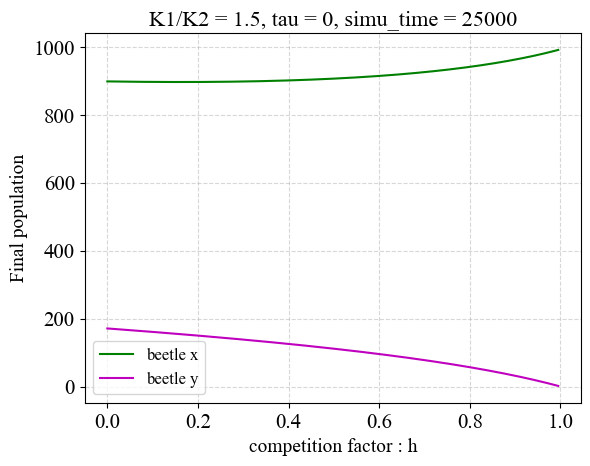

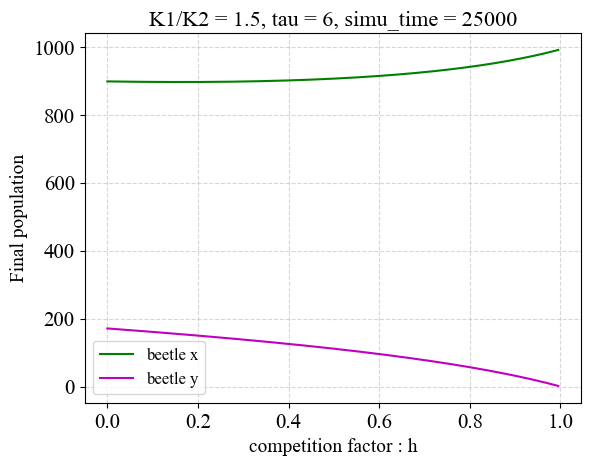

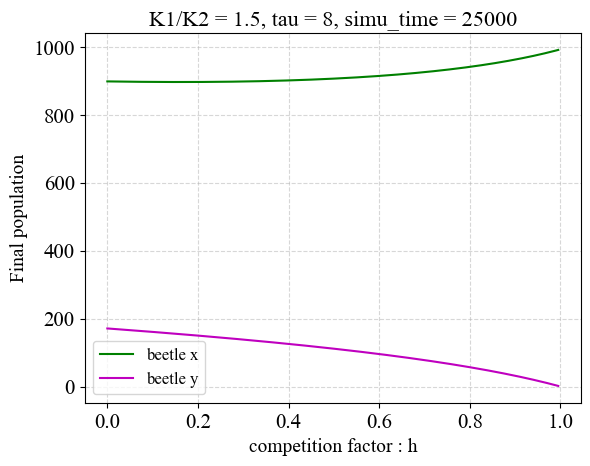

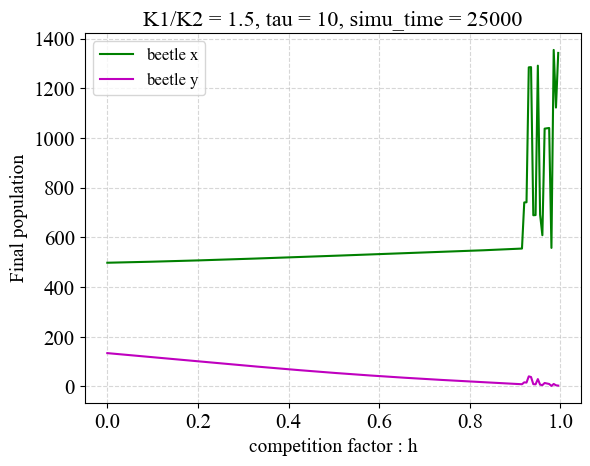

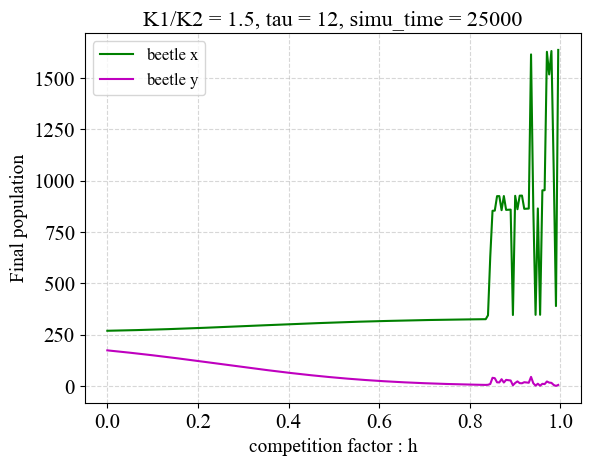

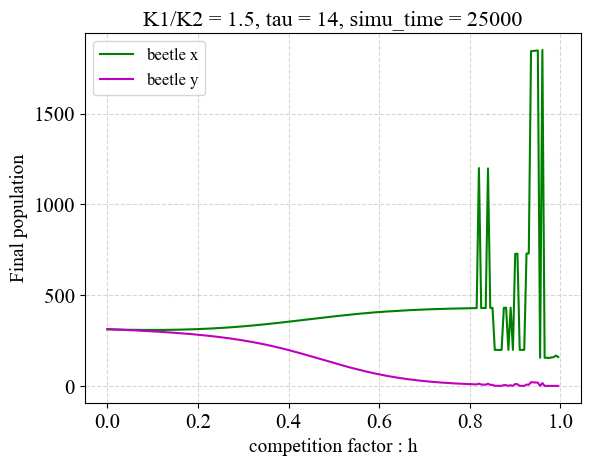

Simulation time =  25000
Competition coefficient between mammals 0.4 competition coefficient between dung beetles 1.0000000000000007
time delay tau = 14
Before invasion x =  279 After invasion x= 159 Before invasion y= 279 After invasion y= 0 Before invasion x+y 557 After invasion x+y 159
functional response, attack ratio g11=1, g12=1, g21=1, g22=1


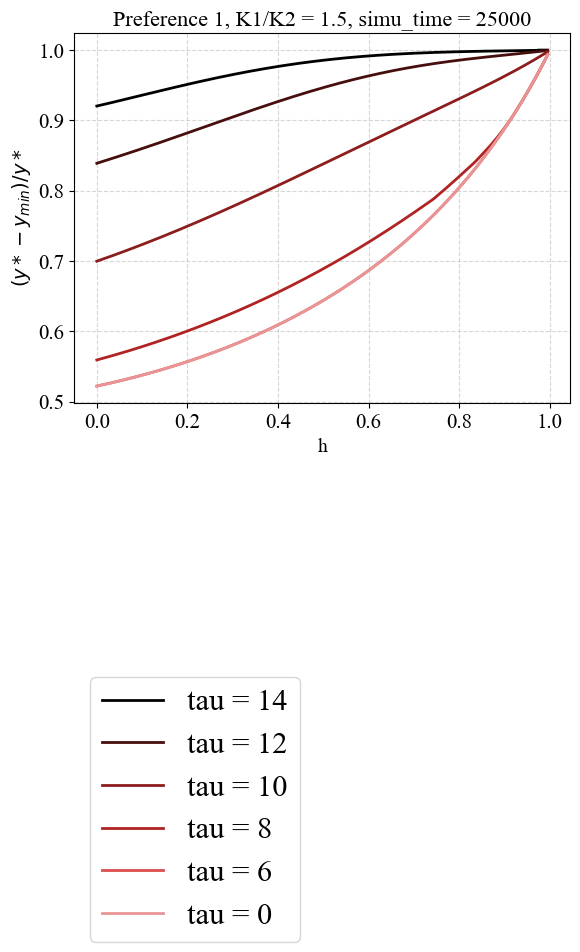

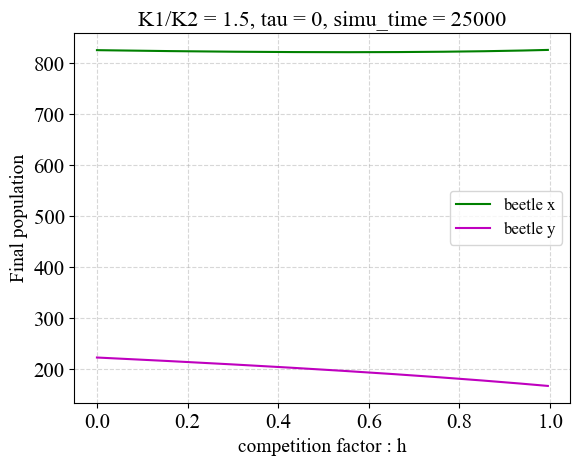

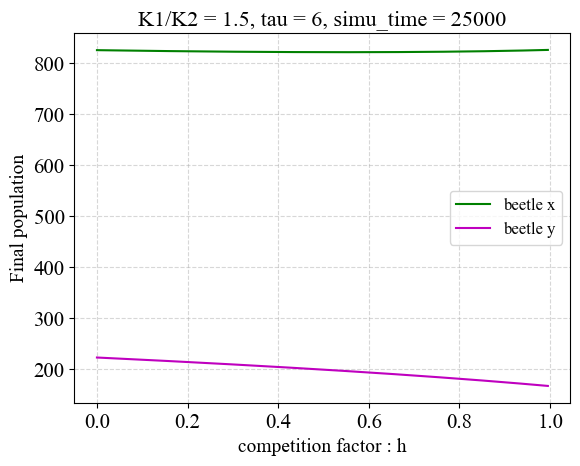

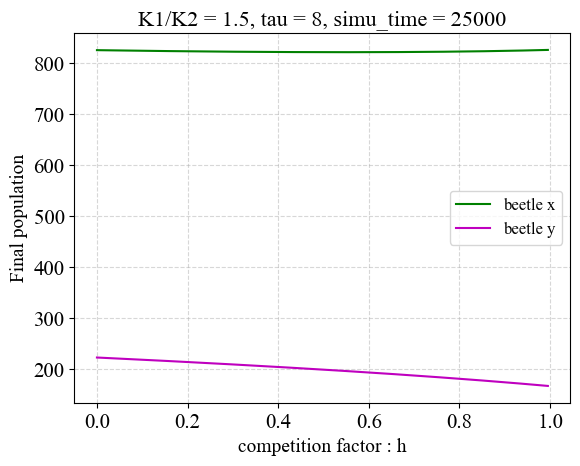

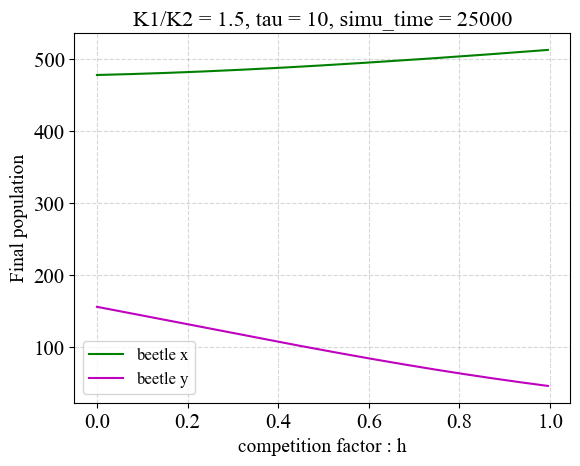

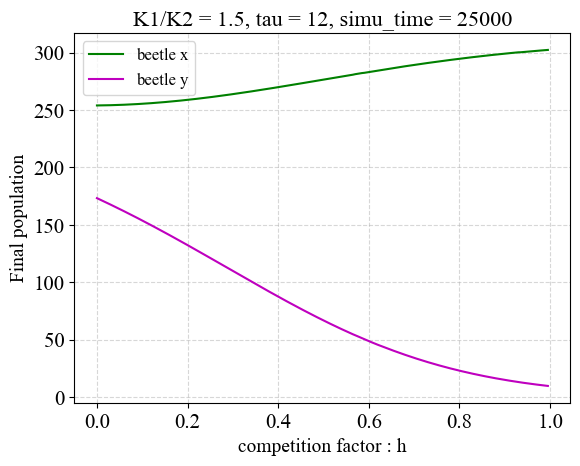

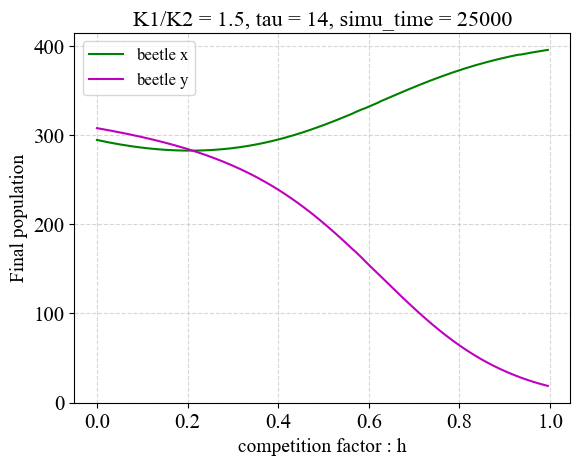

Simulation time =  25000
Competition coefficient between mammals 0.4 competition coefficient between dung beetles 1.0000000000000007
time delay tau = 14
Before invasion x =  278 After invasion x= 396 Before invasion y= 279 After invasion y= 19 Before invasion x+y 557 After invasion x+y 415
functional response, attack ratio g11=10, g12=0.1, g21=0.1, g22=10


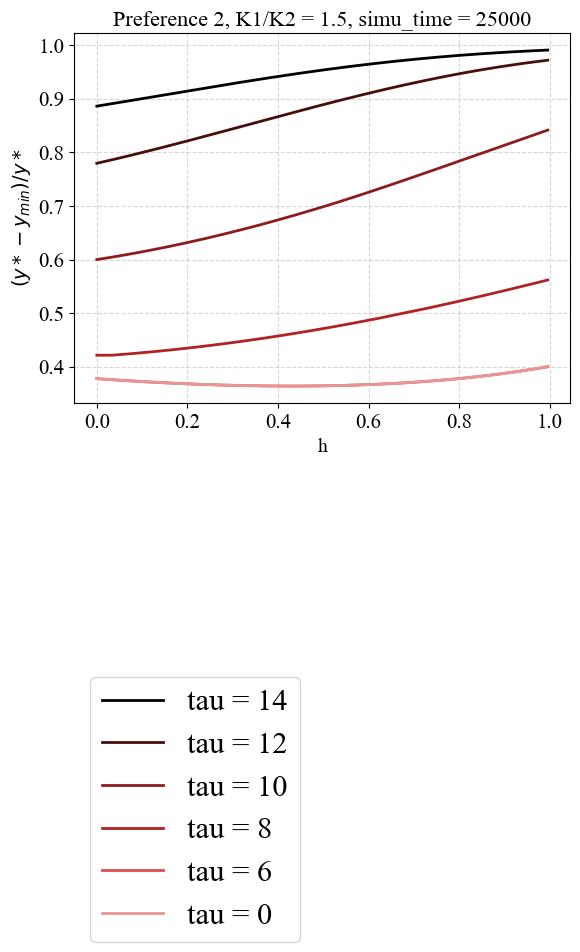

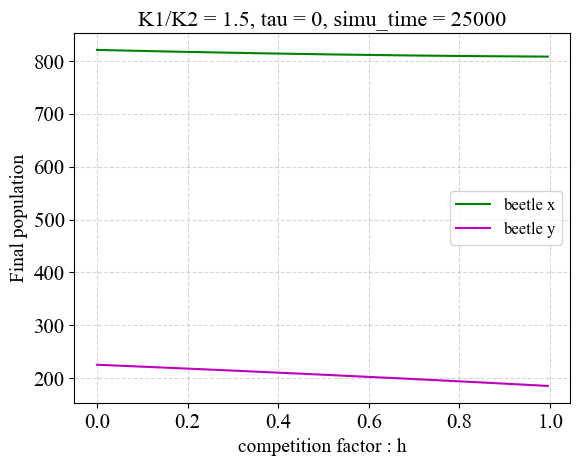

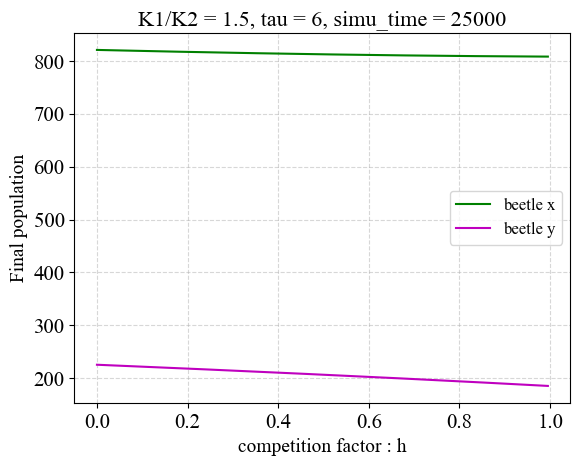

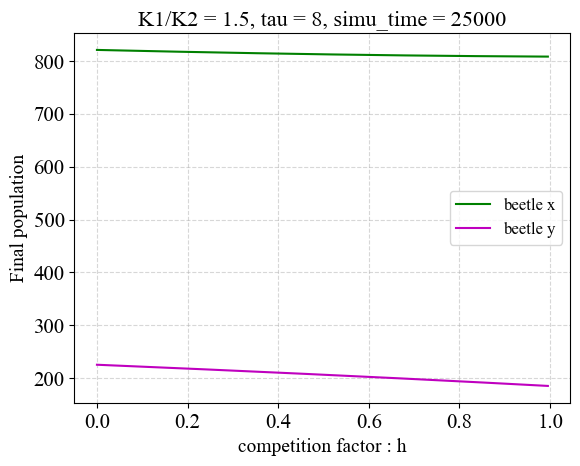

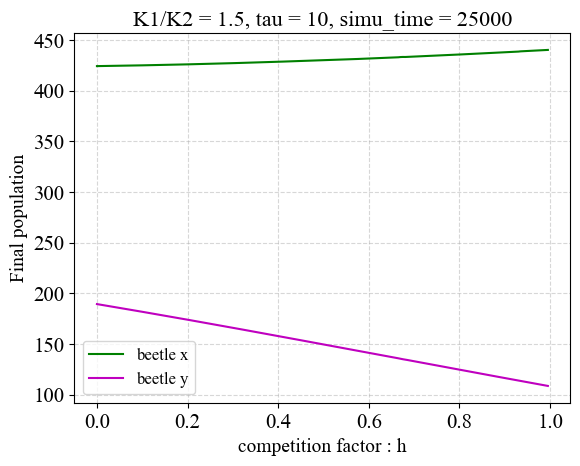

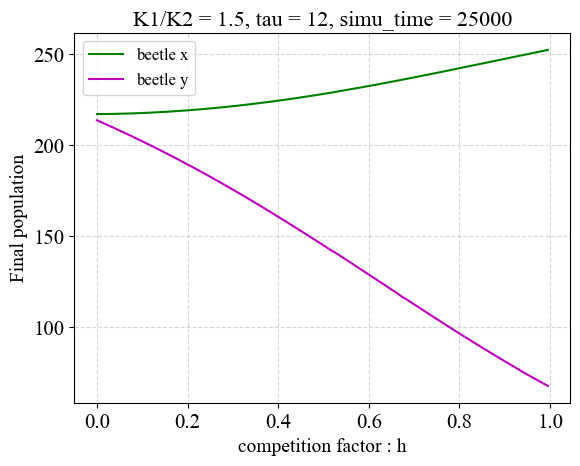

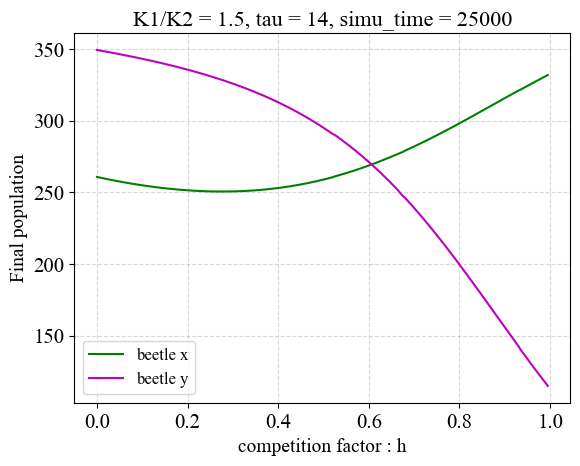

Simulation time =  25000
Competition coefficient between mammals 0.4 competition coefficient between dung beetles 1.0000000000000007
time delay tau = 14
Before invasion x =  280 After invasion x= 332 Before invasion y= 279 After invasion y= 115 Before invasion x+y 558 After invasion x+y 447
functional response, attack ratio g11=3, g12=0.9, g21=0.9, g22=0.3


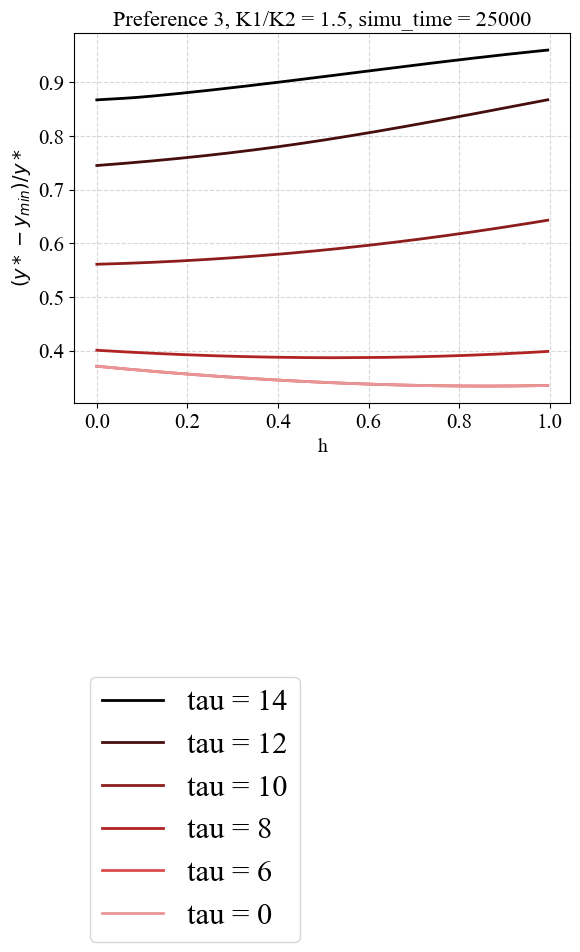

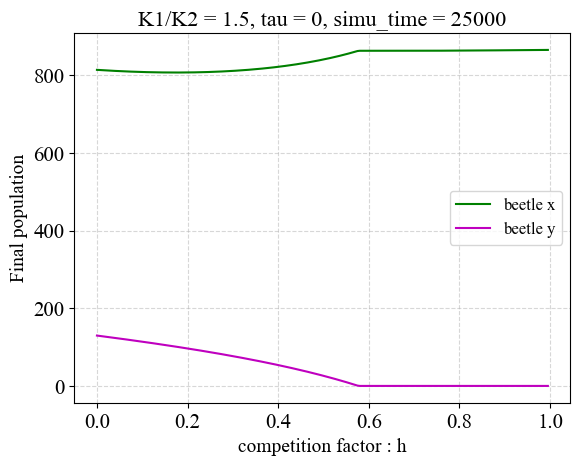

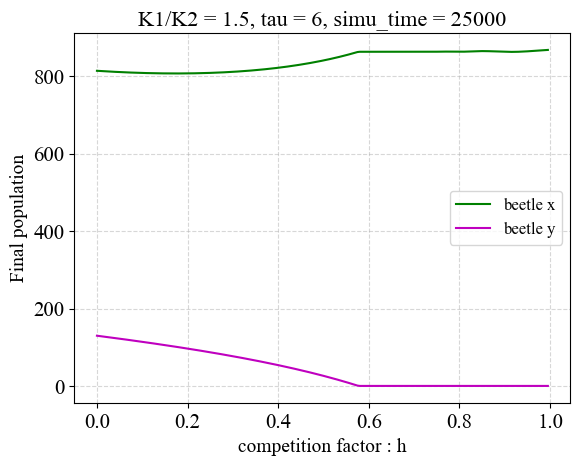

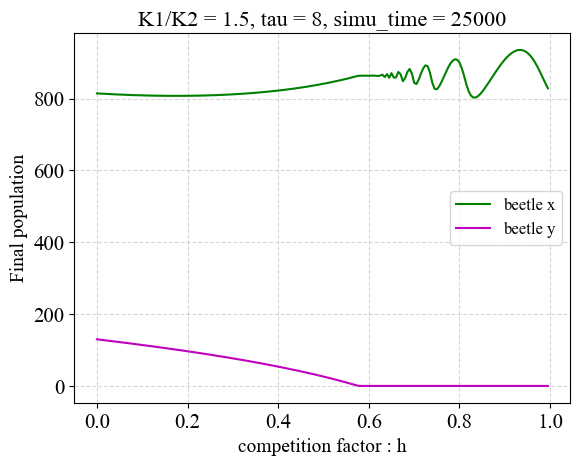

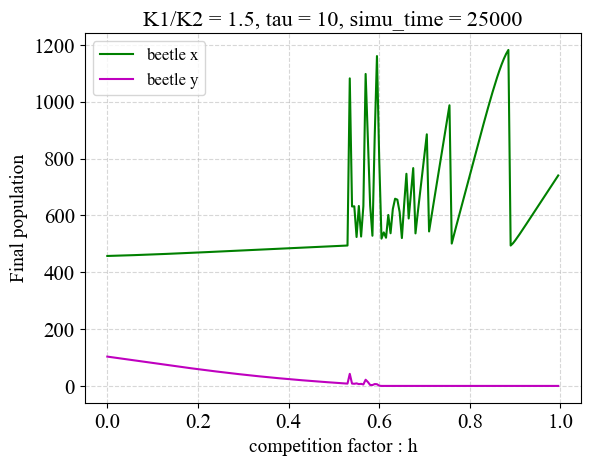

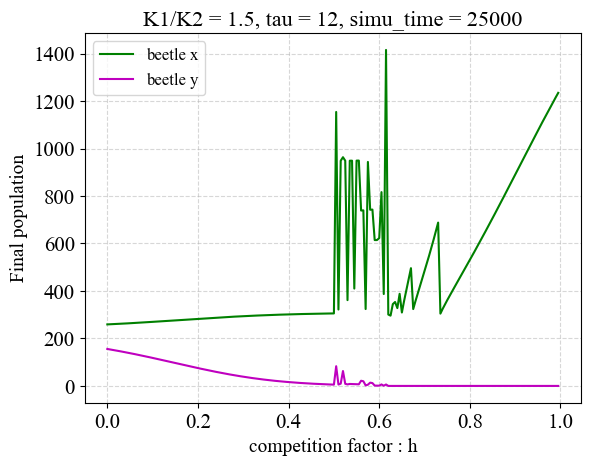

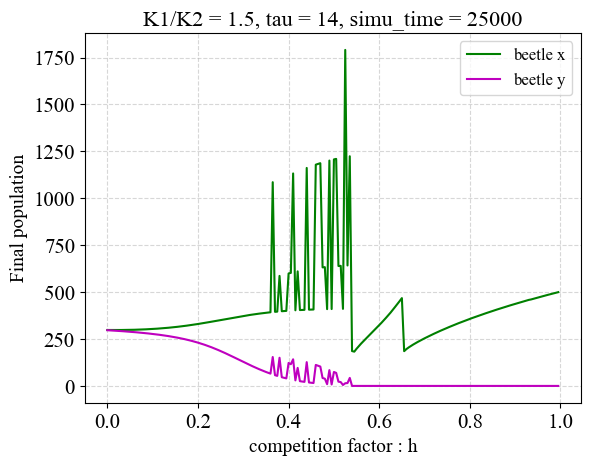

Simulation time =  25000
Competition coefficient between mammals 0.4 competition coefficient between dung beetles 1.0000000000000007
time delay tau = 14
Before invasion x =  278 After invasion x= 500 Before invasion y= 279 After invasion y= 0 Before invasion x+y 557 After invasion x+y 500
functional response, attack ratio g11=0.3, g12=0.9, g21=0.9, g22=3


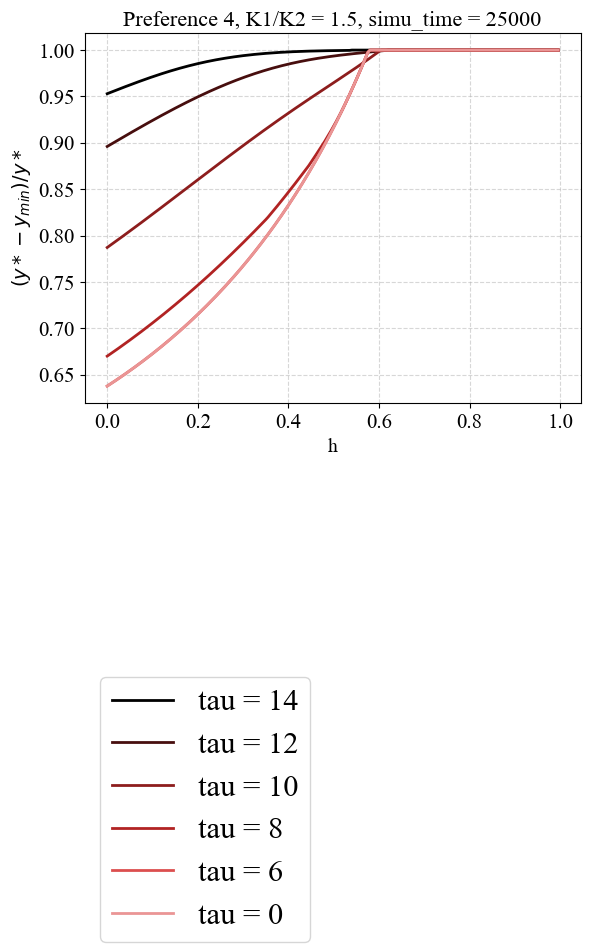

In [8]:
#Time-lag

import os
import datetime
import time
dt_now_jst = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9)))
t_start= time.time()

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15

import pickle
def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data
    
def append_list_b():
    #definitions of append parameters to the list
    t_oi.append(t)
    n2_l.append(n2)
    f2_l.append(f2)
    x_l.append(x)
    y_l.append(y)

def append_list_a():

    append_list_b()
    tinvasion.append(t)
    n1_l.append(n1)
    f1_l.append(f1)

from tqdm.notebook import tqdm
with tqdm() as pbar:
    y_diff_normalize_lll, y_diff_lll, h_lll = [], [], []

    situ = 0
    g11_l = [1, 10, 3 , 0.3]
    g22_l = [1, 10, 0.3, 3]
    g12_l = [1, 0.1, 0.9, 0.9]
    g21_l = [1, 0.1, 0.9, 0.9]


    #Preference のループ
    for g11, g22, g12, g21  in zip (g11_l, g22_l, g12_l, g21_l):
        situ += 1

        K1 = 1500
        K2 = 1000
        Kratio_l = []

        y_diff_ll, y_diff_normalize_ll = [], []
        h_ll = []
        break_count = 0

        tau_l = [0, 6, 8, 10, 12, 14]
        
        #changing tau 
        for tau in tau_l:


            h_l =[]
            x_fl, y_fl= [], []

            y_diff_l, y_diff_normalize_l = [], []

            h= 0
            
            #varying competition coefficient between dung beetles
            while(h<=1.0):

                t = 0               #Initial time
                a = 0.4             #competition coefficient between mammals
                n1 = 0              #Population size of invasive mammals before invasion
                n2 = 1000           #Population size of native mammals

                r1, r2 = 0.2, 0.1   #Intrinstic growth rate of mammals　sika>mammal　(number/hour)
                b1, b2 = 1, 1       #Defecation efficiency
                c1 , c2 = 0.8, 0.8   #Natural weathering ratio
                f2 = 1000            #Native mammal feces
                
                e1, e2 = 0.1, 0.1
                e_y = 0.2
                k = 1.0

                # g11 = g22 = 1
                # g12 = g21 = 1
                g_y = 1
                T11 = T12 = T21 =T22 = 1
                T_y = 1

                cut_off = 0.1

                #Initial number of dung beetles
                x = y = 300

                t_oi, n2_l, f2_l, x_l, y_l = [t], [n2], [f2], [x],[y]
                last_x, last_y, last_total = [], [], []
                

                dt = 0.001
                simu_time  = 25000          #simulation time each before and after the invasion.
                cut_order = 6
                simu_cut = 1.0 * 10**(-1*cut_order)
                TEND1 = int(simu_time/dt)  

                #Simulation Before invasion 
                for i in range(TEND1):
                    t += dt
                    n1 = 0

                    F2 =(g22*f2_l[i]) / (1+ g22*T22*f2_l[i])
                    G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))
                
                    n2 += (r2*n2_l[i] * (1- (n2_l[i])/K2))*dt  
                    f1 = 0
                    f2 += (b2*n2_l[i] - c2*f2_l[i]- F2*x_l[i] - G2*y_l[i])*dt

                    x += (F2*e2*x_l[i] * (1- (F2*x_l[i] + h*G2*y_l[i]) / (k*f2_l[i])))*dt
                    y += (G2*e_y*y_l[i] * (1- (G2*y_l[i] + h*F2*x_l[i]) / (k*f2_l[i])))*dt

                    append_list_b()

                    if  i*dt > 100 and abs(y_l[int(-1/dt)-1]-y_l[-1]) < (simu_cut) and abs(x_l[int(-1/dt)-1]-x_l[-1]) < (simu_cut):
                        break

                last_x.append(x)
                last_y.append(y)
                last_total.append(x+y)

                n1 = 10             #Invasive mammal deintisty
                n1_negative = 10    #Invasive mammal deintisty effect population size when t-tau is negative
                f1 = 1
                TAU = int(tau/dt)

                #After invasion simulation year
                TEND_B = int(t/dt)
                simu_time_A = 25000
                TEND2 = int(TEND_B + (simu_time_A/dt))
                tinvasion, n1_l, f1_l = [t],[n1], [f1]
                #Simulation after mammal invasion

                #Simulation after mammal invasion
                for i in range(TEND_B, TEND2):
                    
                    #when t - tau negative
                    if (i < TEND_B + TAU):
                        j = i - TEND_B   #iteration number
                        t = t + dt
                        n1 = n1 + (r1*n1_l[j] * (1- (n1_negative + a*n2_l[i])/K1 ))*dt
                        n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                        G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

                        F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                        F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                        f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                        f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

                        x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                        y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt

                        if n1 < cut_off:
                            n1 = 0
                        if n2 < cut_off:
                            n2 = 0
                        if x < cut_off:
                            x= 0
                            append_list_a()
                            break
                        if y < cut_off:
                            y= 0
                            append_list_a()
                            break     

                        append_list_a()
                    
                    elif (i >= TEND_B + TAU):
                        t = t + dt
                        j = i - TEND_B
                        

                        n1 = n1 + (r1*n1_l[j] * (1- (n1_l[j - TAU] + a*n2_l[i])/K1 ))*dt
                        
                        n2 += (r2*n2_l[i] * (1- (n2_l[i] + a*n1_l[j])/K2 ))*dt 

                        Pf1 = f1_l[j] / (f1_l[j] + f2_l[i])
                        Pf2 = f2_l[i] / (f1_l[j] + f2_l[i])

                        G2 = ((g_y*f2_l[i]) / (1+ g_y*T_y*f2_l[i]))

                        F1 = (g12*f1_l[j]*(g11*f1_l[j] + g21*f2_l[i])) / (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])
                        F2 = (g21*f2_l[i]*(g22*f2_l[i] + g12*f1_l[j])) /  (g12*f1_l[j] + g11*g12*T11*(f1_l[j]**2) + g12*g21*f1_l[j]*f2_l[i]*(T12+T21)+g22*g21*T22*(f2_l[i]**2)+g21*f2_l[i])

                        f1 += (b1*n1_l[j] - c1*f1_l[j] - F1*x_l[i])*dt
                        f2 += (b2*n2_l[i] - c2*f2_l[i] - F2*x_l[i] - G2*y_l[i])*dt

                        
                        x += (F1*e1*x_l[i]*(1- (F1*x_l[i])/(k*f1_l[j]) ) + F2*e2*x_l[i] * (1- (F2*x_l[i]+h*G2*y_l[i])/(k*f2_l[i])) )*dt
                        y += (G2*e_y*y_l[i]*(1- (G2*y_l[i]+h*F2*x_l[i]) / (k*f2_l[i]) ))*dt


                        if n1 < cut_off:
                            n1 = 0
                        if n2 < cut_off:
                            n2 = 0
                        if x < cut_off:
                            x= 0
                            append_list_a()
                            break
                        if y < cut_off:
                            y= 0
                            append_list_a()
                            break  

                        append_list_a()

                        x_diff, y_diff = abs(x_l[int(-1/dt)-1]-x_l[-1]), abs(y_l[int(-1/dt)-1]-y_l[-1])
                        if  j*dt > 100 and y_diff < (simu_cut) and x_diff < (simu_cut):
                            break                    
            
                        #if 1000 years population size same stop calculation
                        if j*dt>1000 and (j*dt) % 1000 == 0 :
                            y_min1 = y_l.index(min(y_l[TEND_B:]))
                            y_min2 = y_l.index(min(y_l[TEND_B:int(-1000/dt)]))
                            if y_min1 == y_min2:
                                break

            
                h_l.append(h)
                x_fl.append(x)
                y_fl.append(y)

                last_x.append(x)
                last_y.append(y)
                last_total.append(x+y)
                y_min = min(y_l[TEND_B:])

                
                y_diff_l.append(last_y[0] - y_min)
                y_diff_normalize_l.append((last_y[0]-y_min)/ last_y[0])

                h += 0.005
                pbar.set_description(f"[situ = {situ}, tau = {tau}, h = {h}]")


            plt.figure()
            plt.plot(h_l, x_fl, 'g', h_l, y_fl, 'm')
            plt.grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
            plt.legend(["beetle x", "beetle y"],  fontsize="12")
            plt.title("K1/K2 = {}, tau = {}, simu_time = {}".format(K1/K2, tau, simu_time), fontsize="16")
            plt.xlabel("competition factor : h", fontsize="14")
            plt.ylabel("Final population", fontsize="14")
            # show figures
            plt.show()

            Kratio_l.append(K1/K2)

            y_diff_ll.append(y_diff_l)
            y_diff_normalize_ll.append(y_diff_normalize_l)
            h_ll.append(h_l)

            pbar.update(1)


        print("Simulation time = ", simu_time)
        print("Competition coefficient between mammals", a, "competition coefficient between dung beetles", h)
        print("time delay tau =",tau)
        print("Before invasion x = ",round(last_x[0]),"After invasion x=",round(last_x[1]),"Before invasion y=",round(last_y[0]),"After invasion y=",round(last_y[1]),"Before invasion x+y",round(last_total[0]),"After invasion x+y",round(last_total[1]))
        print("functional response, attack ratio g11={}, g12={}, g21={}, g22={}".format(g11,g12,g21,g22))


        color_l = ["black", "#470e0e","#8d1d1d", "#b12323", "#dc4e4e","#ea9595" ]
        plt.figure()
        nagasa = len(y_diff_normalize_ll)
        for i in range(nagasa):
            plt.plot(h_ll[nagasa-1-i], y_diff_normalize_ll[nagasa-1-i], linewidth="2", c = color_l[i])
        plt.legend(["tau = {}".format(var)for var in reversed(tau_l)], loc="lower left", fontsize="22",bbox_to_anchor=(0, -1.5))
        plt.title("Preference {}, K1/K2 = {}, simu_time = {}".format(situ, K1/K2, simu_time), fontsize="16")
        plt.grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
        plt.xlabel("h", fontsize="14")
        plt.ylabel("$(y*-y_{min}) / y*$", fontsize="14")
        plt.show()


        y_diff_normalize_lll.append(y_diff_normalize_ll)
        h_lll.append(h_ll)


#save calcuration result as pickle
outputpath = f"output/Changingtau/EachPreference/xy,dt={dt},cut_off={cut_off},simu_time_A={simu_time_A}/"
os.makedirs(outputpath, exist_ok =True)
pickle_l = [y_diff_normalize_lll, y_diff_lll,  h_lll]
pickle_name_l = ["y_diff_normalize_lll","y_diff_lll", "h_lll"]
out_name_l = [outputpath + "{}.pickle".format(name) for name in pickle_name_l]
#Save results as .pickle
for i, j in zip(pickle_l, out_name_l):
    pickle_dump(i, j)


t_end = time.time()
elapsed_time = t_end - t_start
path = outputpath+'erapsed_time.txt'
f = open(path, 'w')
f.write(f"Calculation start{dt_now_jst}, Calculation time{elapsed_time}s")  
f.close()


Fig S12 visualize

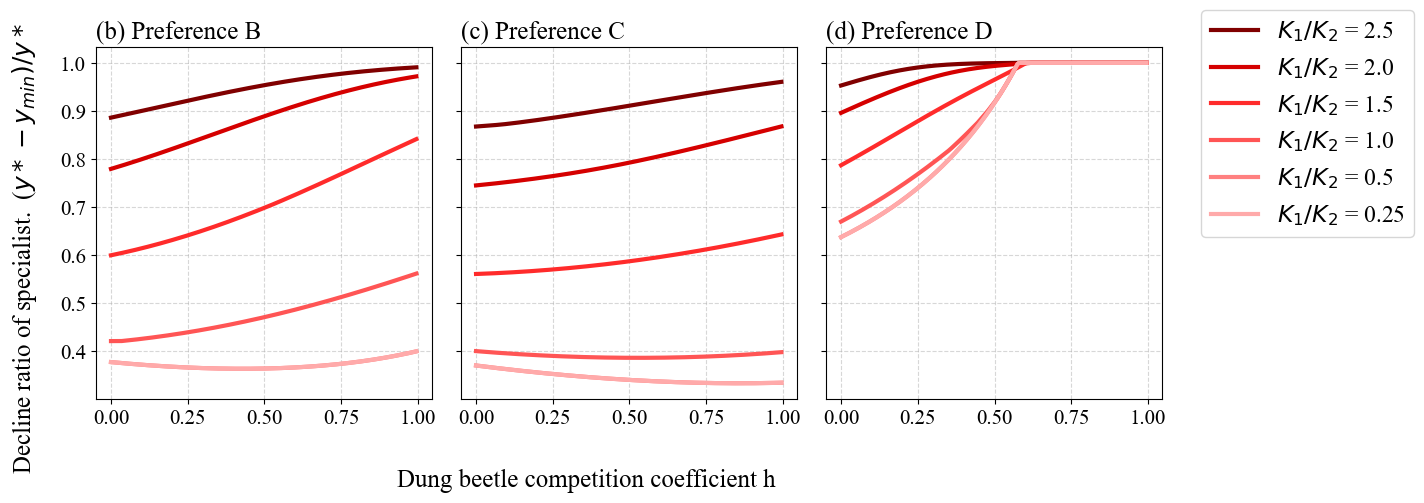

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman' #Setting font
plt.rcParams["font.size"] = 15
# plt.rcParams['figure.dpi'] = 600


import pickle

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data

dt = 0.001
simu_time_A  = 25000          #simulation time each before and after the invasion.
cut_off = 0.1


out_lll_path = f"output/Changingtau/EachPreference/xy,dt={dt},cut_off={cut_off},simu_time_A={simu_time_A}/"
y_diff_normalize_lll = pickle_load(out_lll_path+"y_diff_normalize_lll.pickle")
h_lll = pickle_load(out_lll_path+"h_lll.pickle")

fig, axes = plt.subplots(1, 3, tight_layout=True, figsize=(12, 5), sharex=True, sharey="row")
ax1, ax2, ax3= axes[0], axes[1], axes[2] 
ax_l= [ax1, ax2, ax3]

color_yl = ["#800000","#d50000","#ff2b2b", "#ff5555","#ff8080", "#ffaaaa" ]
title_l = ["(a) Preference A, Simple model", "(b) Preference B", "(c) Preference C", "(d) Preference D" ]
for j in range(3):
    ax_l[j].grid(which ="major", axis="both", linestyle="--",alpha = 0.5)
    ax_l[j].set_title(title_l[j+1], loc="left")
    nagasa = 6
    for i in range(nagasa):
        ax_l[j].plot(h_lll[j+1][5-i], y_diff_normalize_lll[j+1][5-i], linewidth="3", c = color_yl[i])



fig.supxlabel("Dung beetle competition coefficient h", fontsize="18")
fig.supylabel("Decline ratio of specialist.  ($y*-y_{min}) / y*$", fontsize="18")
K1_l = [250, 500, 1000, 1500, 2000, 2500]
fig.legend(["$K_{1}/K_{2}$ = "+"{}".format(var/1000)for var in reversed(K1_l)], bbox_to_anchor=(1.2, 1.0), fontsize="17")
plt.tight_layout()

plt.savefig(out_lll_path+"EachPref_S12.pdf", bbox_inches="tight")

plt.show()

